# Compartment model comparsion
Compartment models of a 90m3 stirred tank reactor are comapred to each other

## Low settings

### Simple case (sc) compartment model

In [1]:
from cmodels.sc_cmodel import sc_cmodel
from cmodels.sc_cmodel_sol import sc_cmodel_sol

from mmodels.xu_bb.sc_xu_bb import sc_xu_bb

from cell_tracking.cell_tracking import cell_tracking
from cell_tracking.cell_tracking_fast import cell_tracking_fast

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Define the compartment model's process settings

In [3]:
STR_BM_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=140, Fg=0.79, p_head=1)
STR_LS_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=80, Fg=0.4, p_head=0)

#### Define parameters for the metabolic model

In [4]:
mmodel = sc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

#### Solve compartment model

In [5]:
sim_dict = {
    10:{0.1:10001,0.09:10001,0.08:200001,0.07:200001,0.06:200001,0.05:200001},
    15:{0.1:90001,0.09:90001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    20:{0.1:400001,0.09:300001,0.08:300001,0.07:300001,0.06:300001,0.05:300001},
    25:{0.1:300001,0.09:300001,0.08:300001,0.07:400001,0.06:300001,0.05:300001},
    30:{0.1:300001,0.09:300001,0.08:300001,0.07:300001,0.06:300001,0.05:400001},
    35:{0.1:300001,0.09:300001,0.08:300001,0.07:300001,0.06:500001,0.05:200001},
    40:{0.1:200001,0.09:200001,0.08:200001,0.07:300001,0.06:300001,0.05:300001},
}

C:\Users\jonas\Desktop\cm_application\cmodels\sc_cmodel_sol.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = mpl.pyplot.subplots()


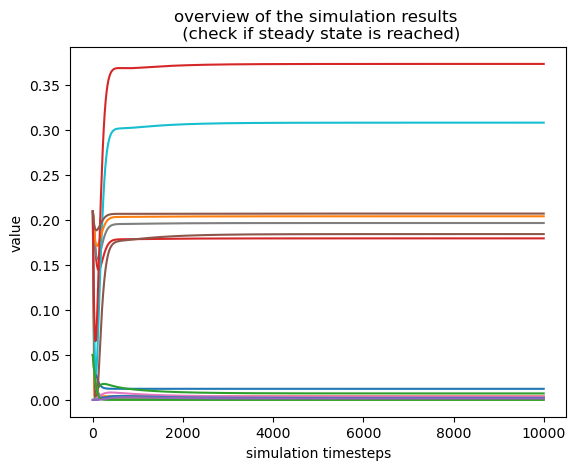

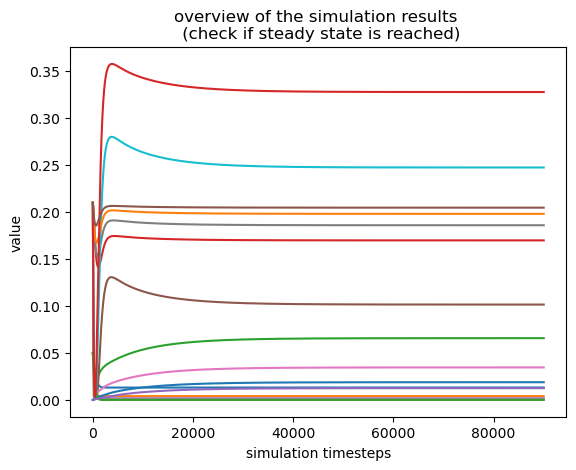

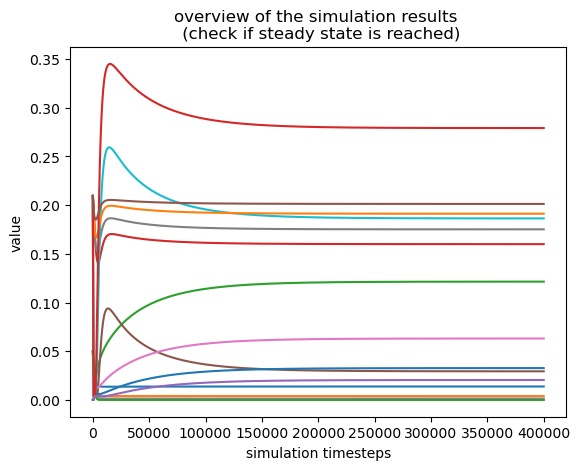

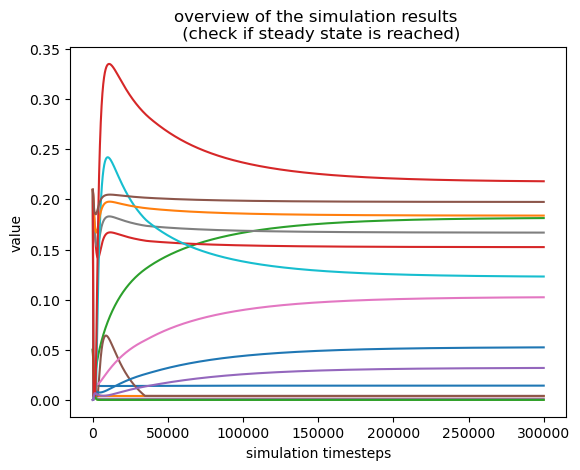

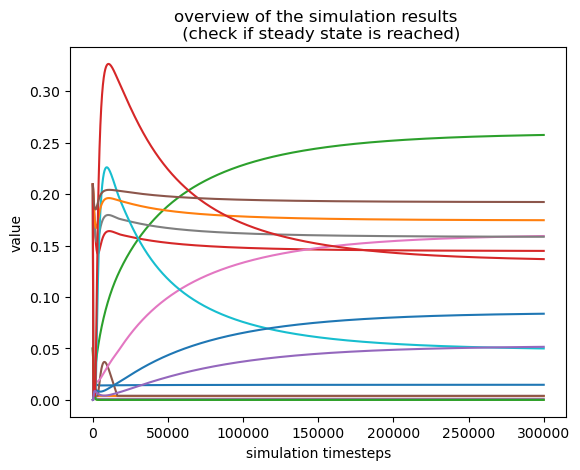

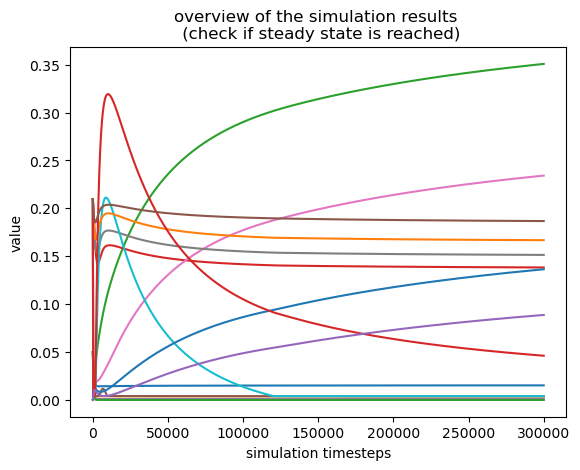

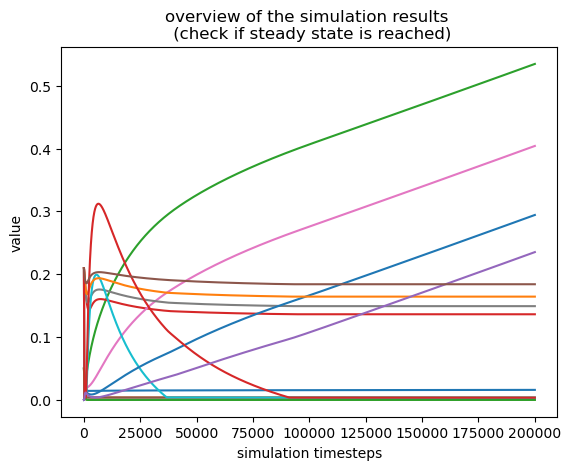

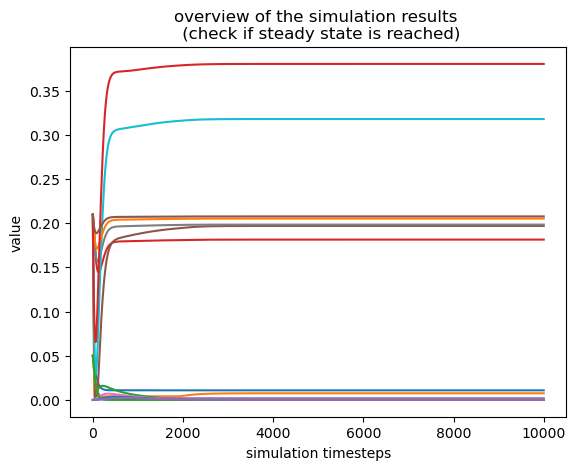

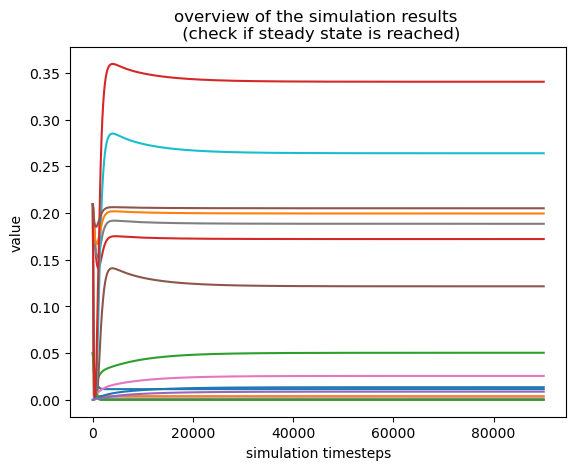

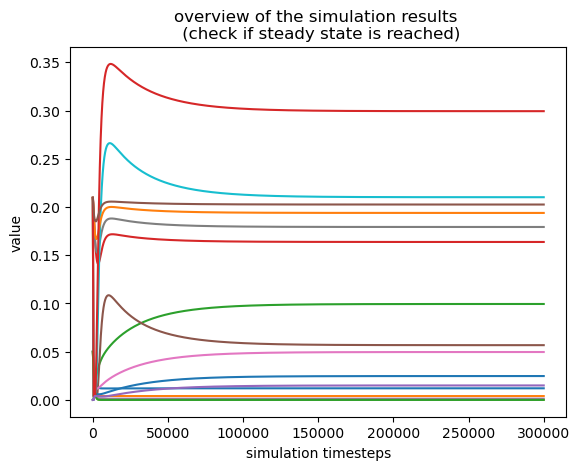

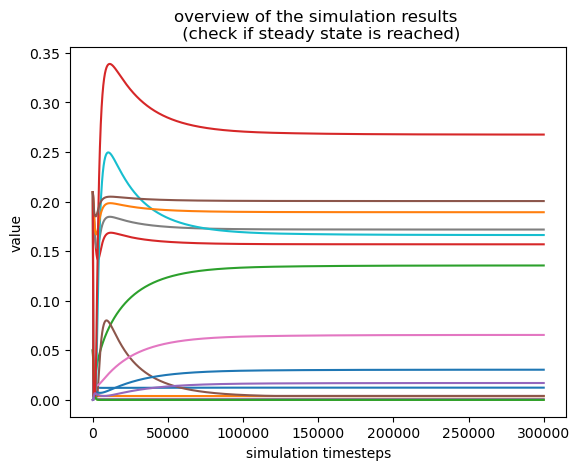

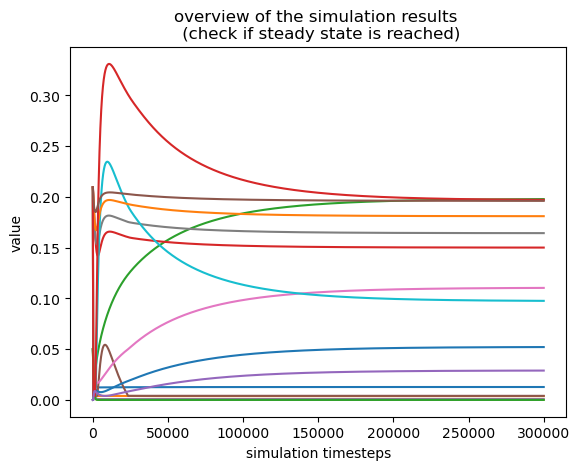

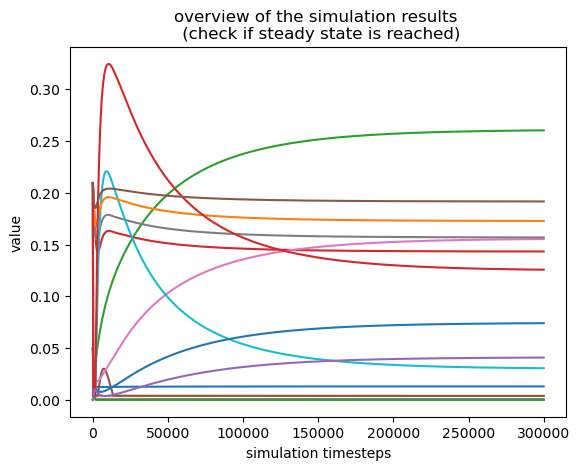

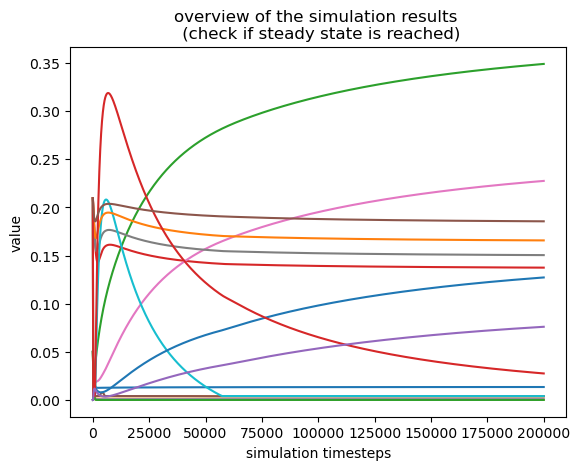

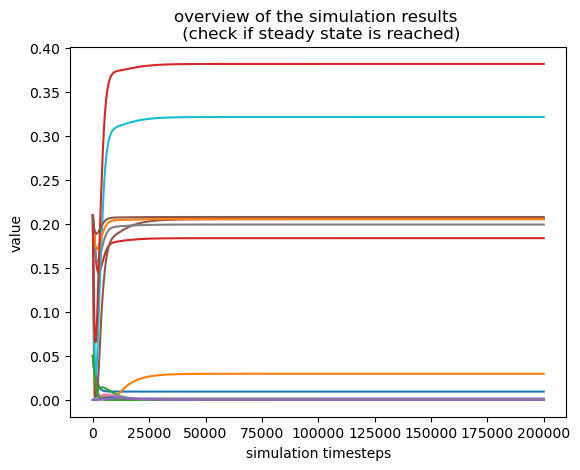

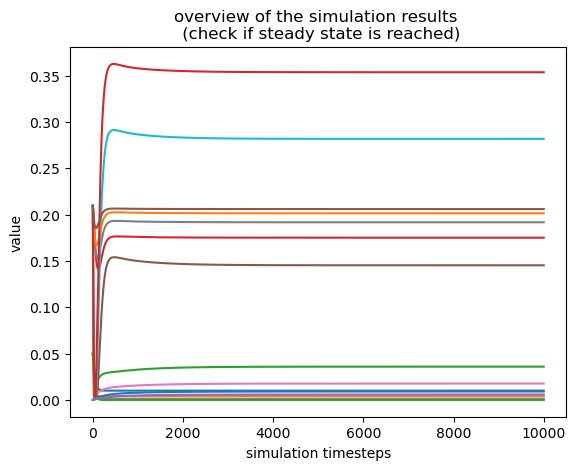

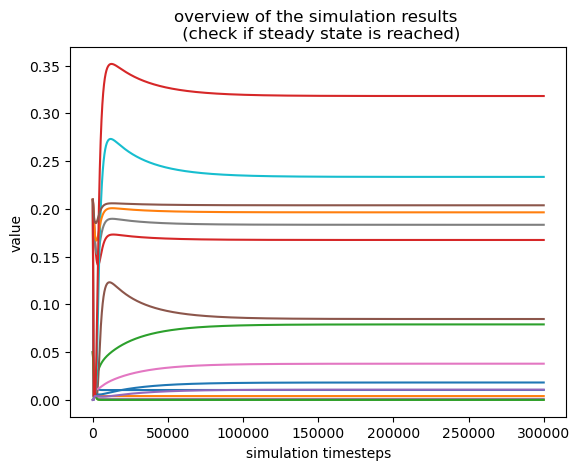

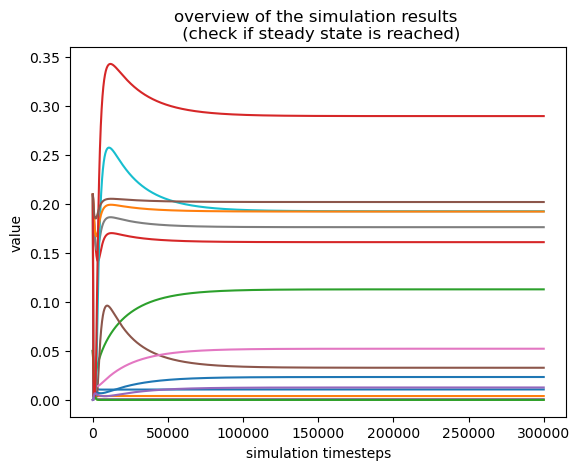

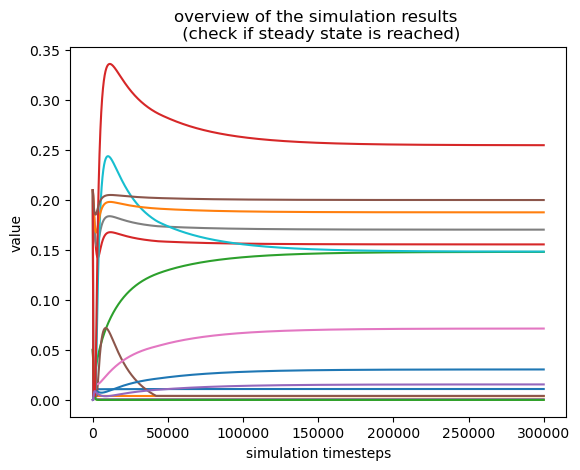

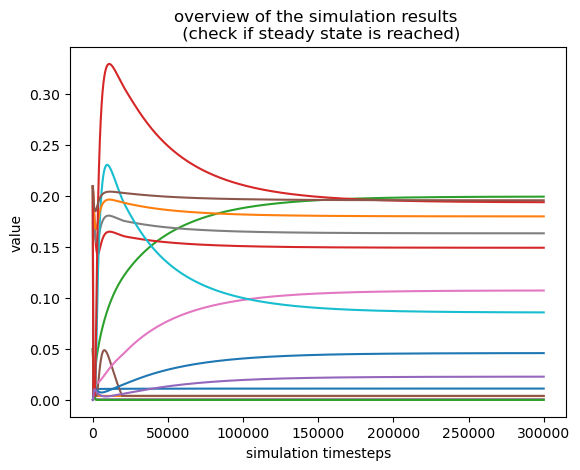

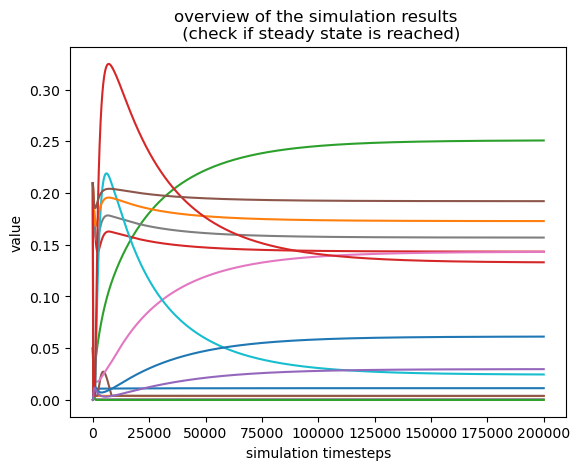

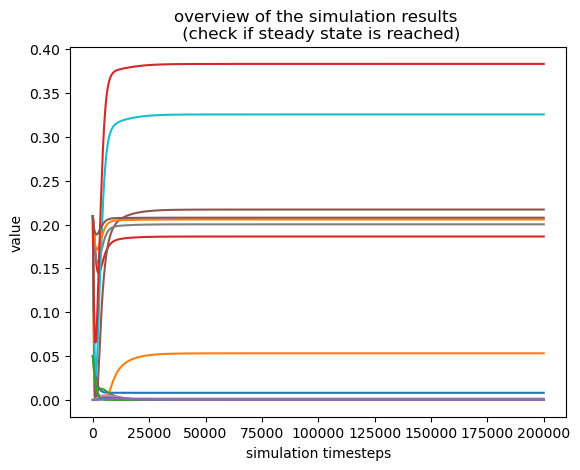

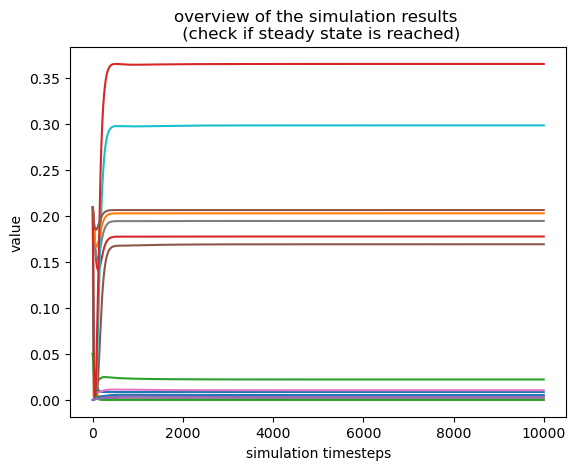

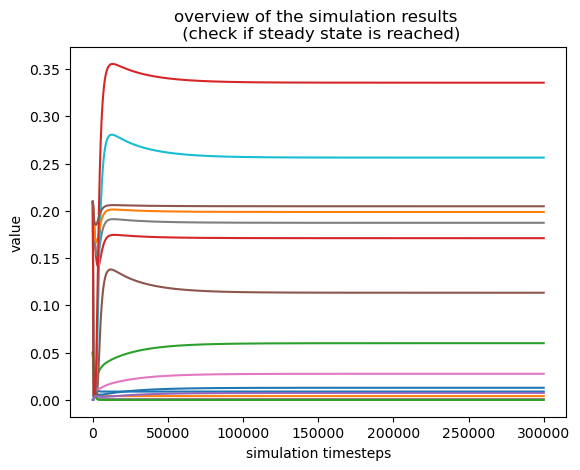

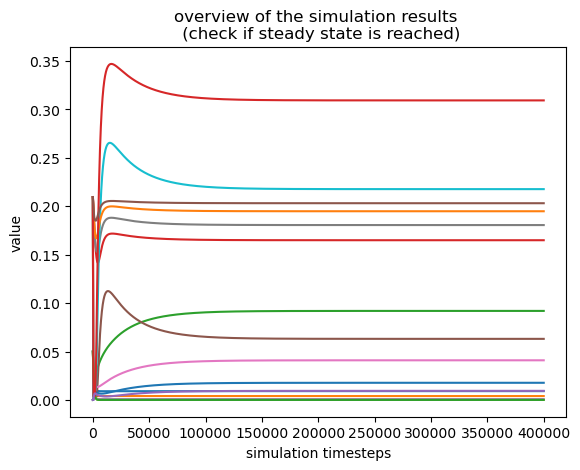

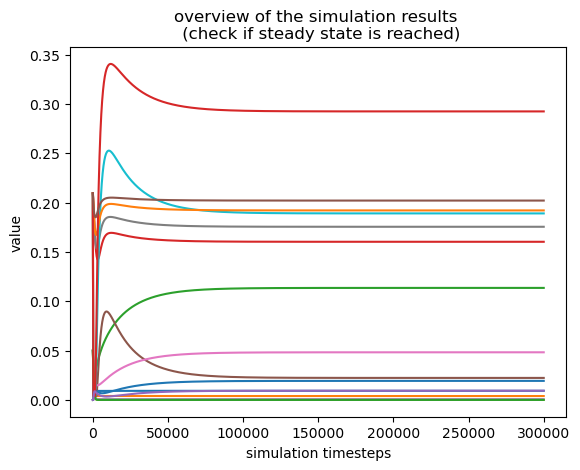

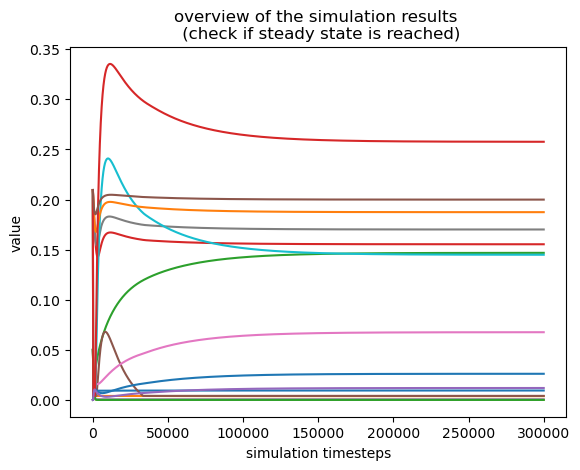

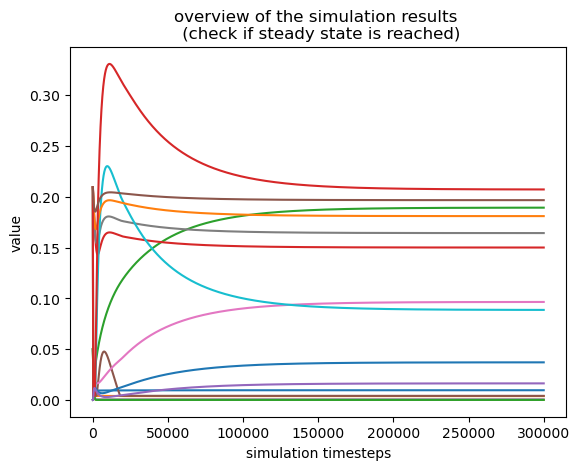

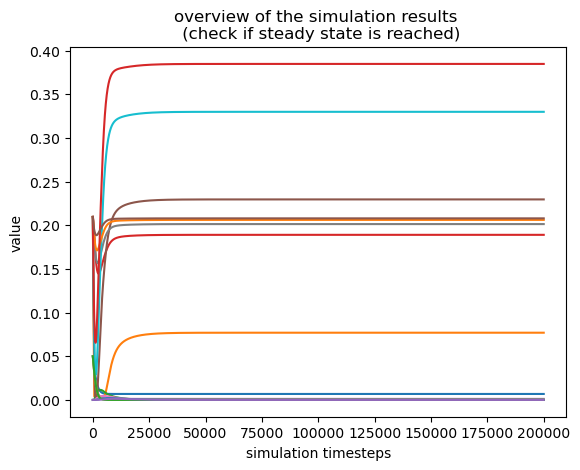

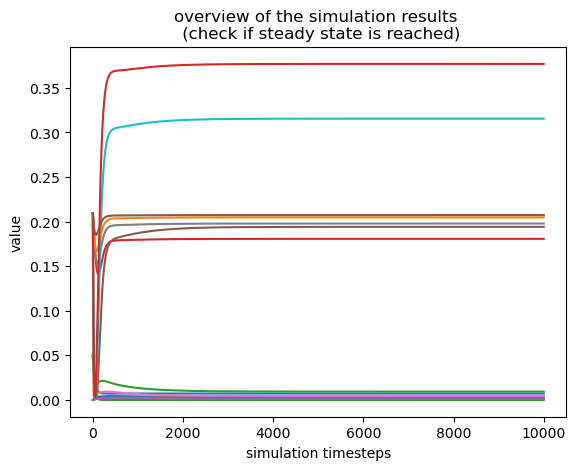

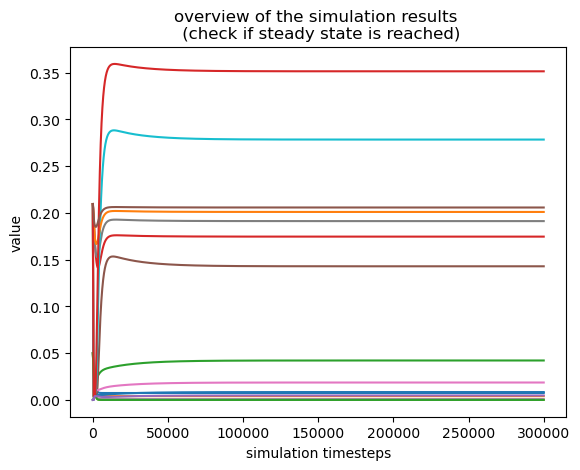

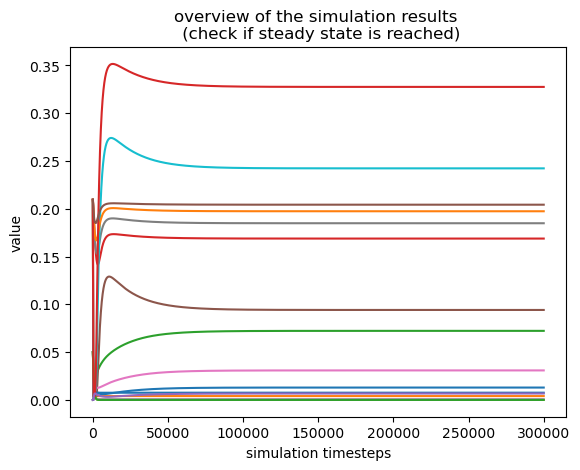

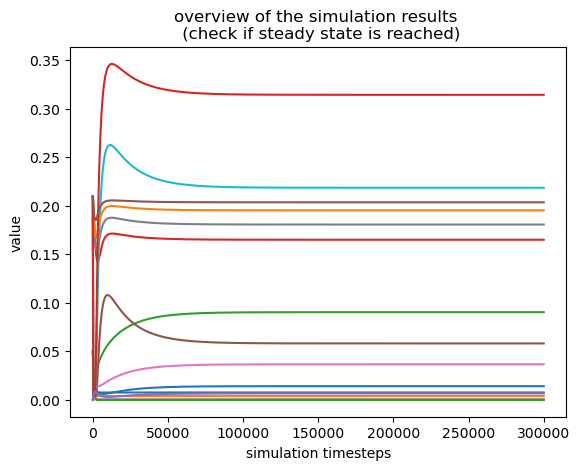

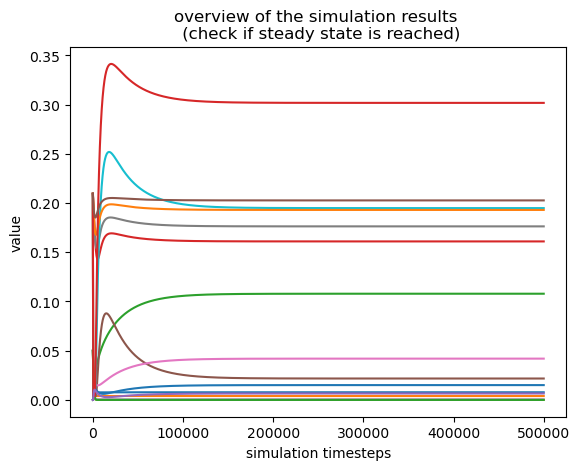

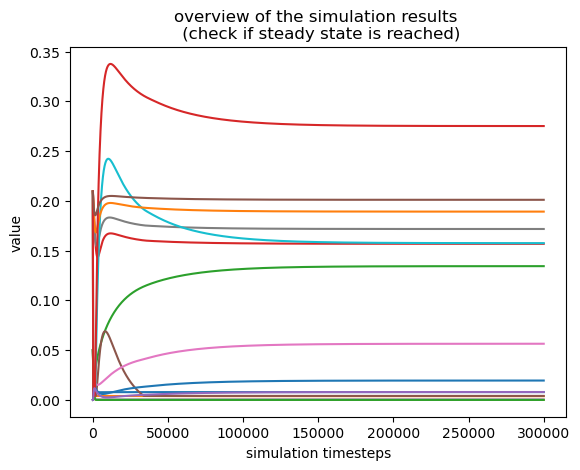

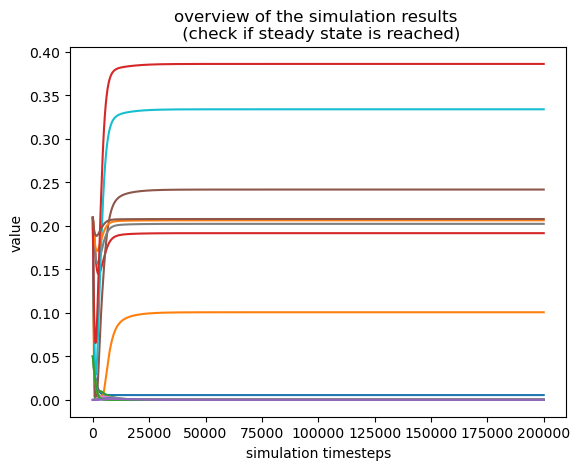

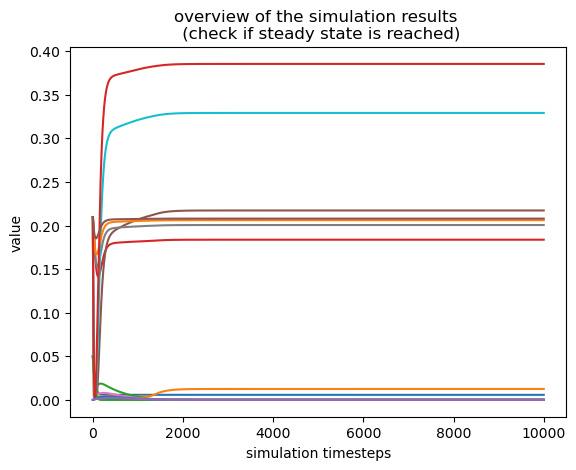

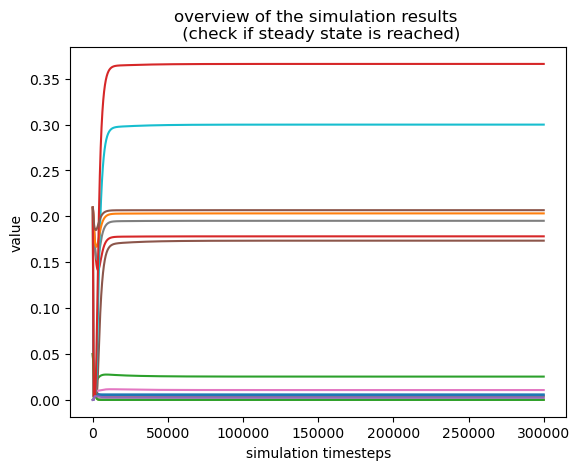

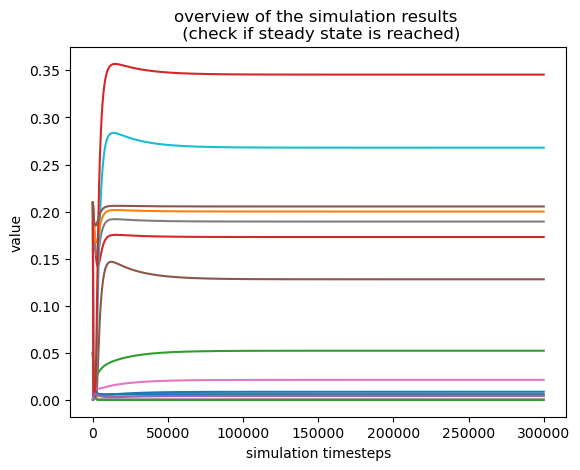

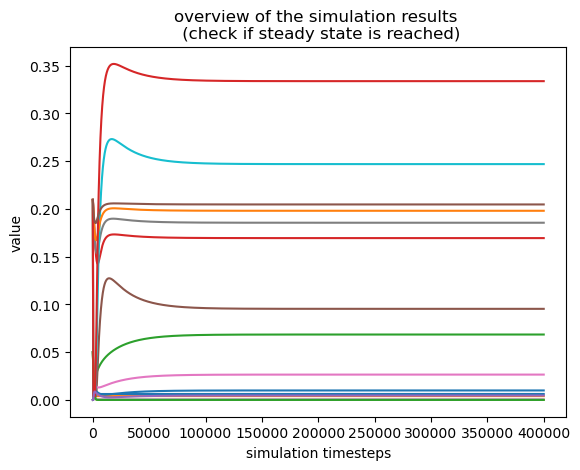

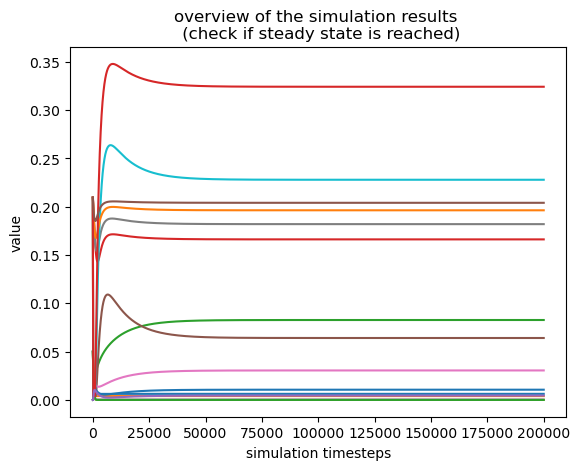

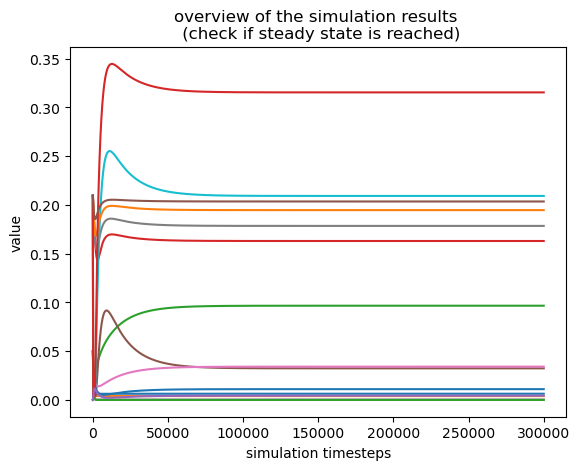

In [6]:
df = pd.DataFrame()

# compartment model instance
cmodel = STR_LS_cmod

for i in [0.1,0.09,0.08,0.07,0.06,0.05]:
    
    for X in [10,15,20,25,30,35,40]:
                
        # initial values for one compartment
        y0_1d = [
            0.05, #S 
            0.2095, #O
            0, #A
            0.2095 #yO
            ]

        # multiply initial values with the number of compartments
        y0 = y0_1d*cmodel.n_comps
        # simulation time
        t_eval=np.linspace(0,1,sim_dict[X][i])
        # Biomass concentration 
        X = X # to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
        # Liquid volume in the whole reactor
        VL = cmodel.calc_sc_cmodel()[1].sum()
        # Glucose feed rate g/h
        Fs_feed = X*i*VL*1000
        # create a solution object
        sol = sc_cmodel_sol(y0, t_eval, mmodel, cmodel, X, Fs_feed)
        
        sol_df = sol.sol_df
        sol_df["X"] = X
        sol_df["Fs_feed"] = Fs_feed
        sol_df["qS_feed"] = i
        sol_df["rel_vol"] = sol_df["liquid_vol [L]"]/sol_df["liquid_vol [L]"].sum()
        
        qS_avg = sol_df[["qS","rel_vol"]].product(axis=1).sum()
        sol_df["qS_avg"] = qS_avg
        
        qS_of_avg = sol_df[["qS_of","rel_vol"]].product(axis=1).sum()
        sol_df["qS_of_avg"] = qS_of_avg
        
        mu_avg = sol_df[["mu","rel_vol"]].product(axis=1).sum()
        sol_df["mu_avg"] = mu_avg
        
        sol_df["y_of"] = qS_of_avg/qS_avg
        sol_df["Ysx"] = mu_avg/qS_avg
        
        sol_df["starvation"] = sol_df["qS"] < 0.04
        sol_df["starv_ratio"] = sol_df[["starvation","rel_vol"]].product(axis=1).sum()
        
        df = pd.concat([df,sol_df])

df_sc_LS = df

### Simple case (sc) compartment model - with changed kLa

In [7]:
from mmodels.xu_bb.sc_xu_bb_LS_kla_test import sc_xu_bb

#### Define parameters for the metabolic model

In [8]:
mmodel = sc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

#### Solve compartment model

In [9]:
sim_dict = {
    10:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    15:{0.1:10001,0.09:10001,0.08:90001,0.07:10001,0.06:90001,0.05:10001},
    20:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    25:{0.1:6000001,0.09:10001,0.08:7000001,0.07:10001,0.06:170001,0.05:10001},
    30:{0.1:200001,0.09:10001,0.08:140001,0.07:10001,0.06:140001,0.05:10001},
    35:{0.1:400001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    40:{0.1:200001,0.09:10001,0.08:10001,0.07:10001,0.06:130001,0.05:10001},
}

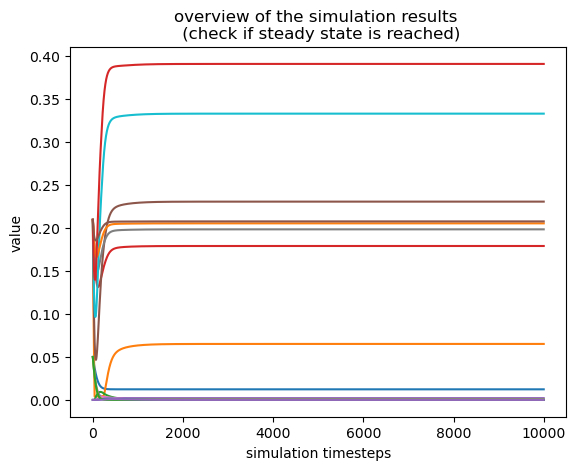

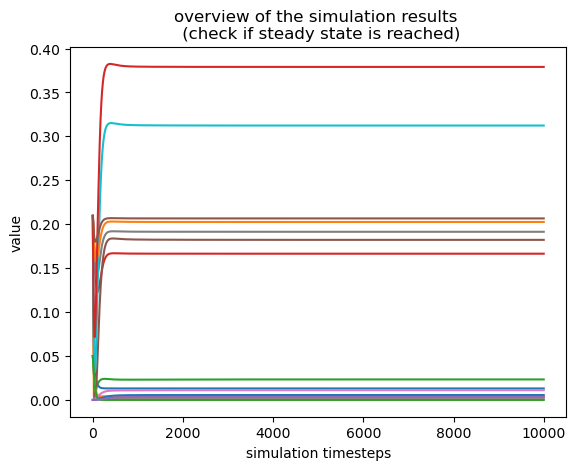

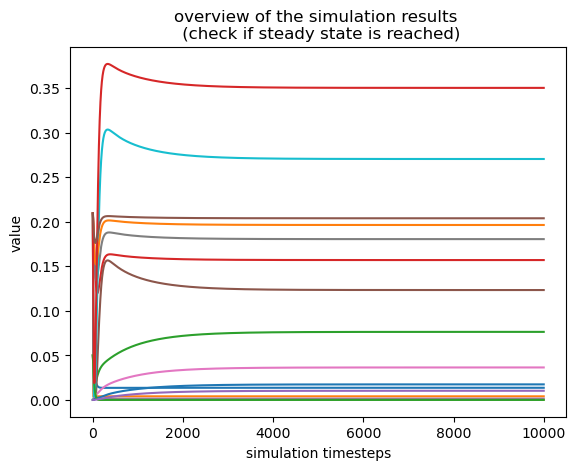

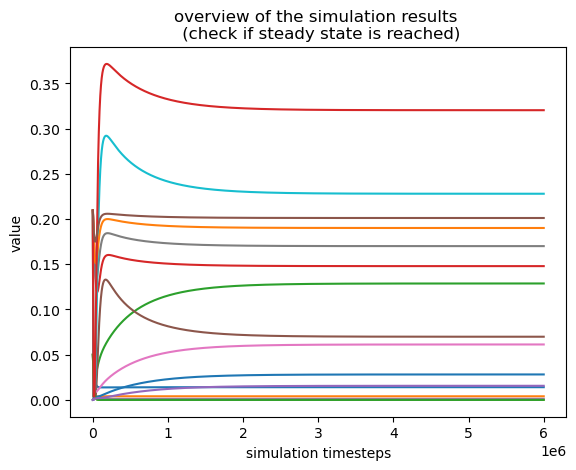

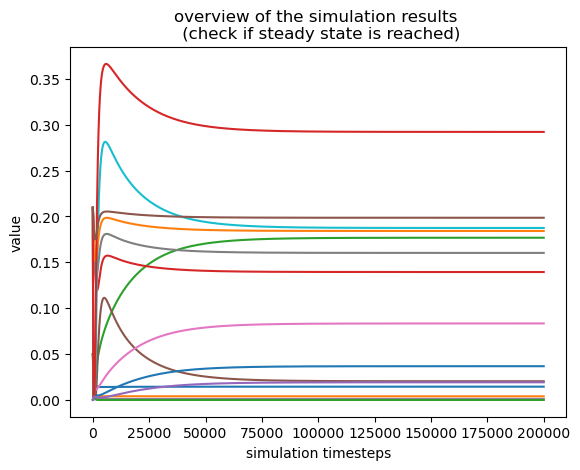

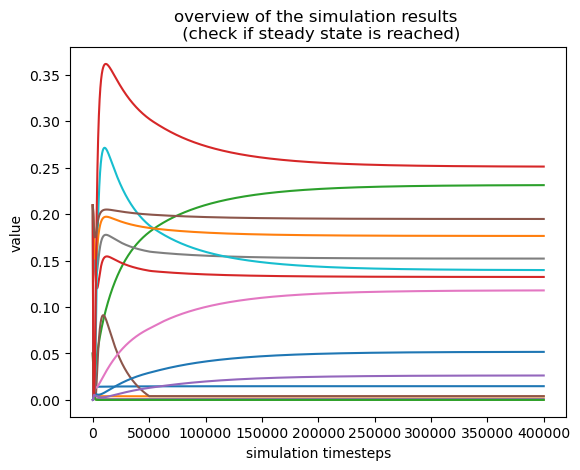

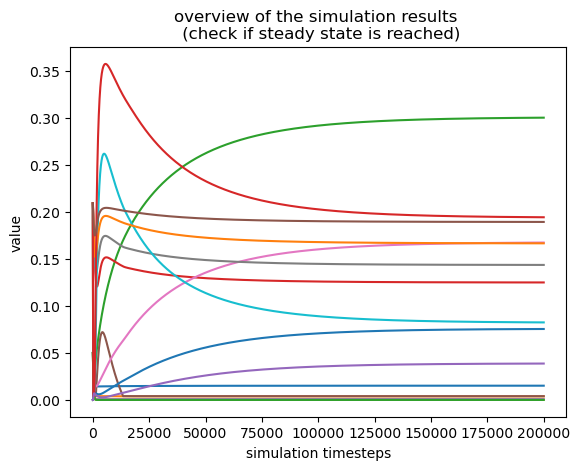

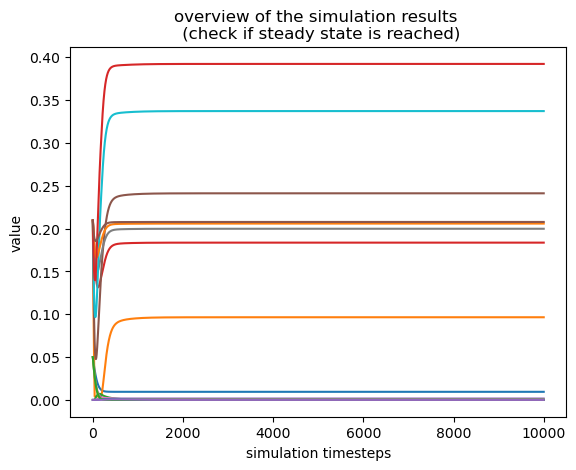

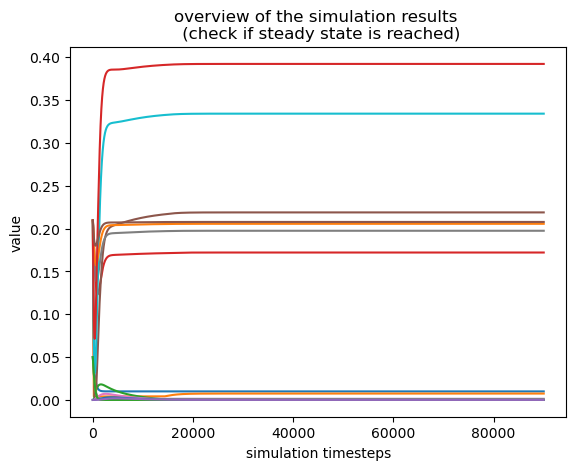

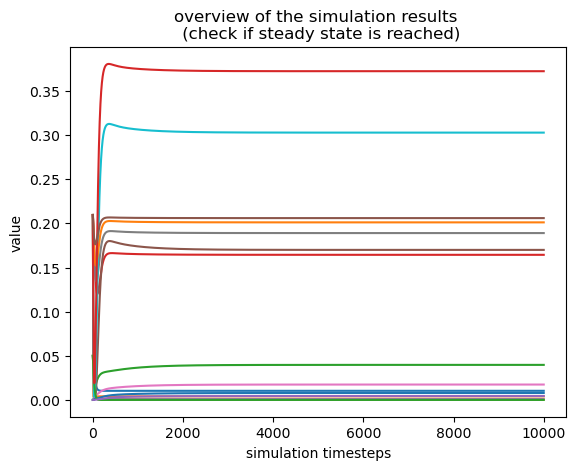

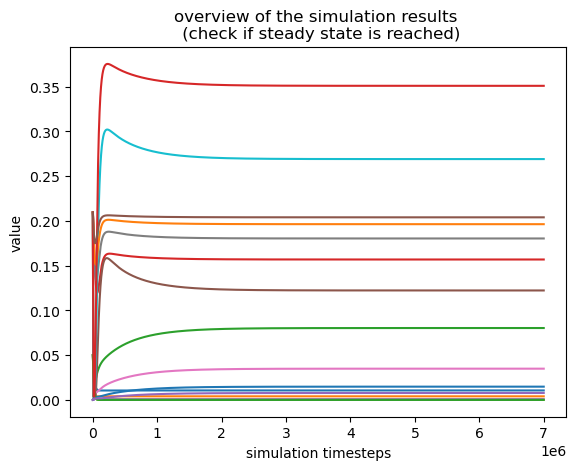

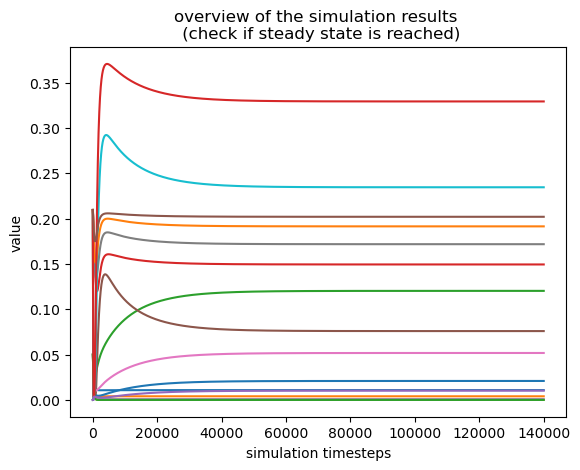

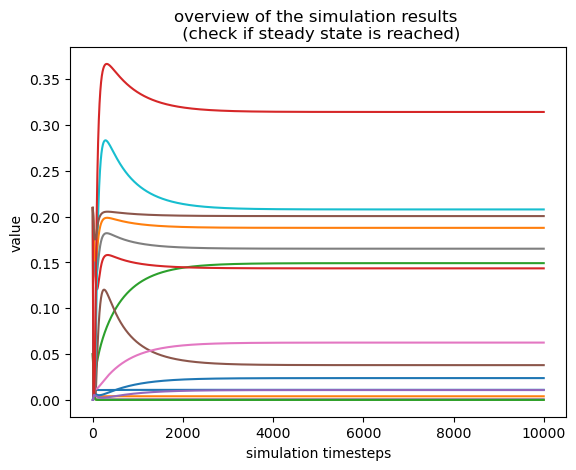

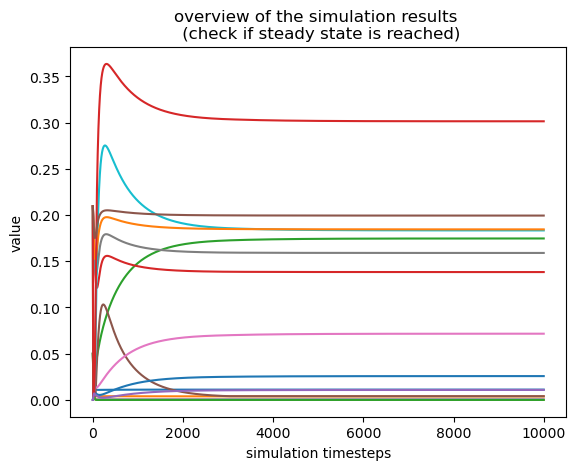

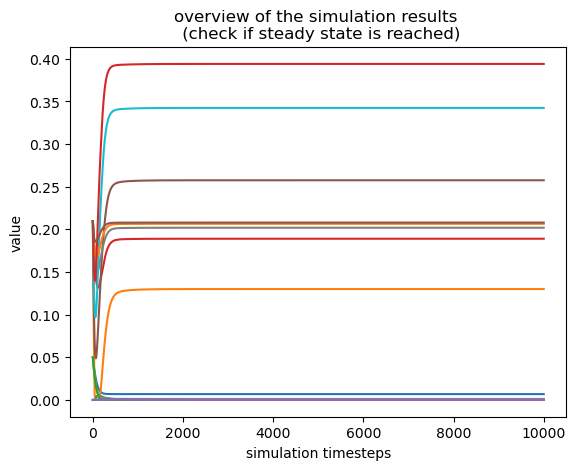

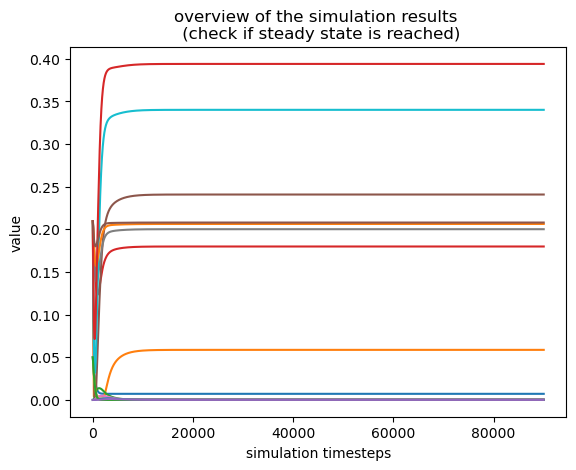

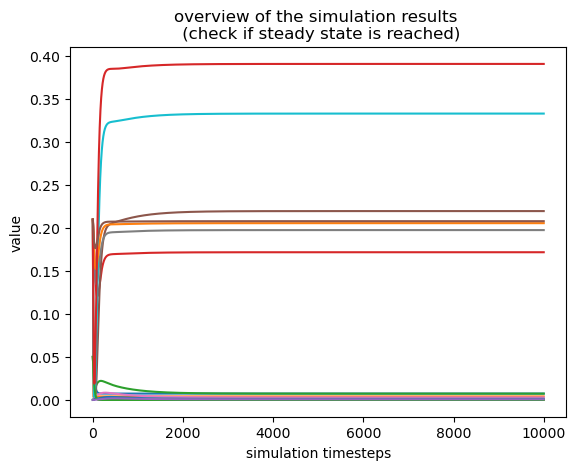

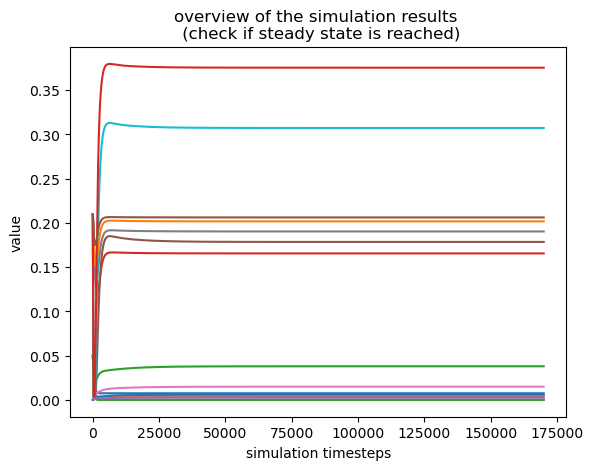

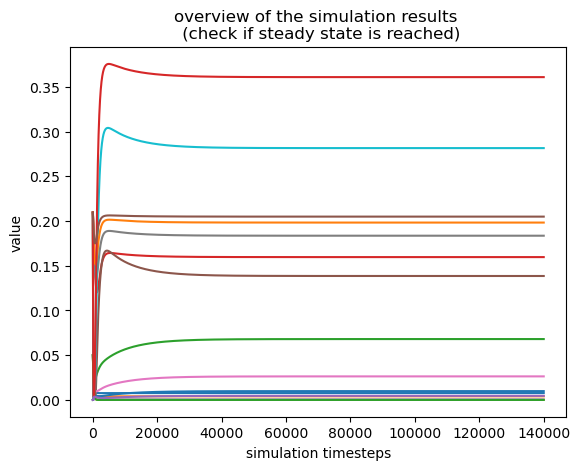

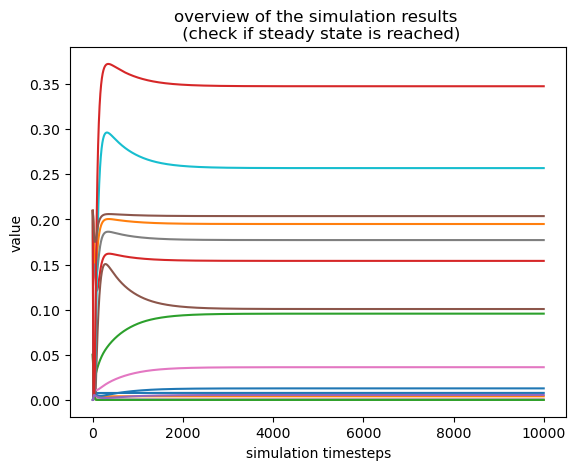

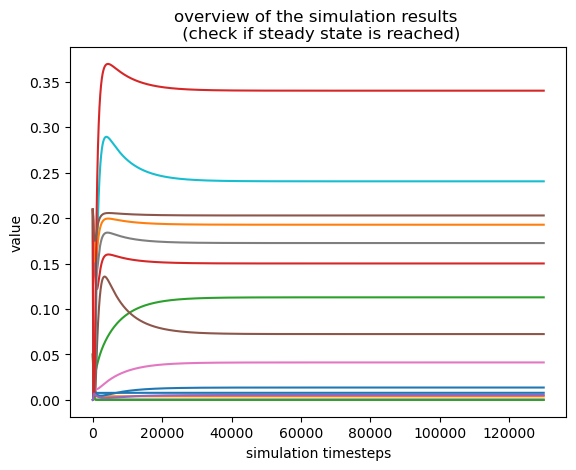

In [10]:
df = pd.DataFrame()

# compartment model instance
cmodel = STR_LS_cmod

for i in [0.1,0.08,0.06]:
    
    for X in [10,15,20,25,30,35,40]:
                
        # initial values for one compartment
        y0_1d = [
            0.05, #S 
            0.2095, #O
            0, #A
            0.2095 #yO
            ]

        # multiply initial values with the number of compartments
        y0 = y0_1d*cmodel.n_comps
        # simulation time
        t_eval=np.linspace(0,1,sim_dict[X][i])
        # Biomass concentration 
        X = X # to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
        # Liquid volume in the whole reactor
        VL = cmodel.calc_sc_cmodel()[1].sum()
        # Glucose feed rate g/h
        Fs_feed = X*i*VL*1000
        # create a solution object
        sol = sc_cmodel_sol(y0, t_eval, mmodel, cmodel, X, Fs_feed)
        
        sol_df = sol.sol_df
        sol_df["X"] = X
        sol_df["Fs_feed"] = Fs_feed
        sol_df["qS_feed"] = i
        sol_df["rel_vol"] = sol_df["liquid_vol [L]"]/sol_df["liquid_vol [L]"].sum()
        
        qS_avg = sol_df[["qS","rel_vol"]].product(axis=1).sum()
        sol_df["qS_avg"] = qS_avg
        
        qS_of_avg = sol_df[["qS_of","rel_vol"]].product(axis=1).sum()
        sol_df["qS_of_avg"] = qS_of_avg
        
        mu_avg = sol_df[["mu","rel_vol"]].product(axis=1).sum()
        sol_df["mu_avg"] = mu_avg
        
        sol_df["y_of"] = qS_of_avg/qS_avg
        sol_df["Ysx"] = mu_avg/qS_avg
        
        sol_df["starvation"] = sol_df["qS"] < 0.04
        sol_df["starv_ratio"] = sol_df[["starvation","rel_vol"]].product(axis=1).sum()
        
        df = pd.concat([df,sol_df])

df_sc_LS_changed_kla = df

### Complex case (cc) compartment model

In [11]:
from cmodels.cc_cmodel import cc_cmodel
from cmodels.cc_cmodel_sol import cc_cmodel_sol

from mmodels.xu_bb.cc_xu_bb import cc_xu_bb

from cell_tracking.cell_tracking import cell_tracking

In [12]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading compartment model

In [13]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [14]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

complex_mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

#### Solving compartment model

C:\Users\jonas\Desktop\cm_application\cmodels\cc_cmodel_sol.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = mpl.pyplot.subplots()


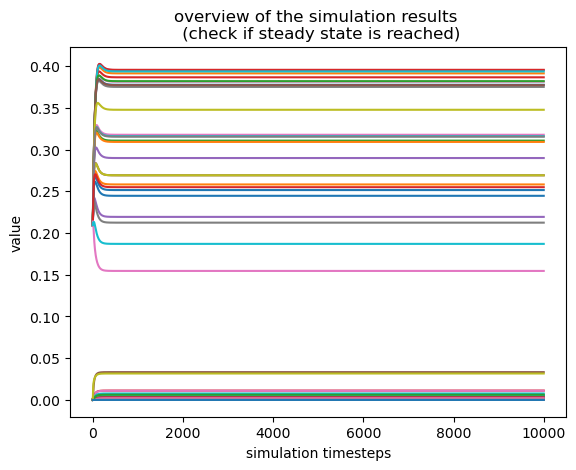

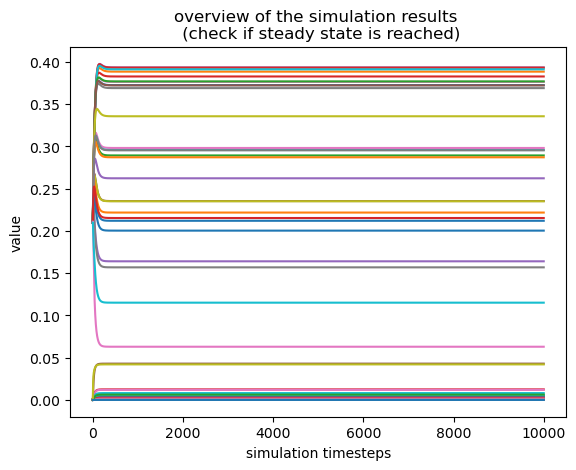

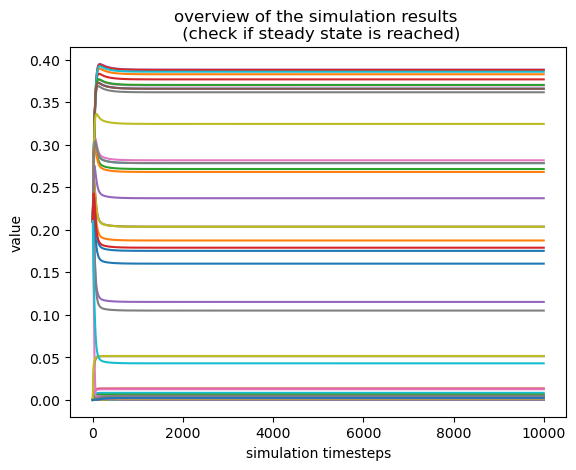

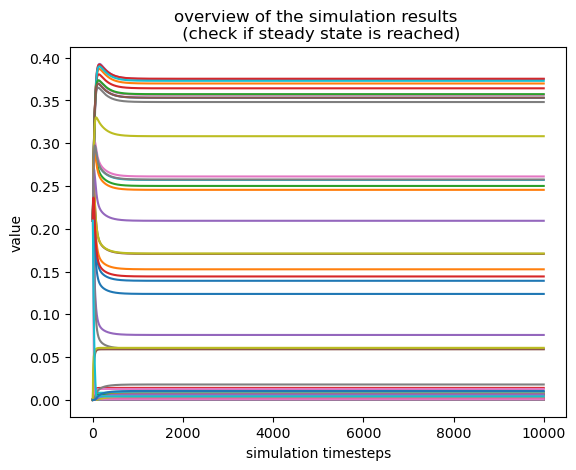

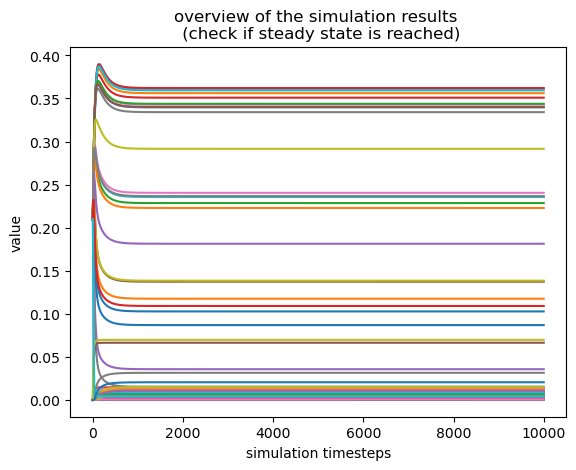

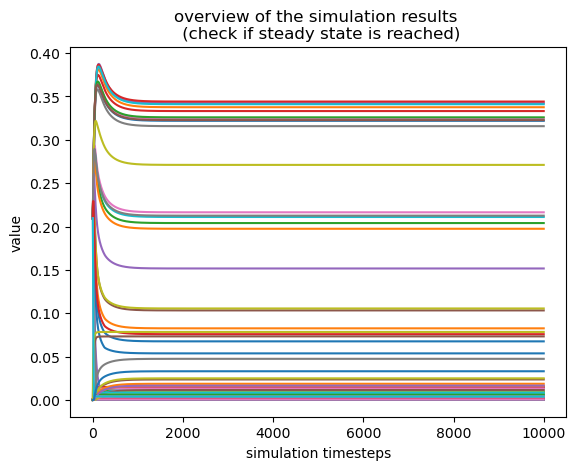

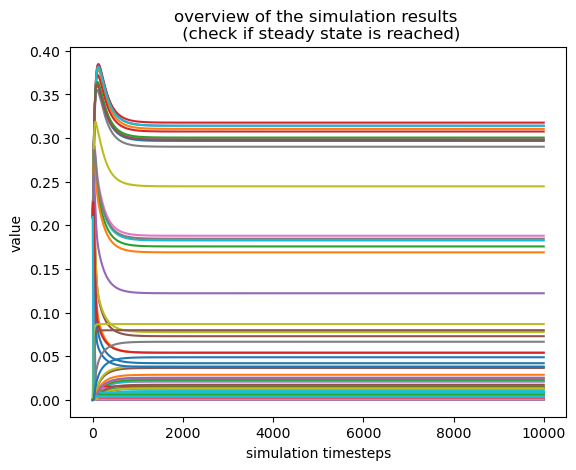

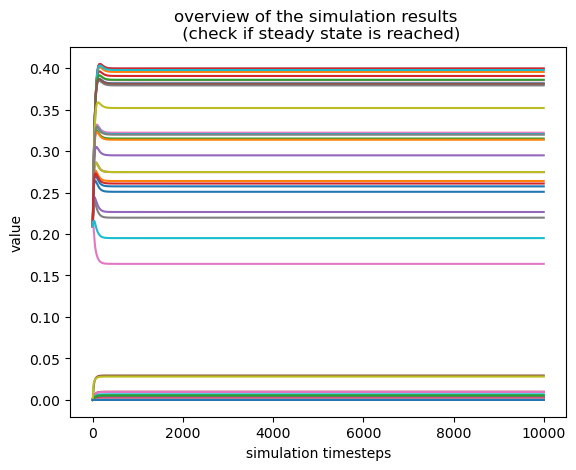

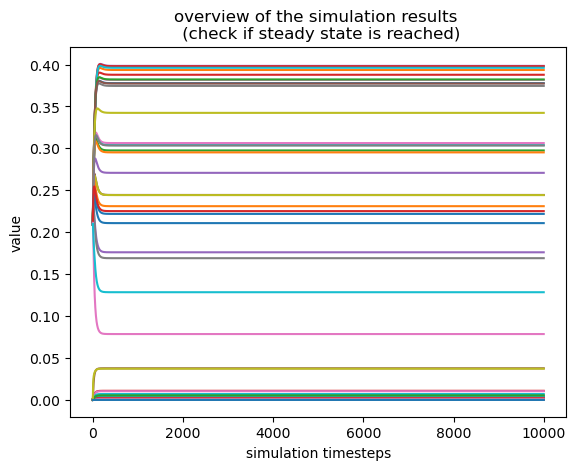

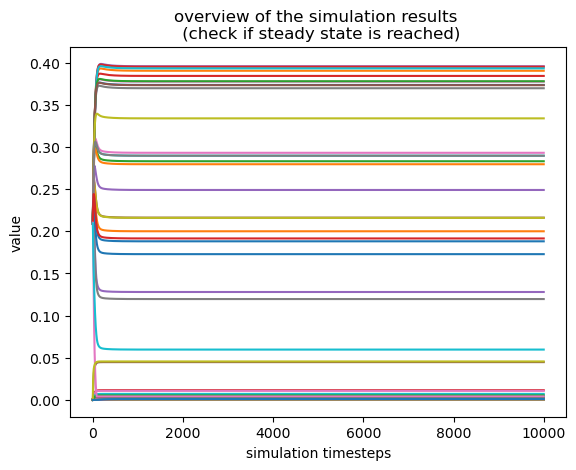

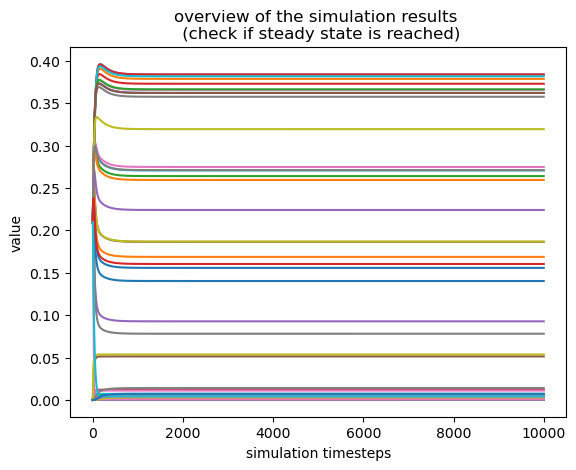

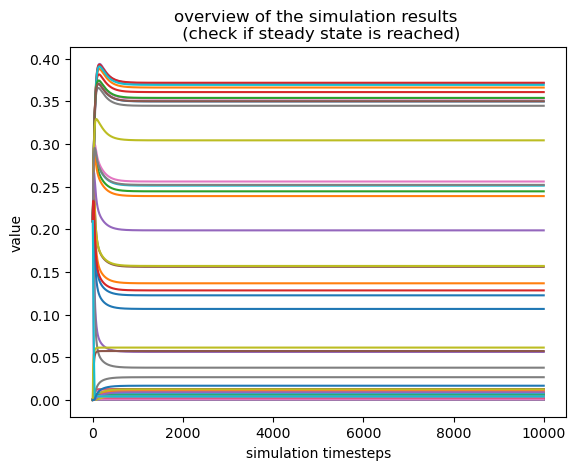

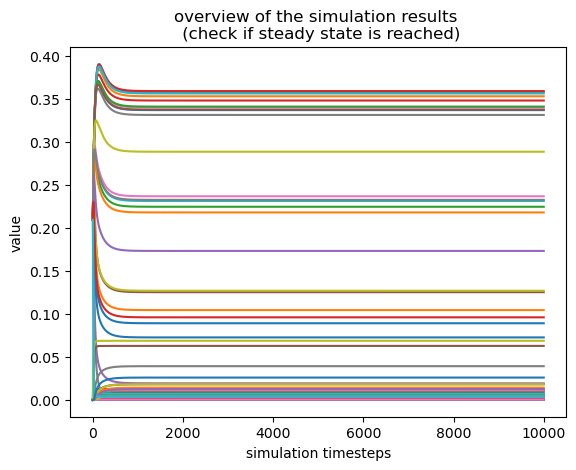

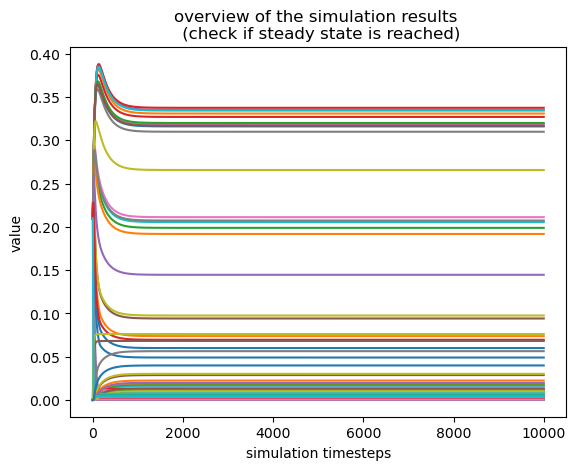

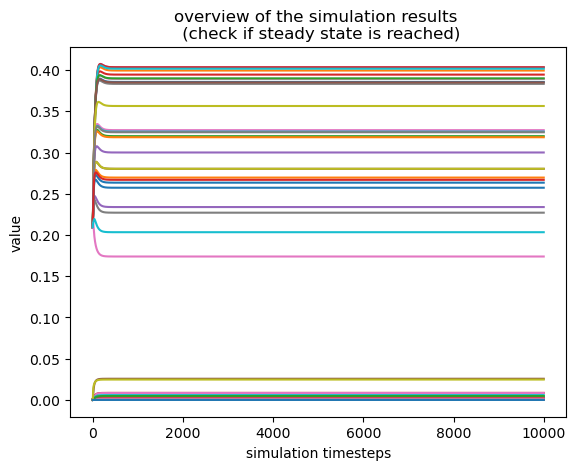

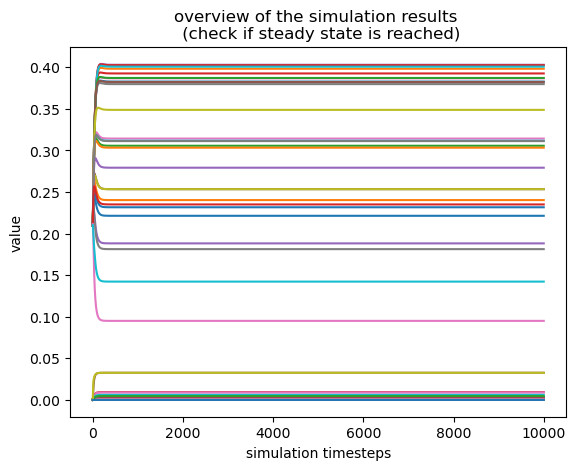

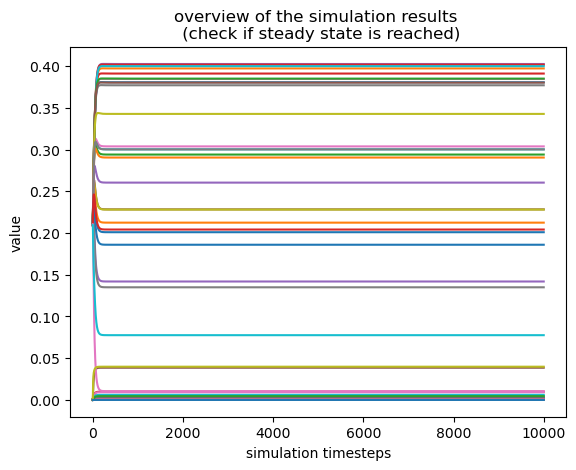

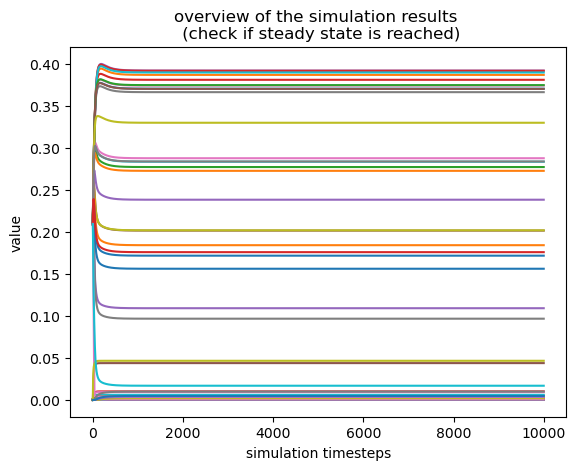

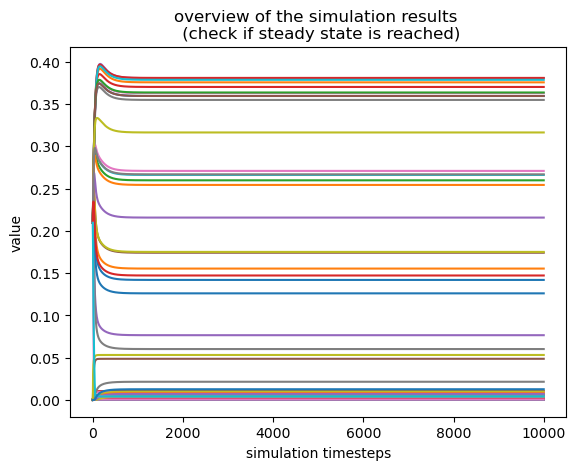

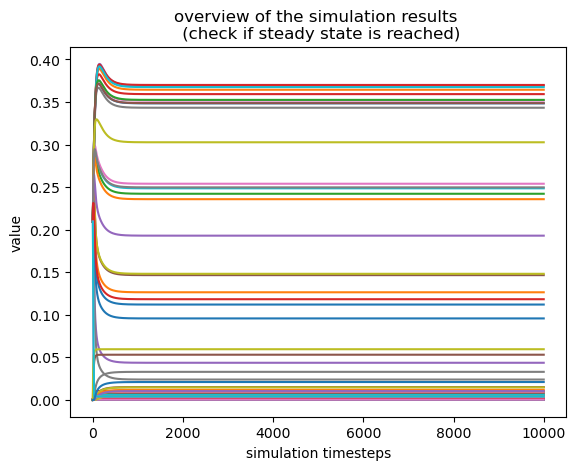

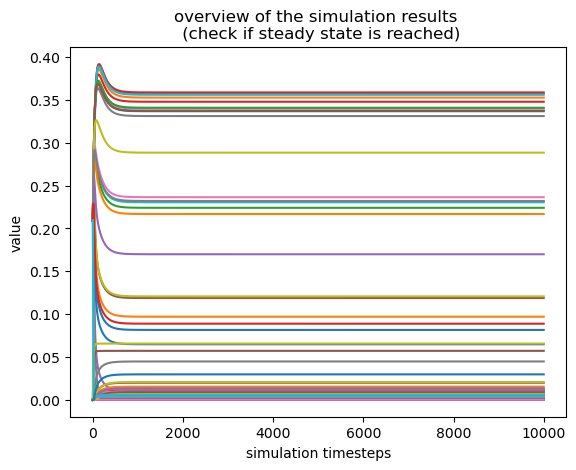

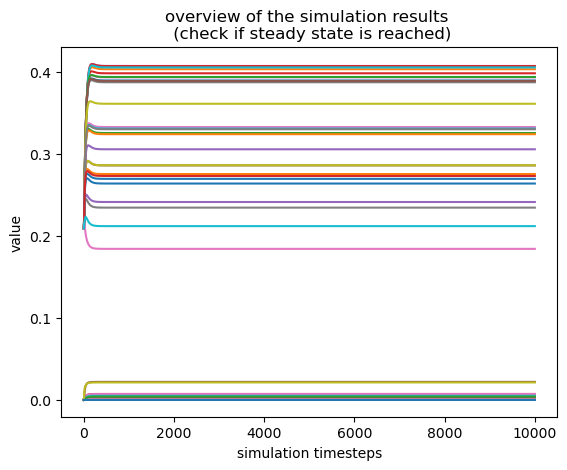

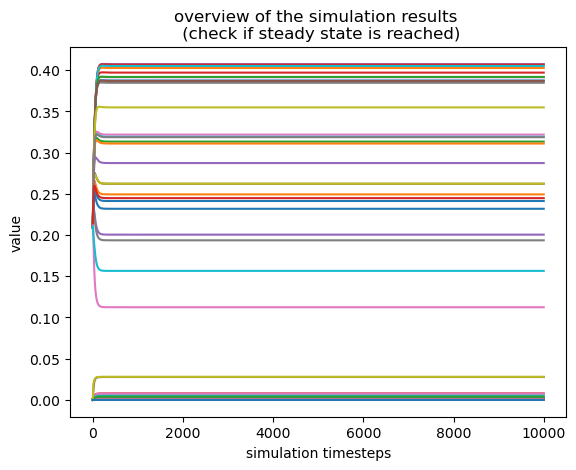

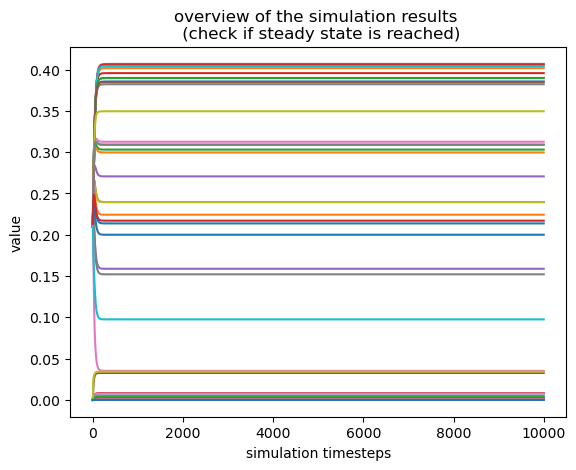

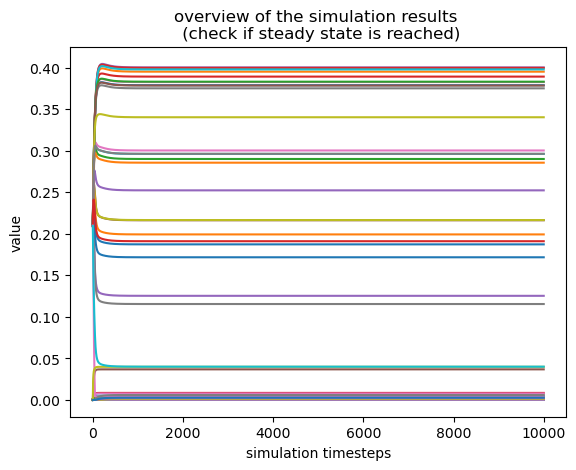

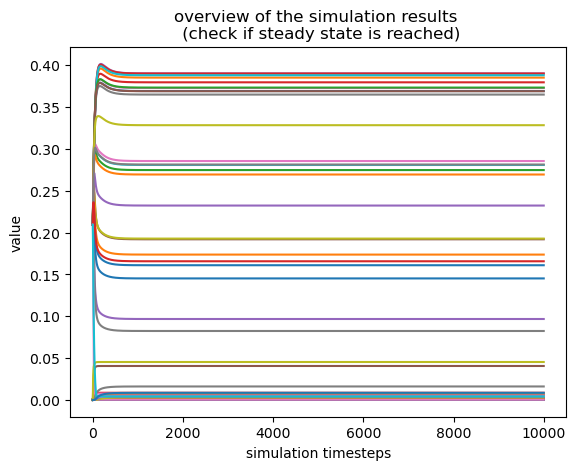

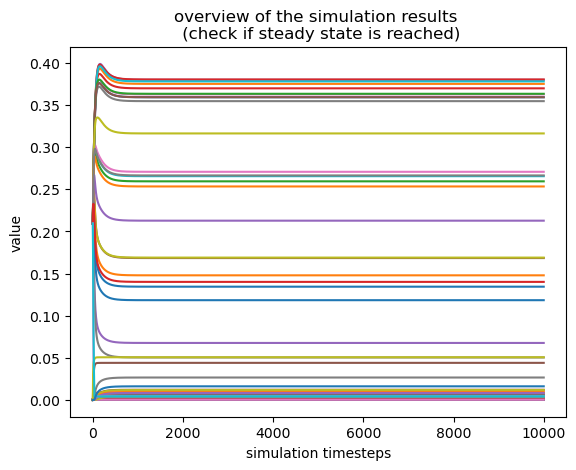

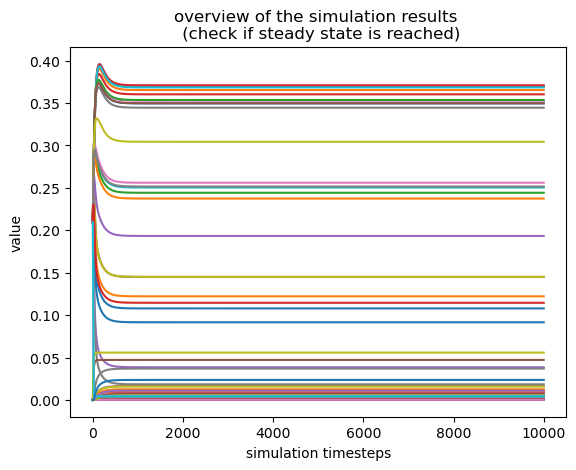

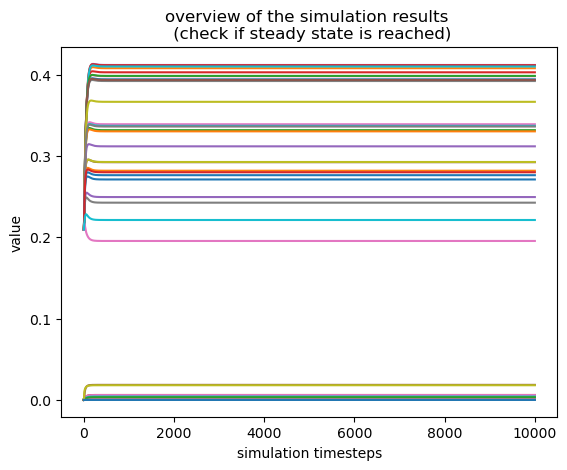

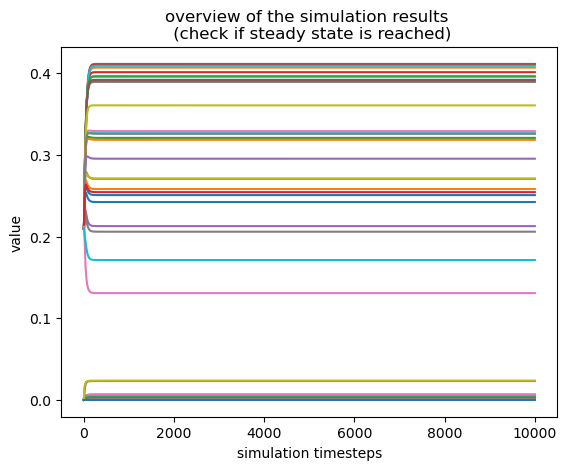

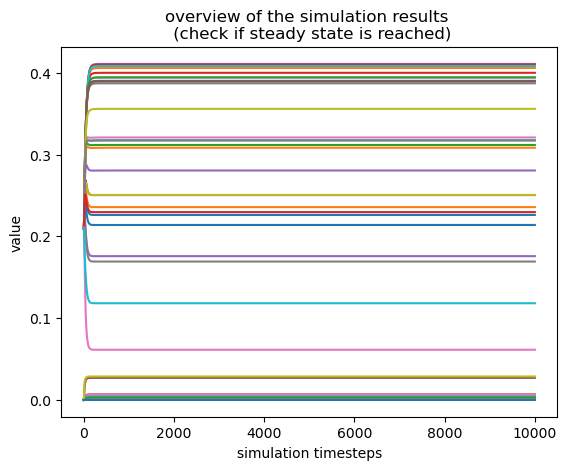

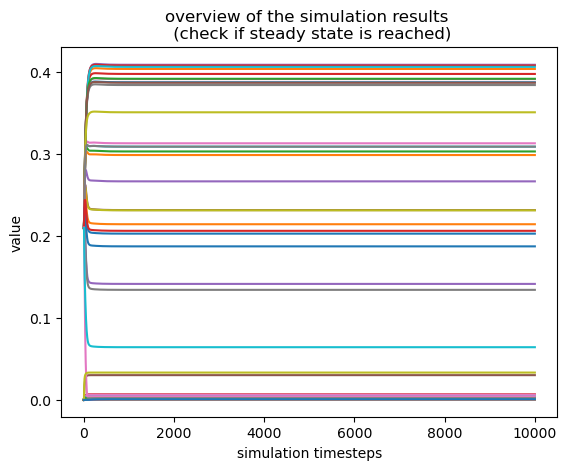

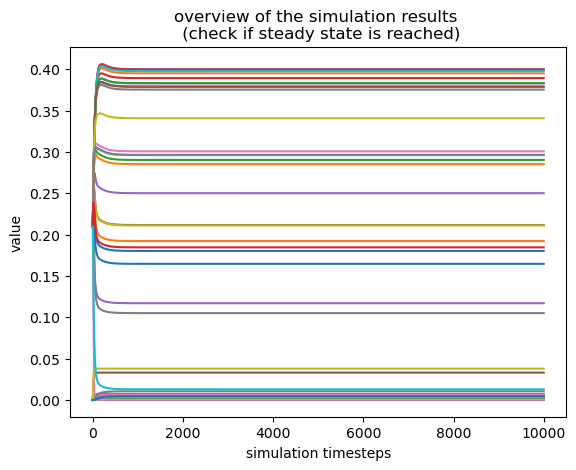

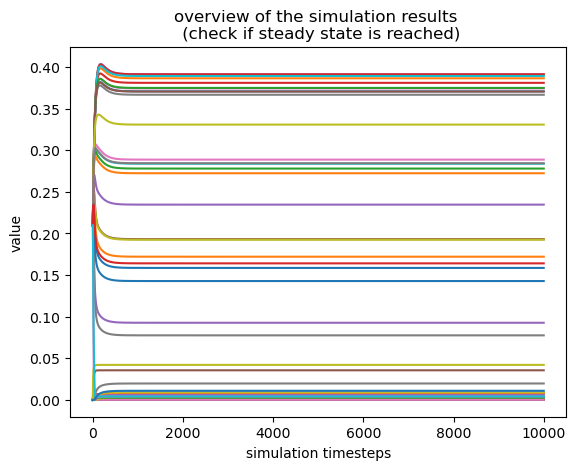

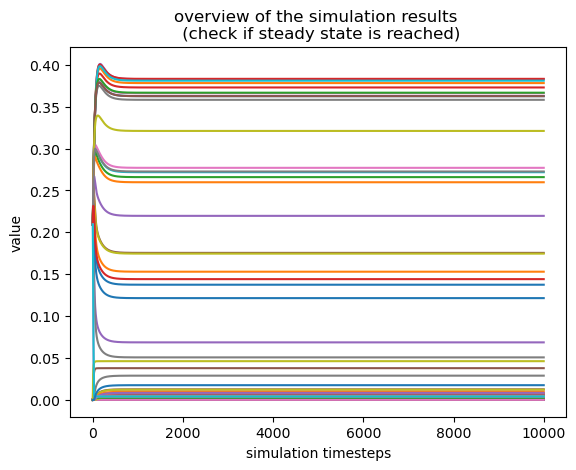

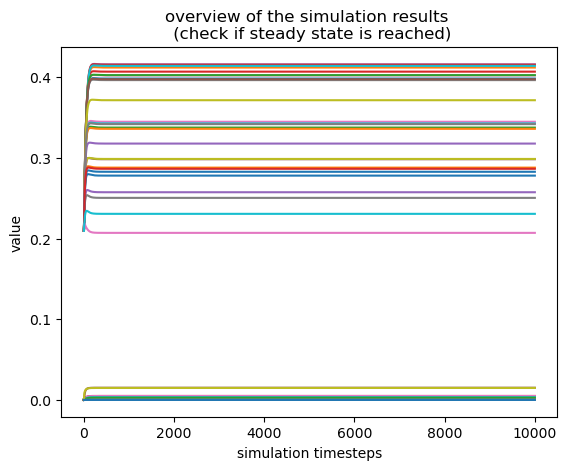

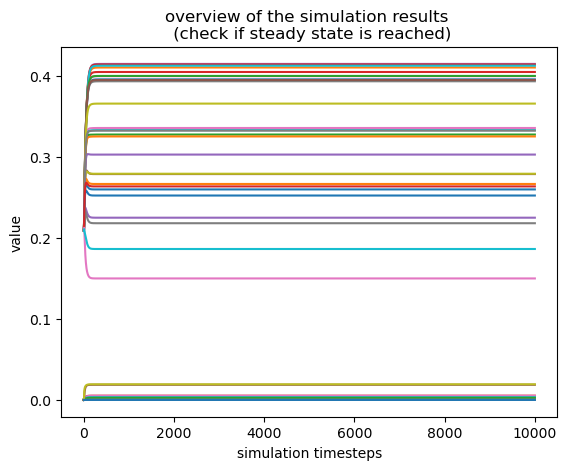

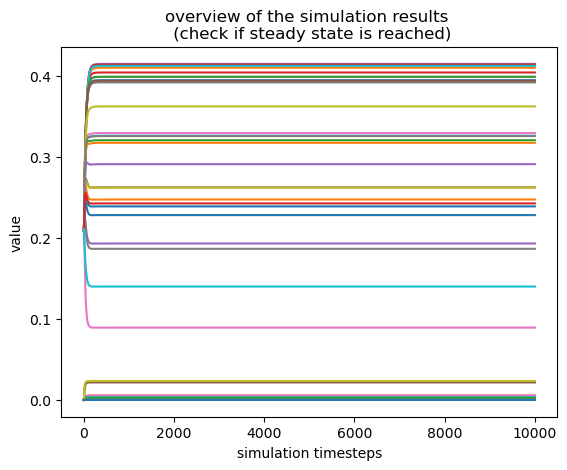

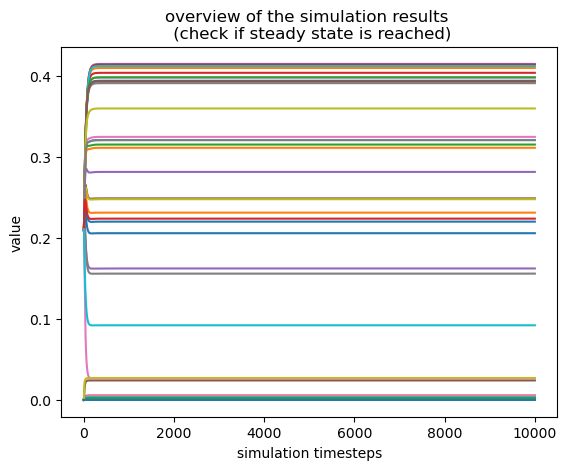

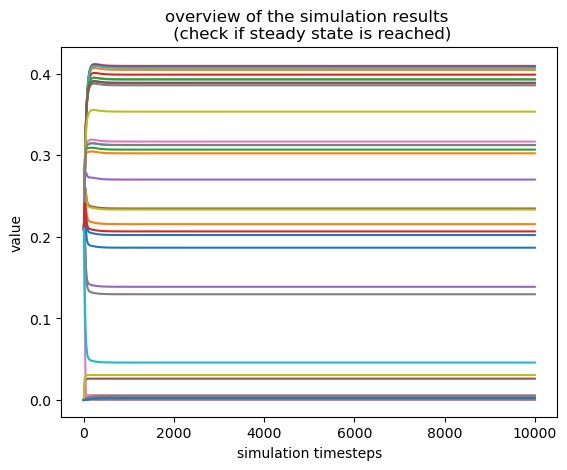

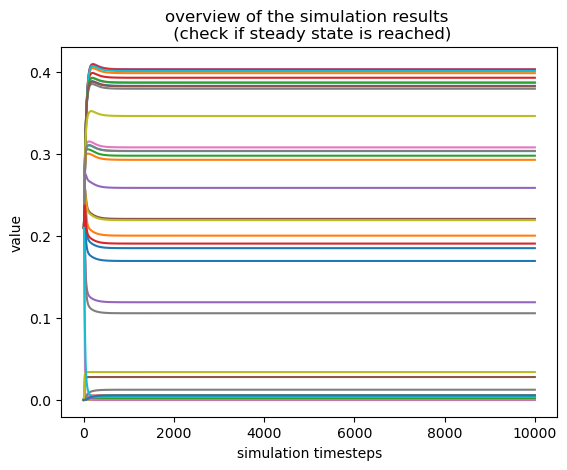

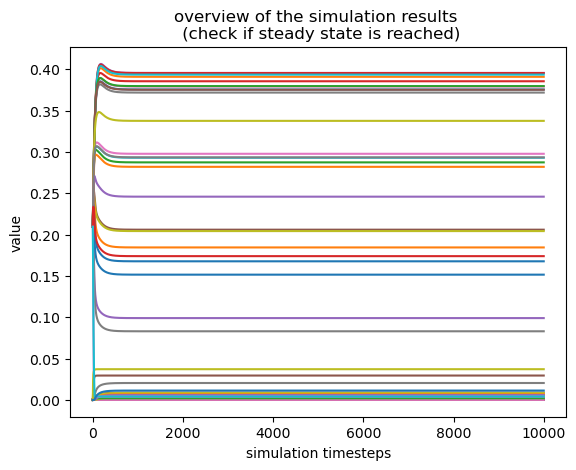

In [15]:
df_cc = pd.DataFrame()

# compartment model instance
cmodel = STR_LS_GNR

for i in [0.1,0.09,0.08,0.07,0.06,0.05]:
    
    for X in [10,15,20,25,30,35,40]:

        y0_1d = [
            0.0, #S 
            0.2095, #O
            0 #A
            ]

        # multiply initial values with the number of compartments
        y0 = y0_1d*len(cmodel.CompVolumes)
        # simulation time
        t_eval=np.linspace(0,1,10001)
        # Biomass concentration 
        X = X 
        # Liquid volume in the whole reactor
        VL = (cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH).sum()
        # Glucose feed rate
        Fs_feed = X*i*VL*1000

        sol_cc = cc_cmodel_sol(
            y0 = y0,
            t_eval = t_eval, 
            mmodel = complex_mmodel, 
            cmodel = cmodel, 
            X = X, 
            Fs_feed = Fs_feed
        )
        
        sol_df_cc = sol_cc.sol_df
        sol_df_cc["X"] = X
        sol_df_cc["Fs_feed"] = Fs_feed
        sol_df_cc["qS_feed"] = i
        sol_df_cc["rel_vol"] = sol_df_cc["liquid_vol [L]"]/sol_df_cc["liquid_vol [L]"].sum()
        
        qS_avg = sol_df_cc[["qS [g/g/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["qS_avg"] = qS_avg
        
        qS_of_avg = sol_df_cc[["qS_of [g/g/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["qS_of_avg"] = qS_of_avg
        
        mu_avg = sol_df_cc[["mu [1/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["mu_avg"] = mu_avg
        
        sol_df_cc["y_of"] = qS_of_avg/qS_avg
        sol_df_cc["Ysx"] = mu_avg/qS_avg
        
        sol_df_cc["starvation"] = sol_df_cc["qS [g/g/h]"] < 0.04
        sol_df_cc["starv_ratio"] = sol_df_cc[["starvation","rel_vol"]].product(axis=1).sum()
        
        df_cc = pd.concat([df_cc,sol_df_cc])
        
df_cc_LS = df_cc

## High settings

### Simple case (sc) compartment model

In [16]:
from cmodels.sc_cmodel import sc_cmodel
from cmodels.sc_cmodel_sol import sc_cmodel_sol

from mmodels.xu_bb.sc_xu_bb import sc_xu_bb

from cell_tracking.cell_tracking import cell_tracking

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Define the compartment model's process settings

In [18]:
STR_BM_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=140, Fg=0.79, p_head=1)
STR_LS_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=80, Fg=0.4, p_head=0)

#### Define parameters for the metabolic model

In [19]:
mmodel = sc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

#### Solve compartment model

In [20]:
sim_dict = {
    10:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    15:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    20:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    25:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    30:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    35:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
    40:{0.1:10001,0.09:10001,0.08:10001,0.07:10001,0.06:10001,0.05:10001},
}

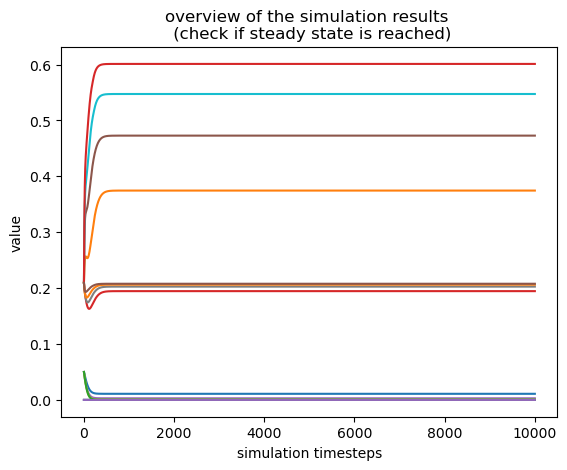

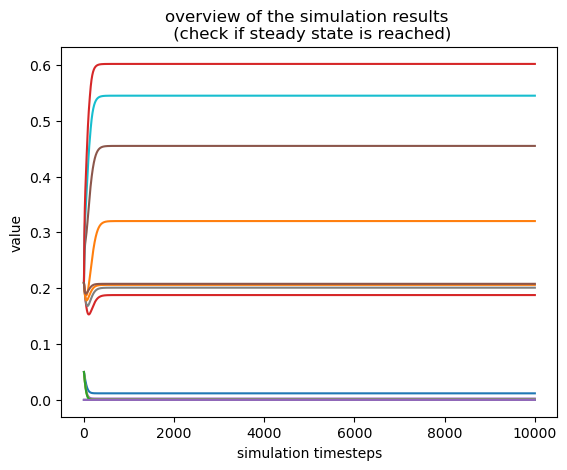

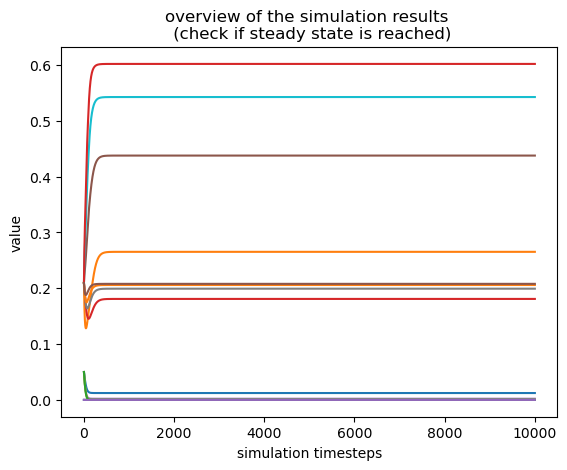

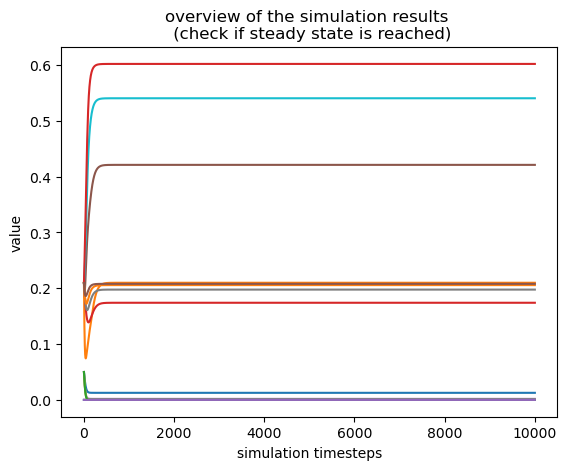

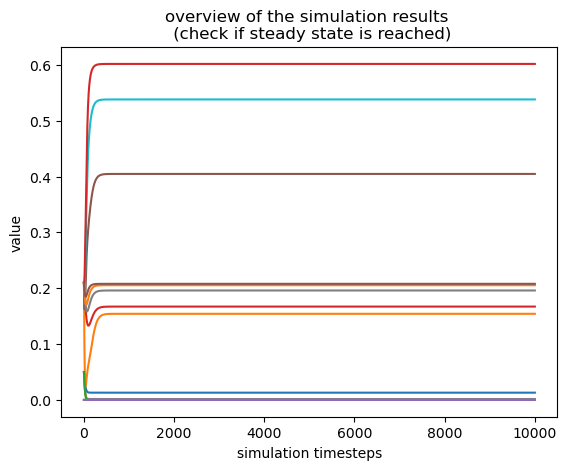

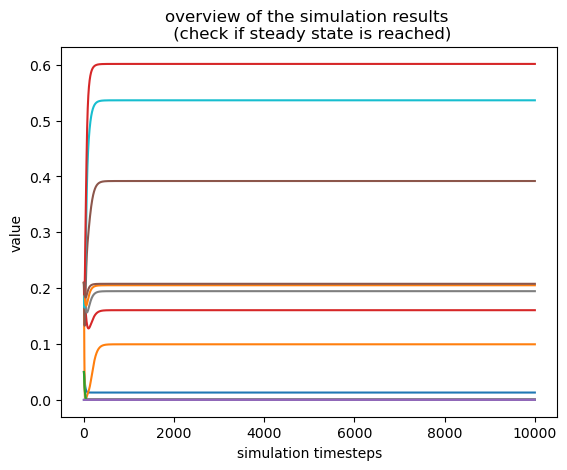

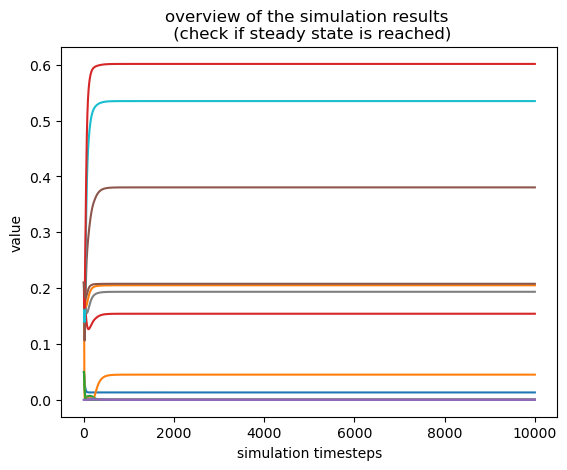

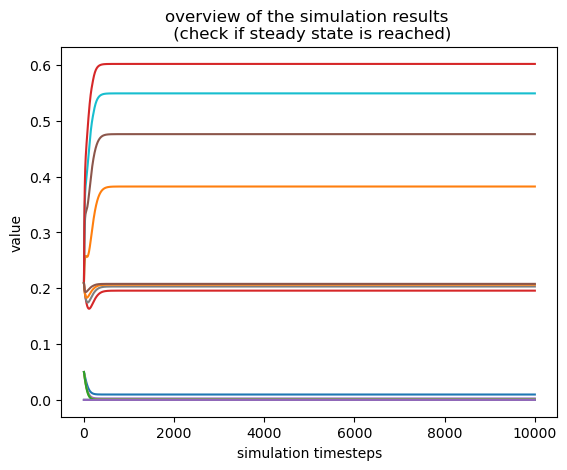

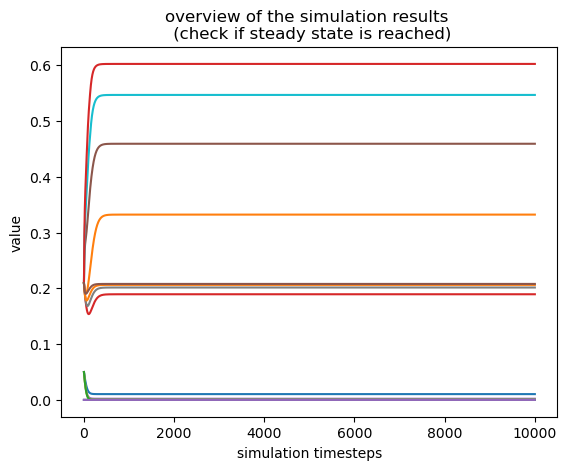

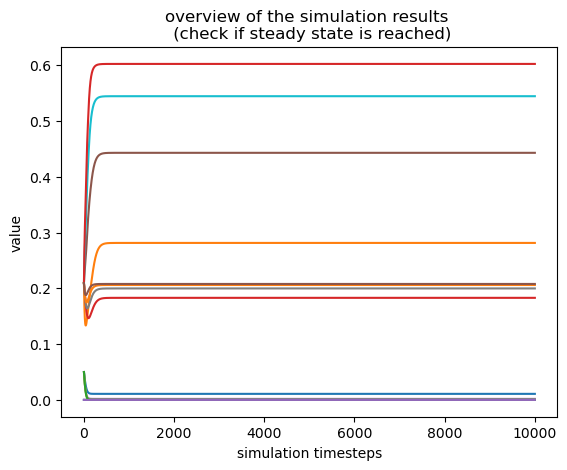

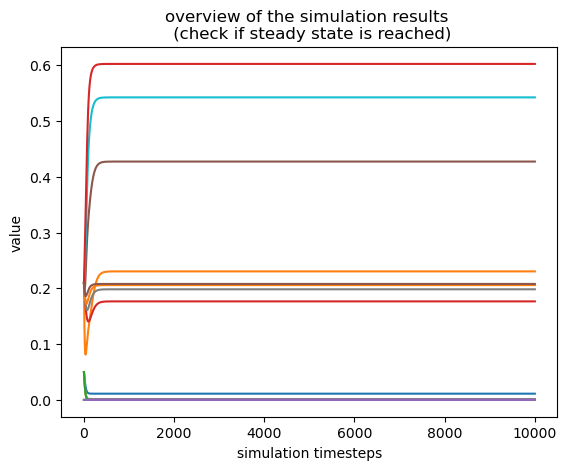

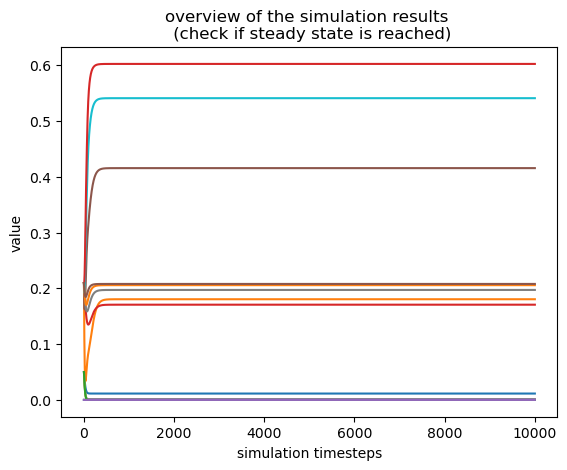

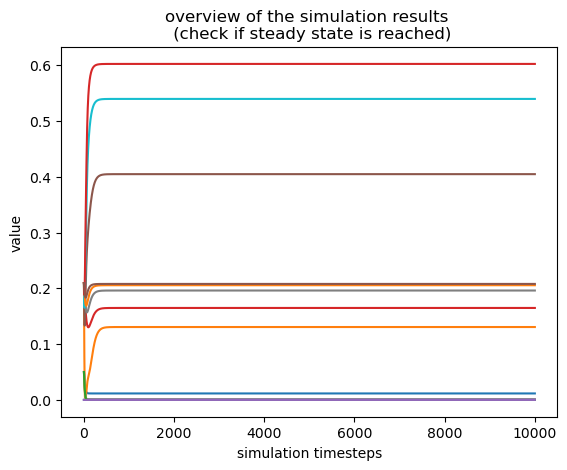

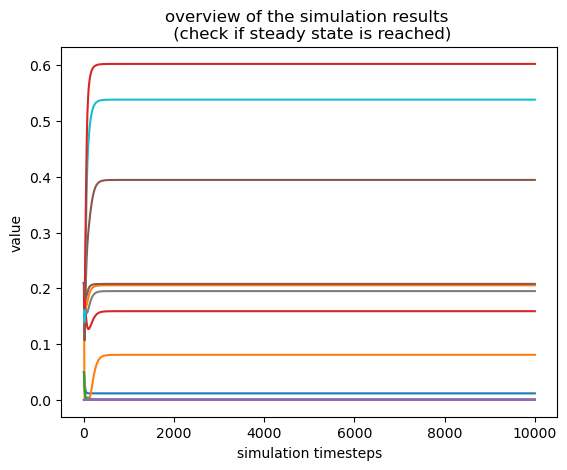

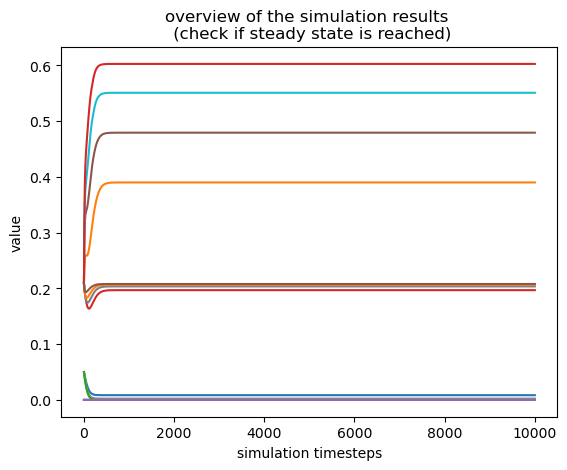

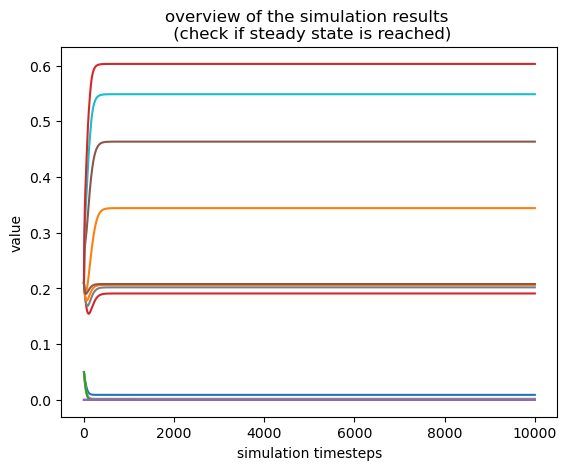

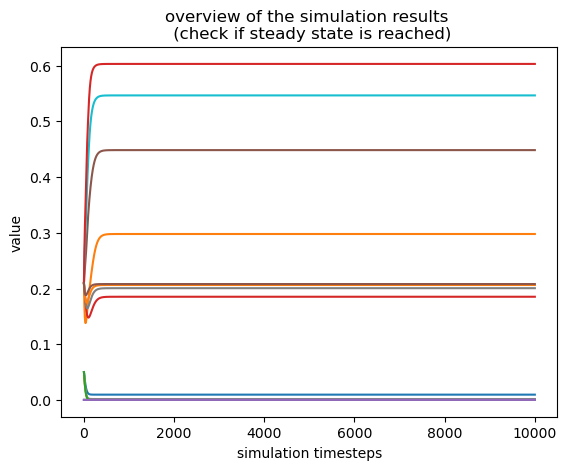

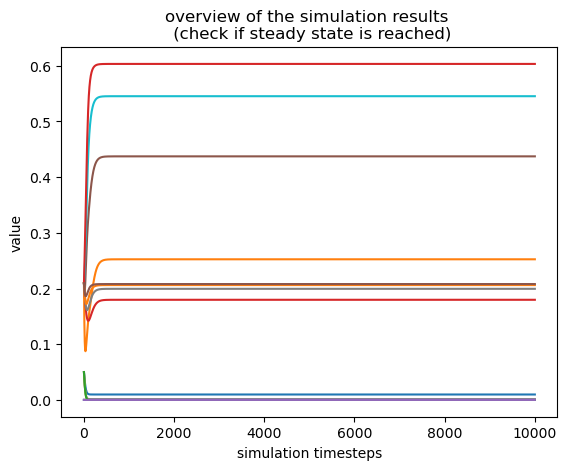

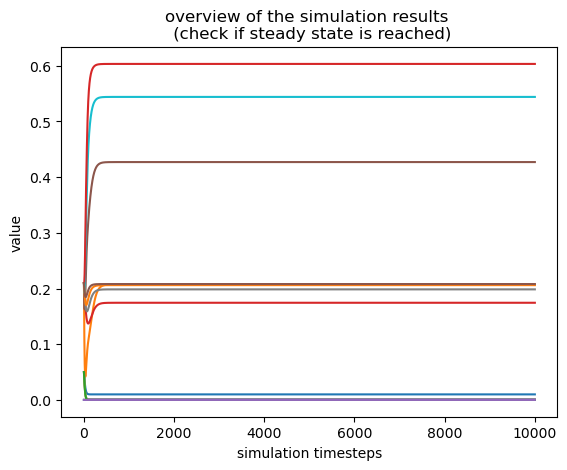

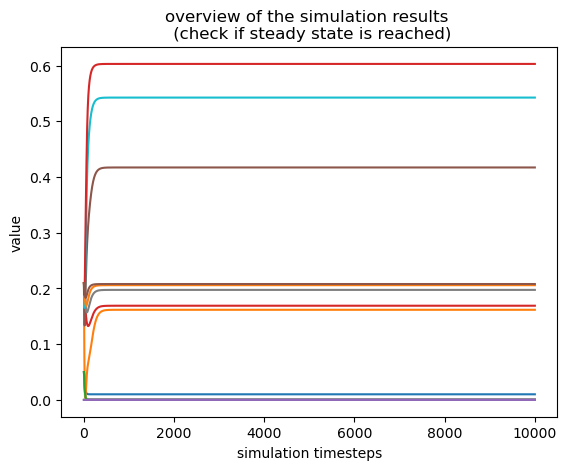

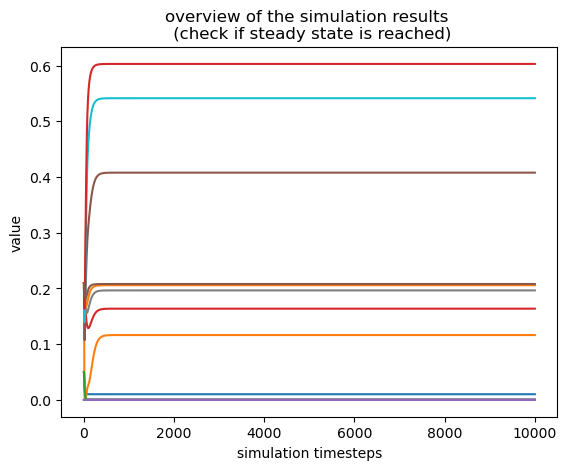

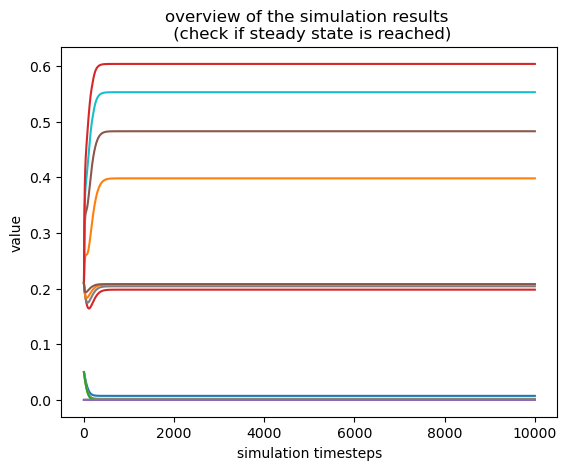

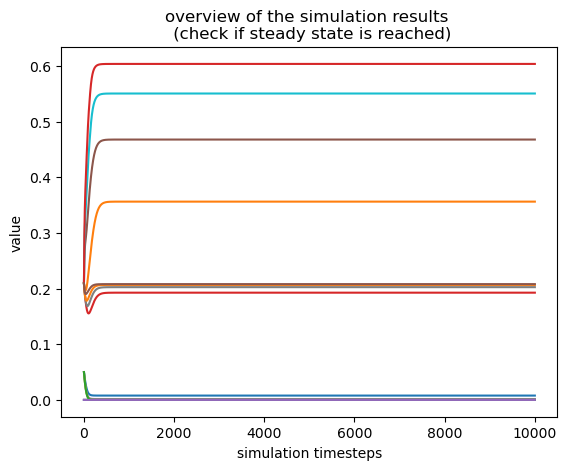

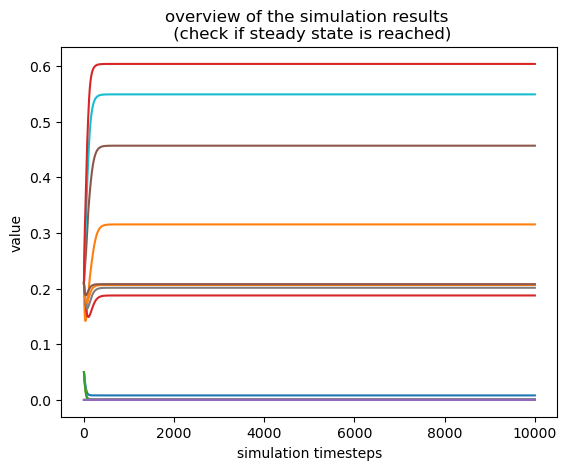

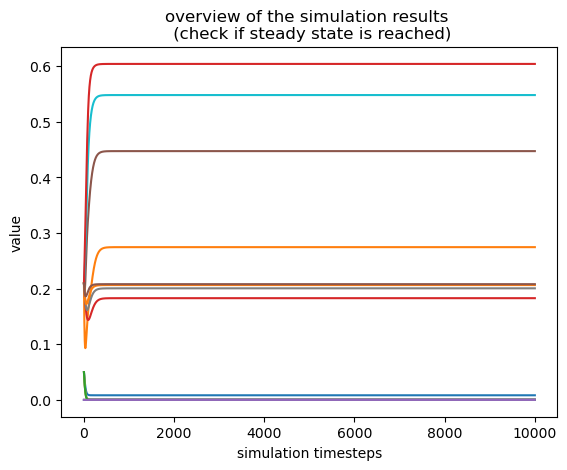

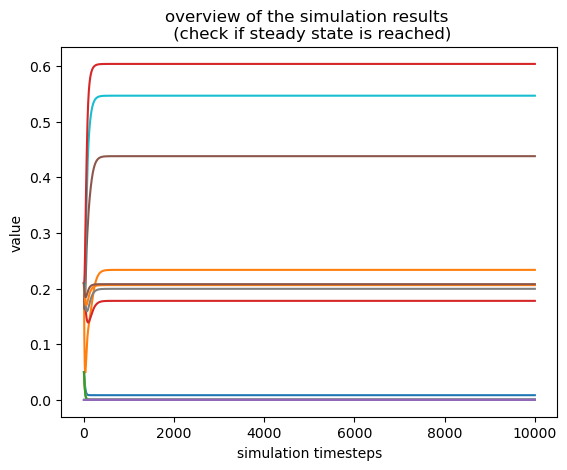

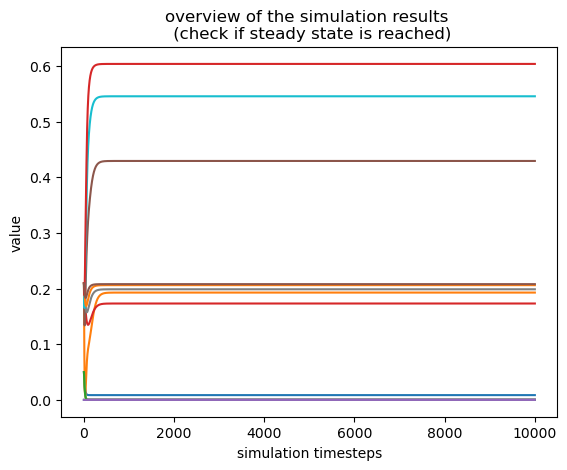

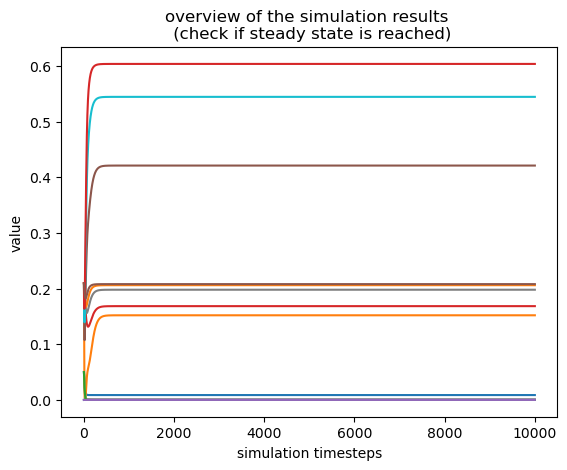

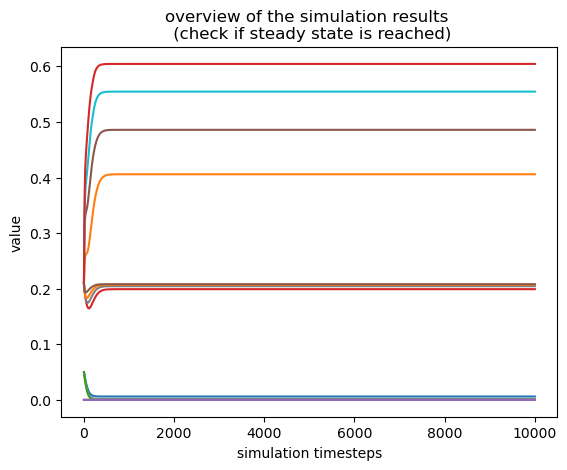

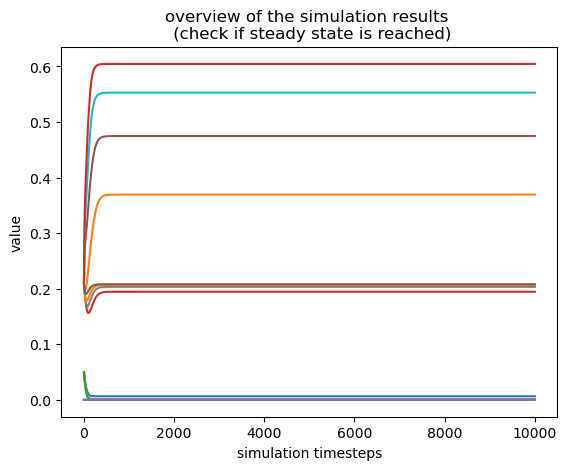

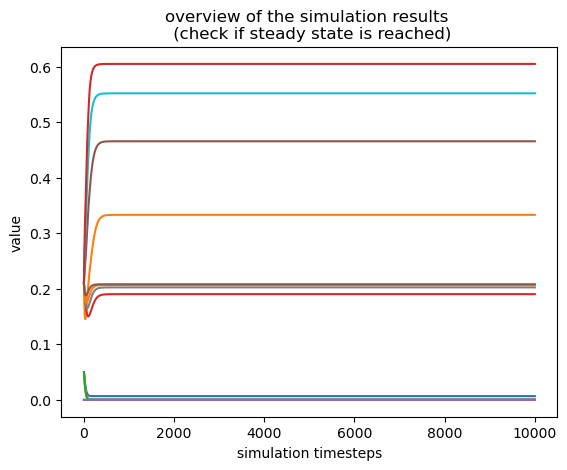

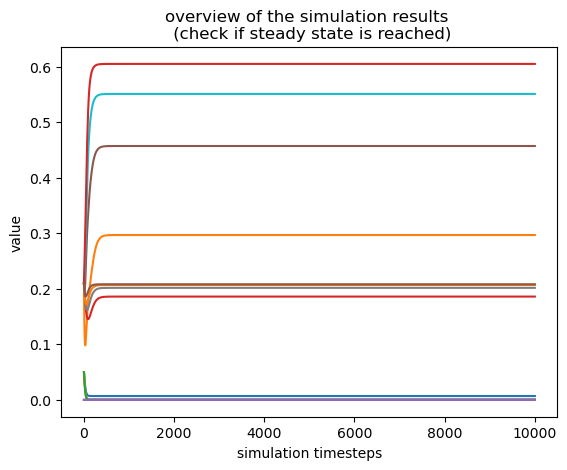

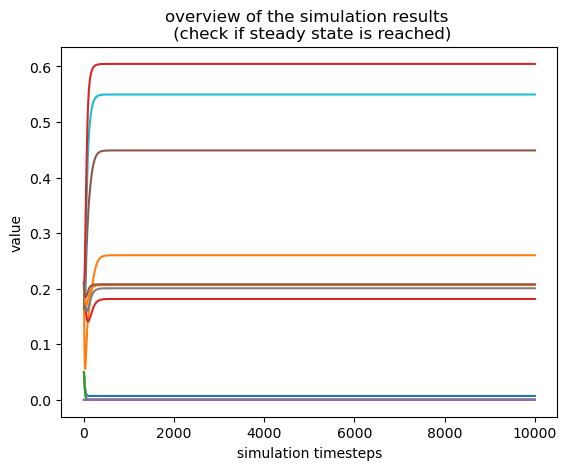

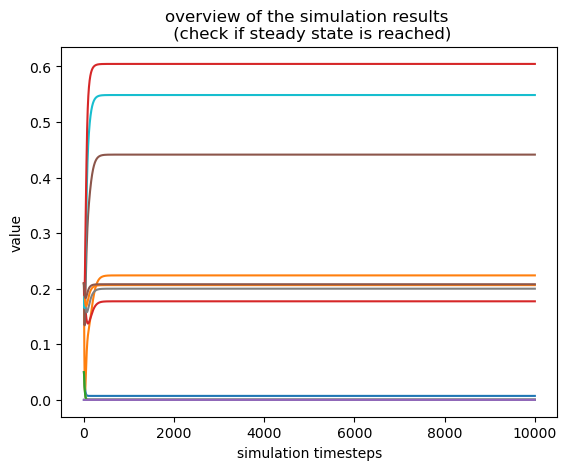

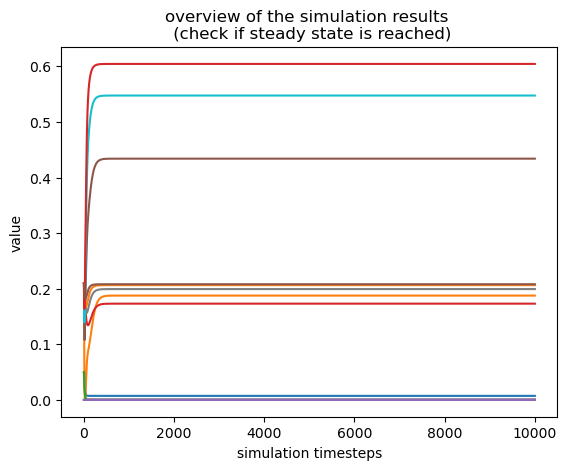

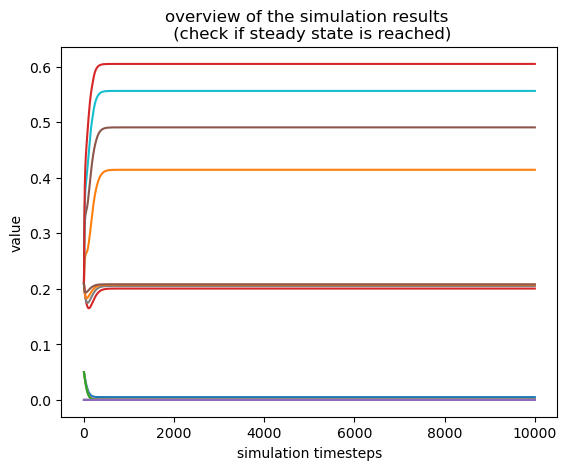

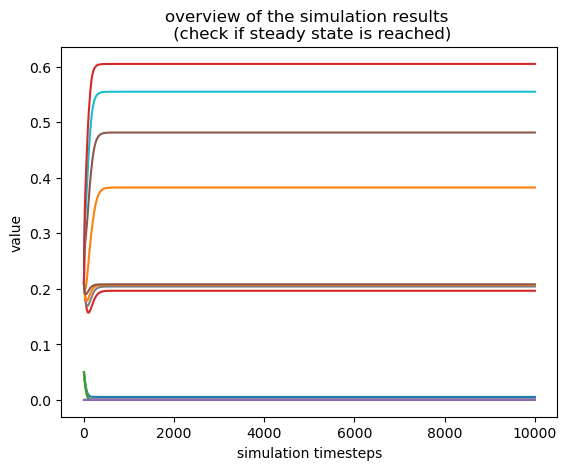

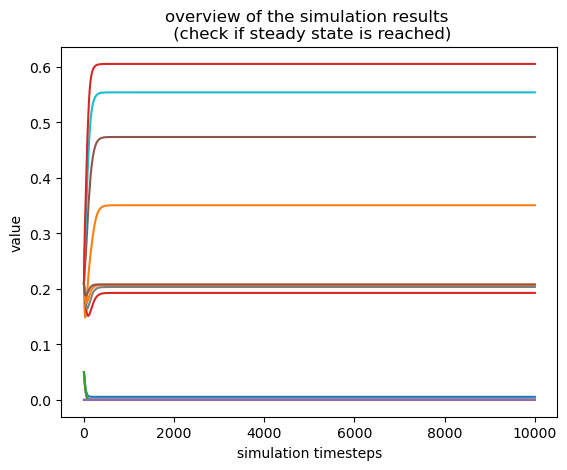

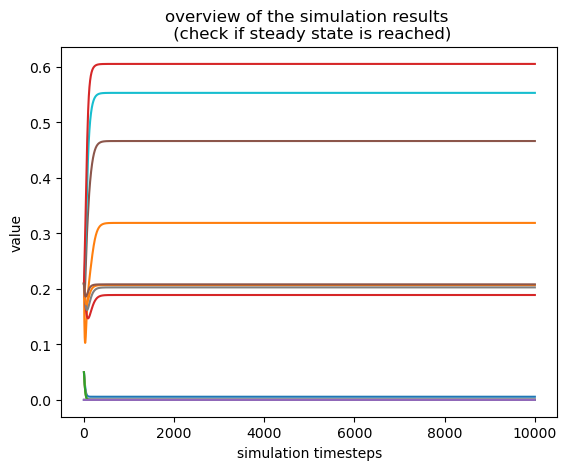

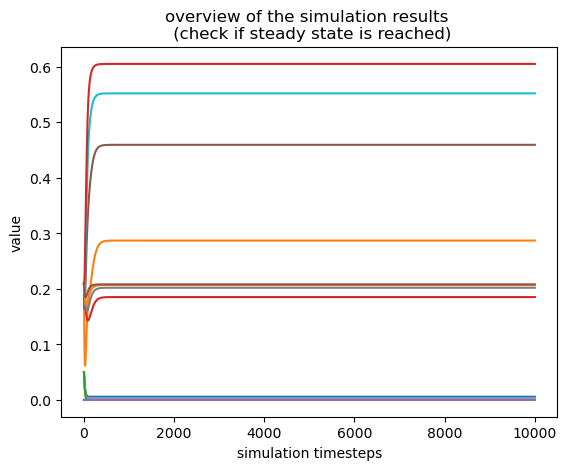

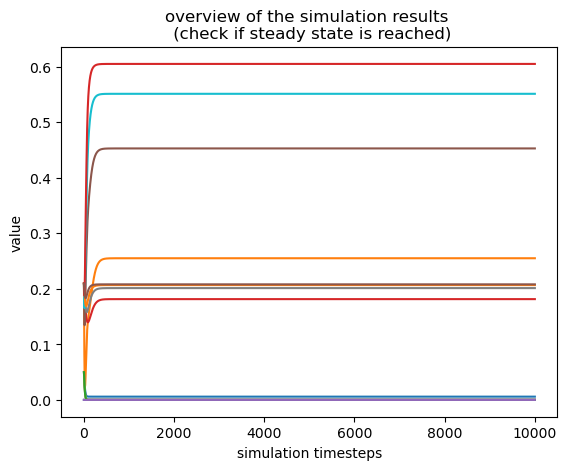

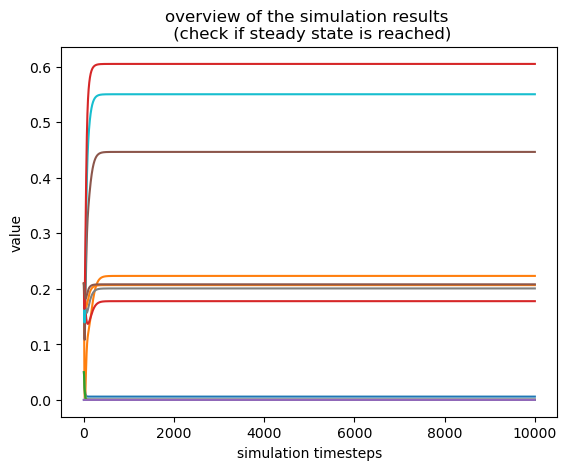

In [21]:
df = pd.DataFrame()

# compartment model instance
cmodel = STR_BM_cmod

for i in [0.1,0.09,0.08,0.07,0.06,0.05]:
    
    for X in [10,15,20,25,30,35,40]:
                
        # initial values for one compartment
        y0_1d = [
            0.05, #S 
            0.2095, #O
            0, #A
            0.2095 #yO
            ]

        # multiply initial values with the number of compartments
        y0 = y0_1d*cmodel.n_comps
        # simulation time
        t_eval=np.linspace(0,1,sim_dict[X][i])
        # Biomass concentration 
        X = X # to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
        # Liquid volume in the whole reactor
        VL = cmodel.calc_sc_cmodel()[1].sum()
        # Glucose feed rate g/h
        Fs_feed = X*i*VL*1000
        # create a solution object
        sol = sc_cmodel_sol(y0, t_eval, mmodel, cmodel, X, Fs_feed)
        
        sol_df = sol.sol_df
        sol_df["X"] = X
        sol_df["Fs_feed"] = Fs_feed
        sol_df["qS_feed"] = i
        sol_df["rel_vol"] = sol_df["liquid_vol [L]"]/sol_df["liquid_vol [L]"].sum()
        
        qS_avg = sol_df[["qS","rel_vol"]].product(axis=1).sum()
        sol_df["qS_avg"] = qS_avg
        
        qS_of_avg = sol_df[["qS_of","rel_vol"]].product(axis=1).sum()
        sol_df["qS_of_avg"] = qS_of_avg
        
        mu_avg = sol_df[["mu","rel_vol"]].product(axis=1).sum()
        sol_df["mu_avg"] = mu_avg
        
        sol_df["y_of"] = qS_of_avg/qS_avg
        sol_df["Ysx"] = mu_avg/qS_avg
        
        sol_df["starvation"] = sol_df["qS"] < 0.04
        sol_df["starv_ratio"] = sol_df[["starvation","rel_vol"]].product(axis=1).sum()
        
        df = pd.concat([df,sol_df])

df_sc_BM = df

### Complex case (cc) compartment model demonstration

In [22]:
from cmodels.cc_cmodel import cc_cmodel
from cmodels.cc_cmodel_sol import cc_cmodel_sol

from mmodels.xu_bb.cc_xu_bb import cc_xu_bb

from cell_tracking.cell_tracking import cell_tracking

In [23]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading compartment model

In [24]:
STR_BM_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_BM/9_RTD_BM.xlsx')

In [25]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

complex_mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

#### Solving compartment model

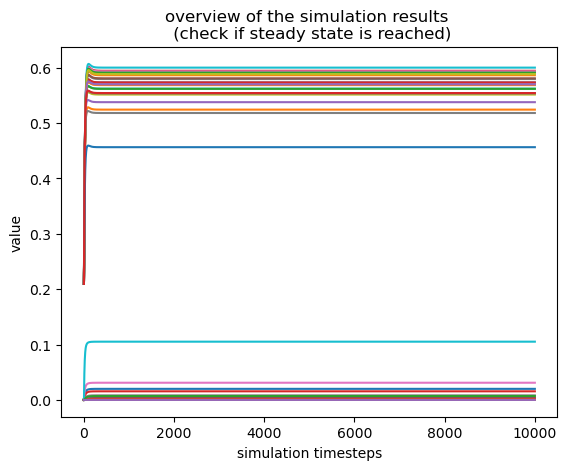

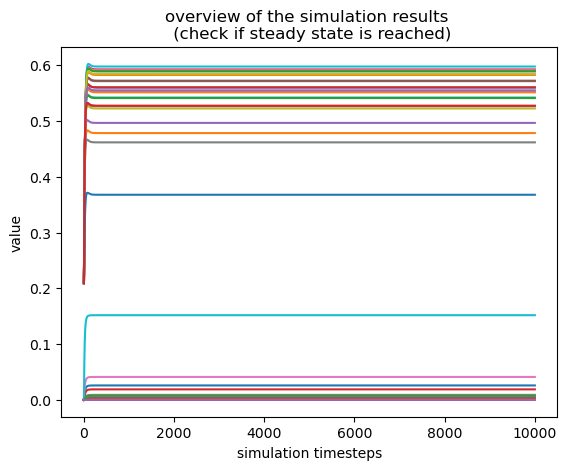

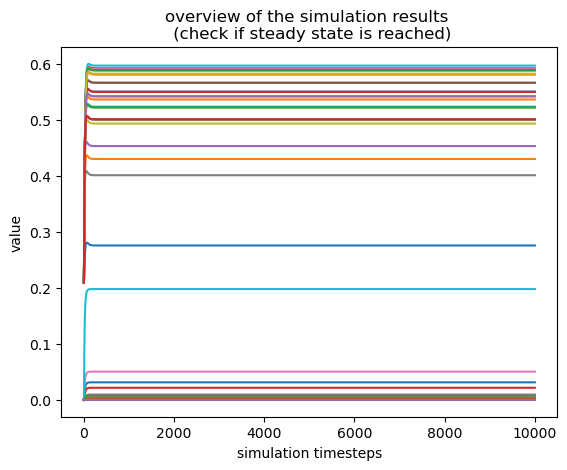

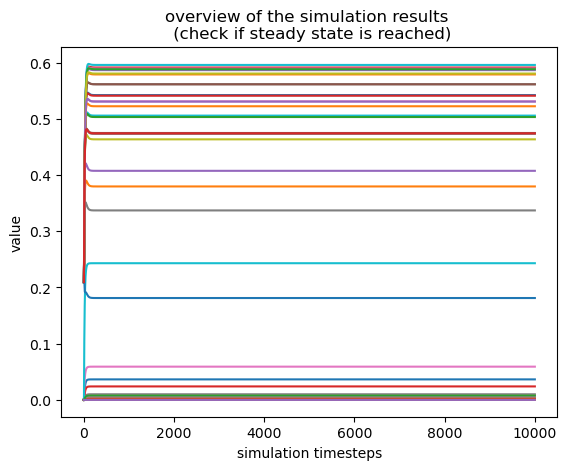

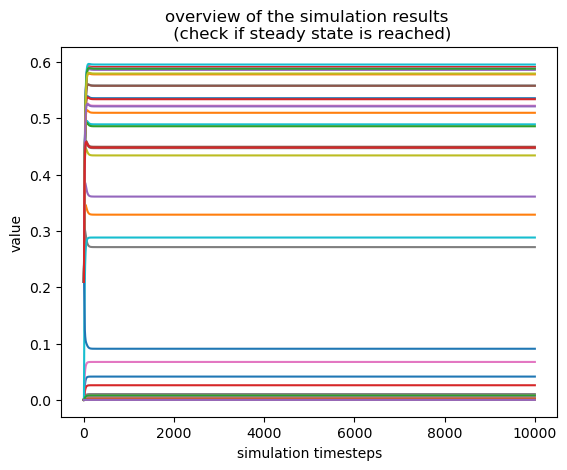

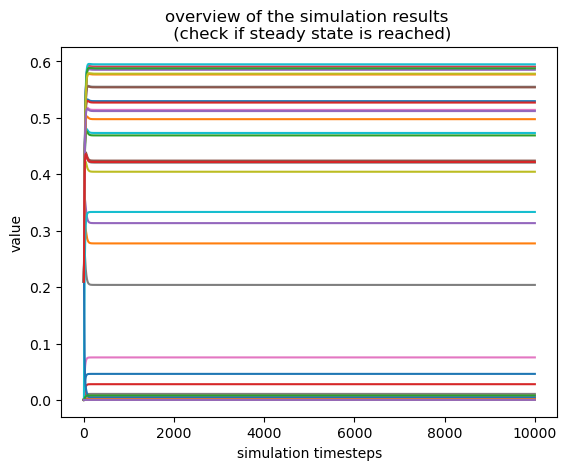

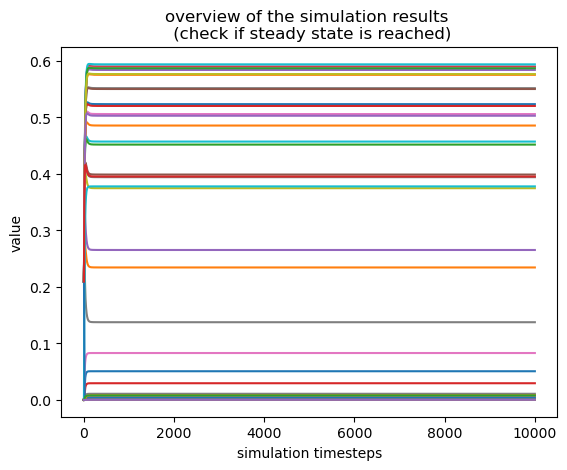

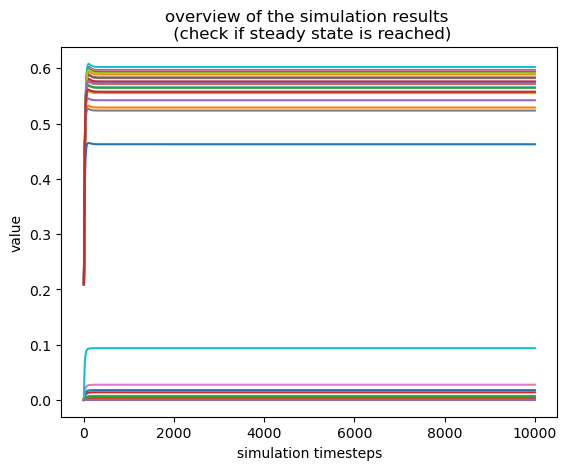

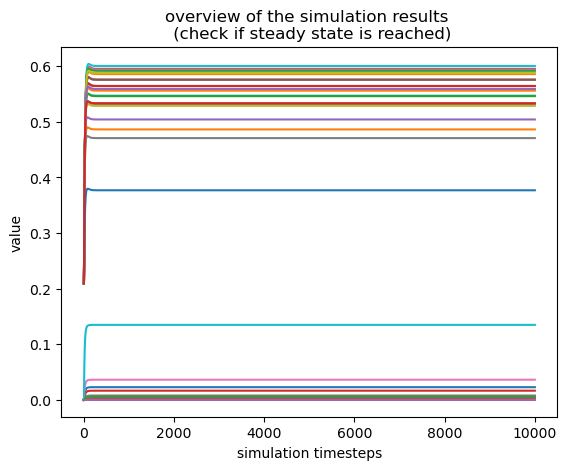

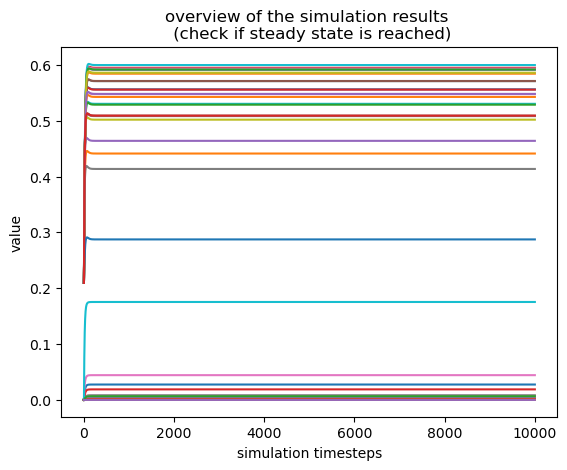

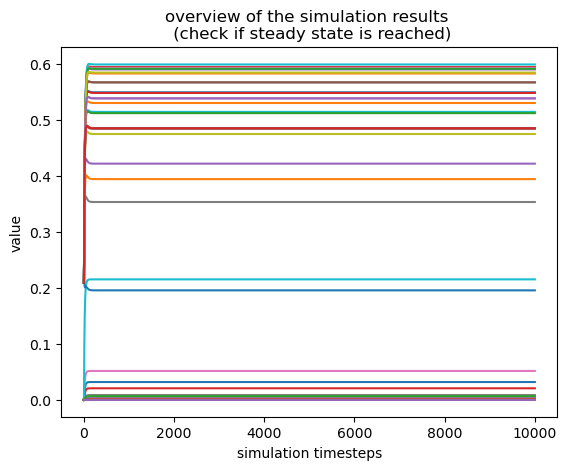

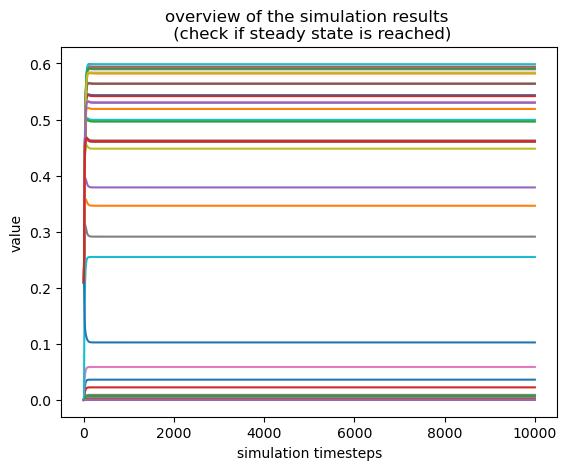

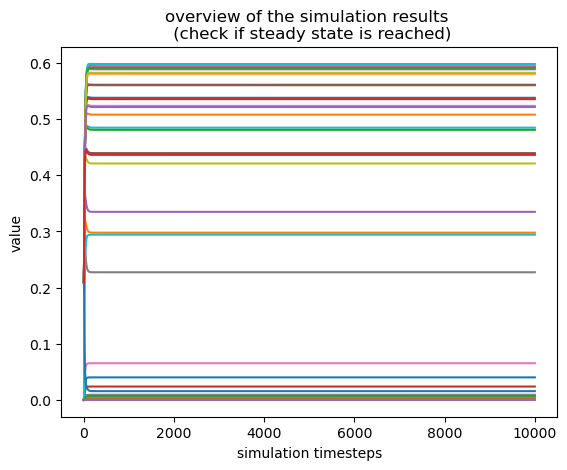

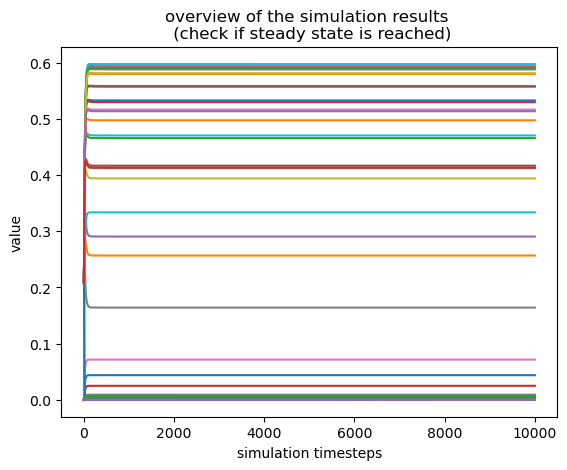

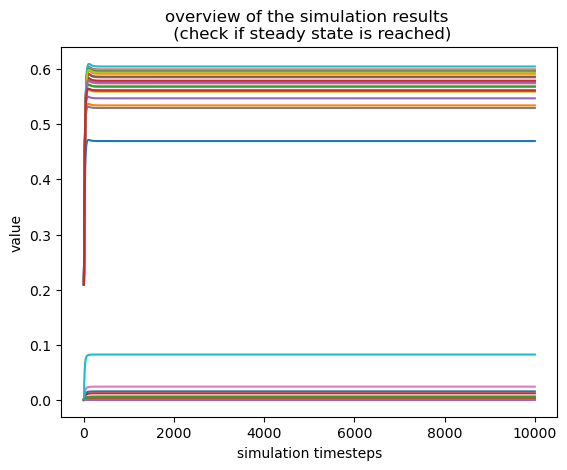

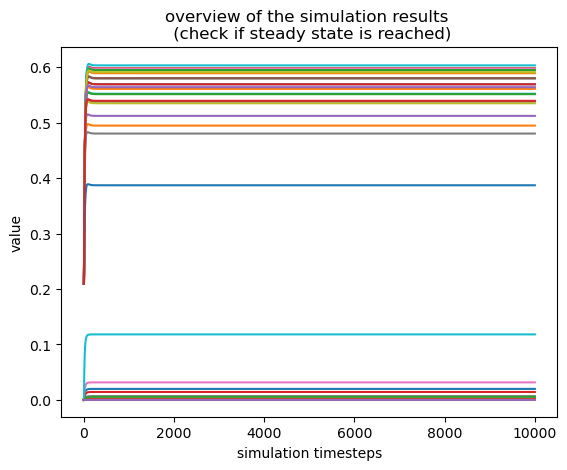

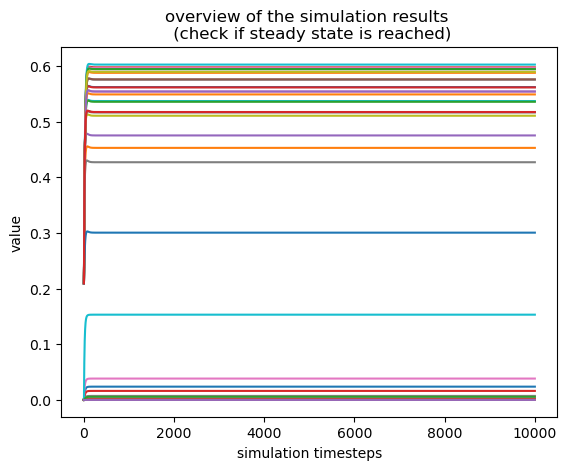

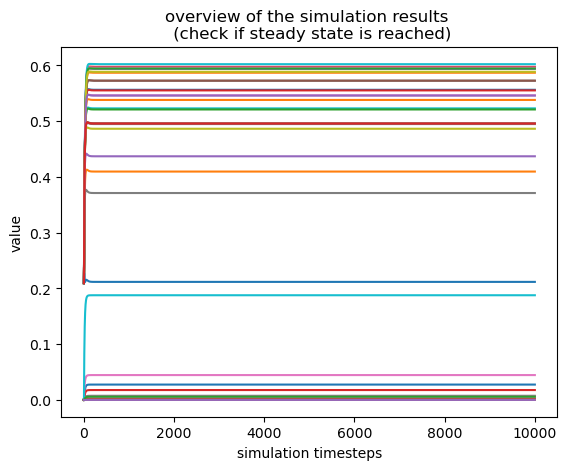

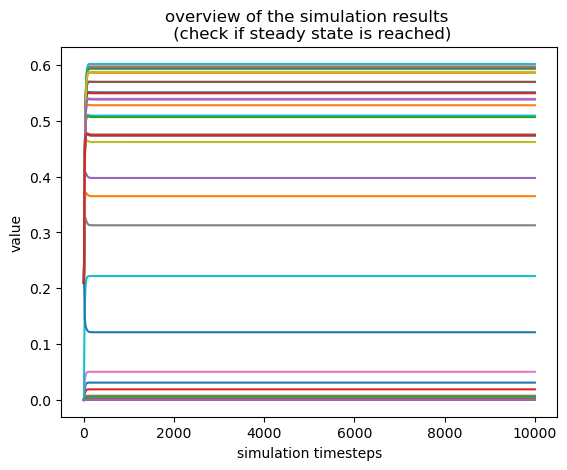

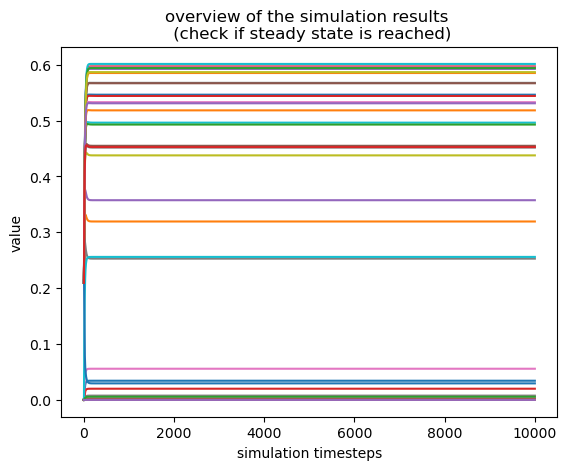

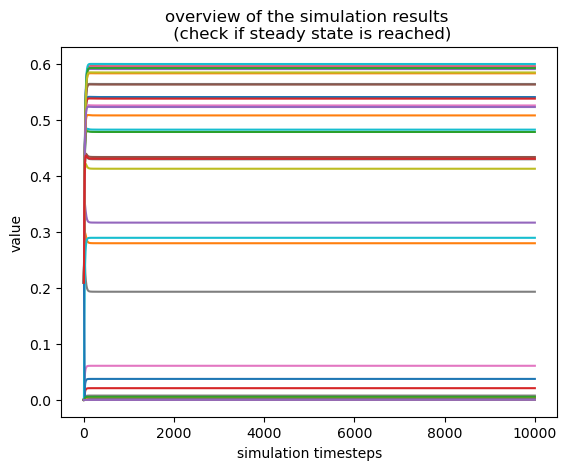

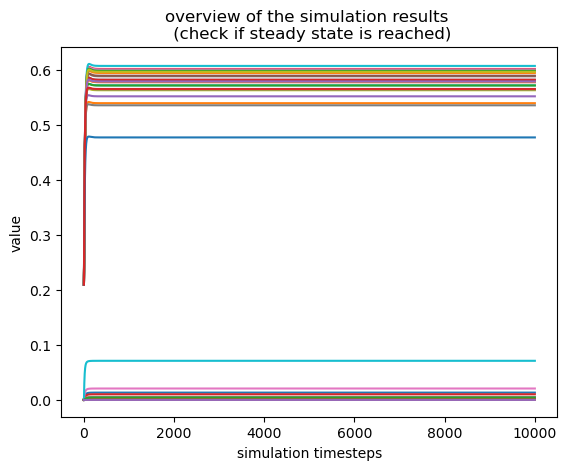

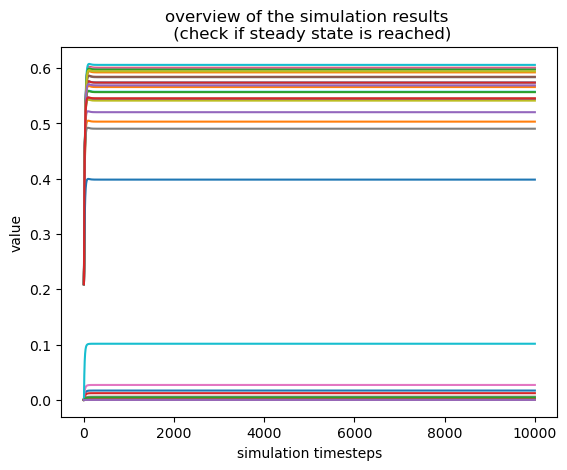

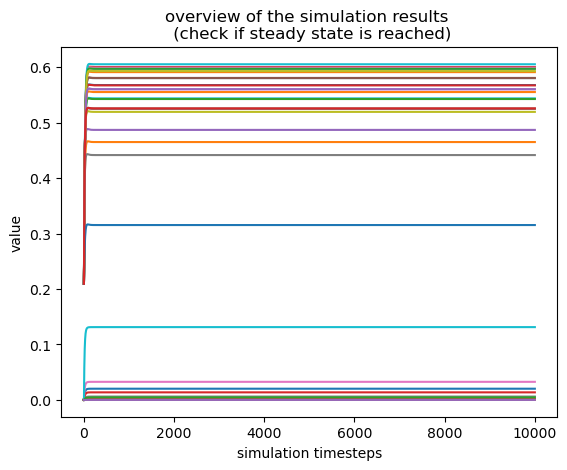

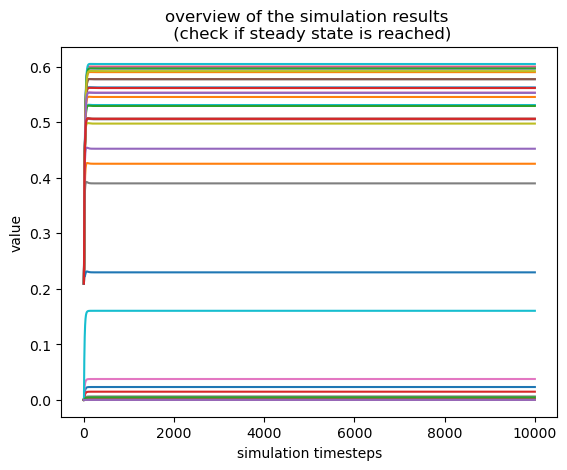

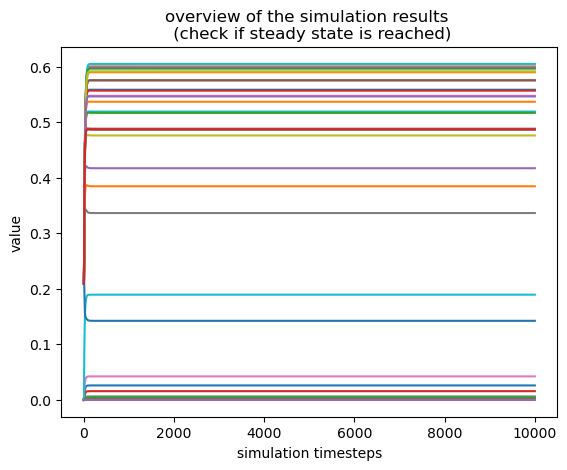

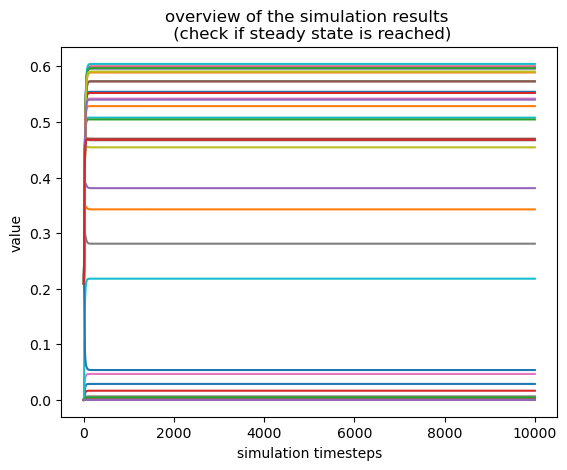

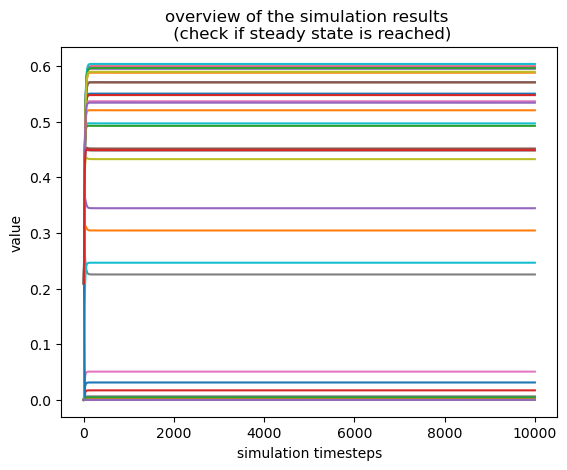

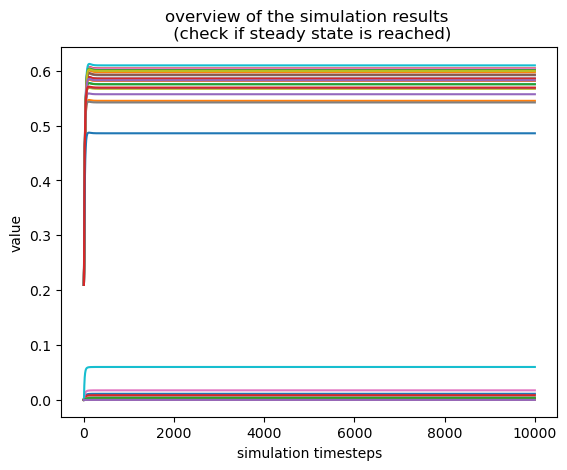

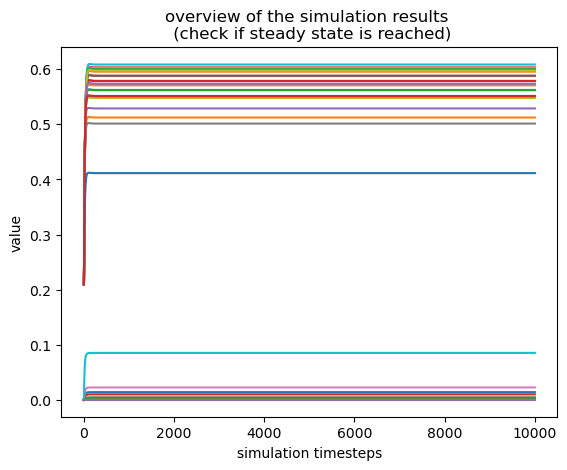

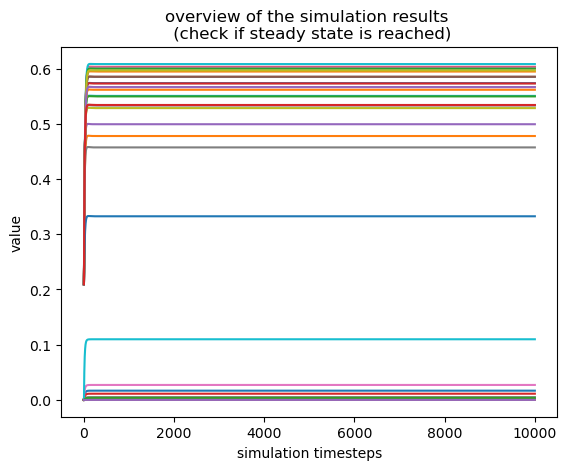

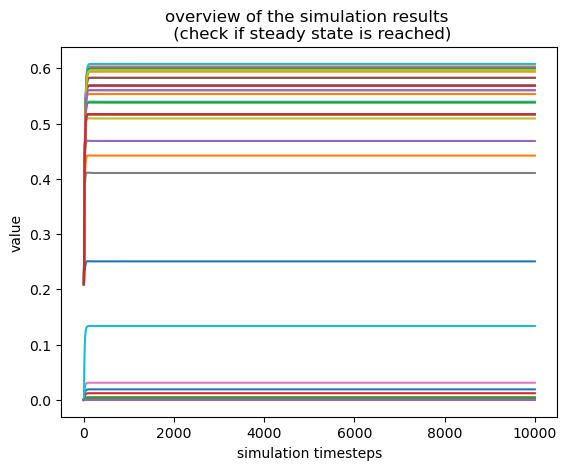

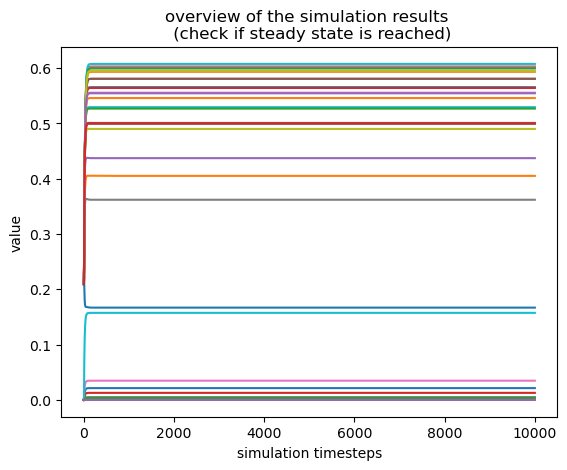

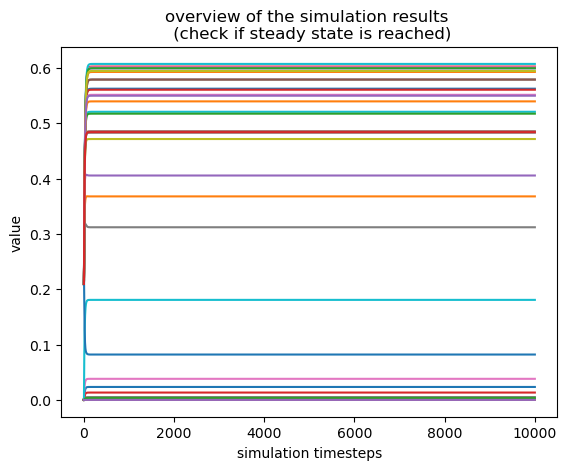

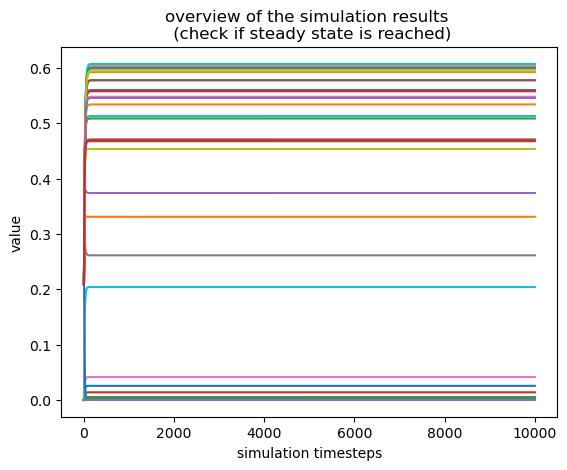

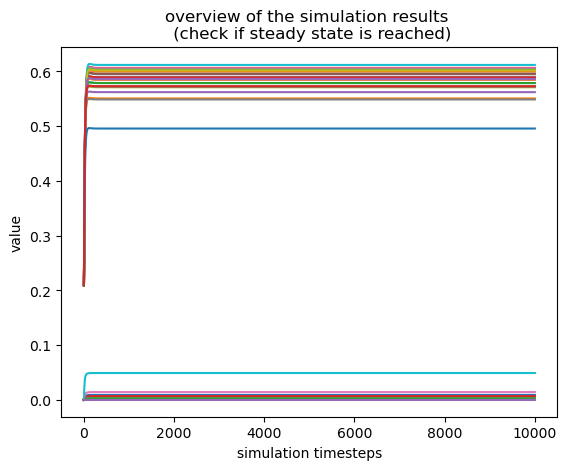

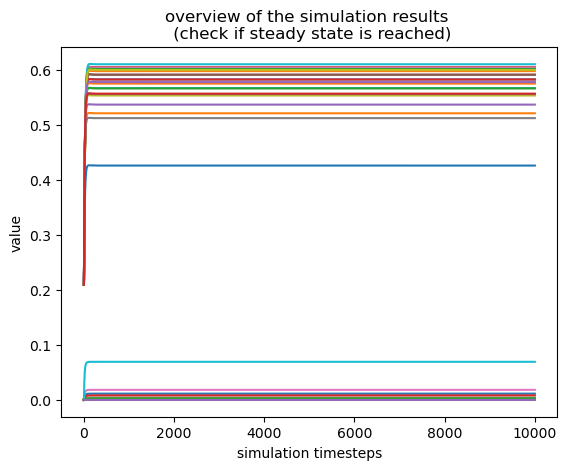

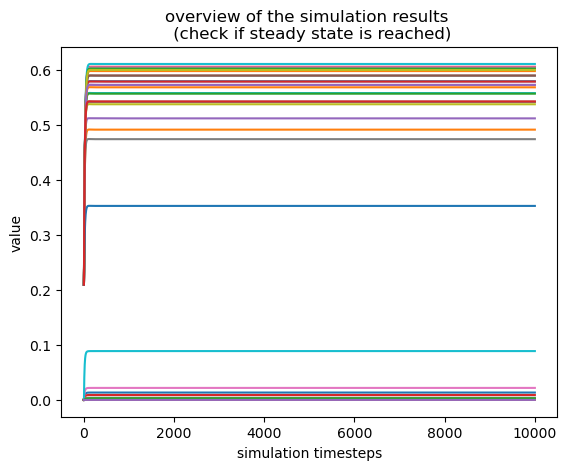

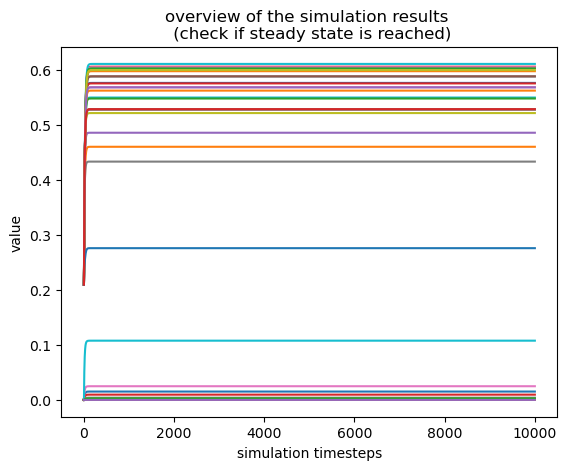

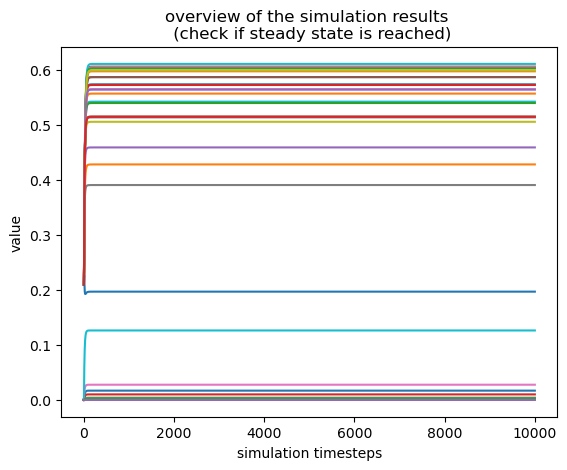

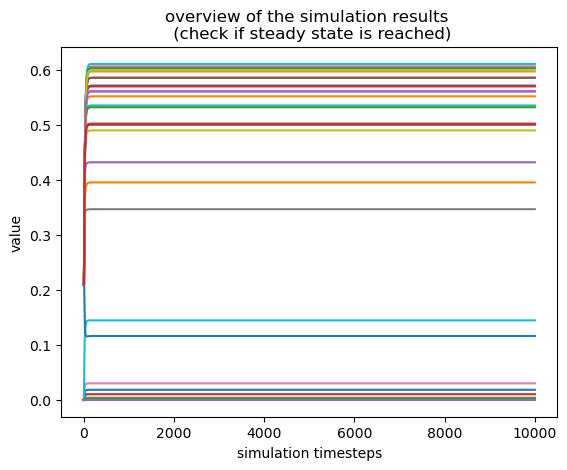

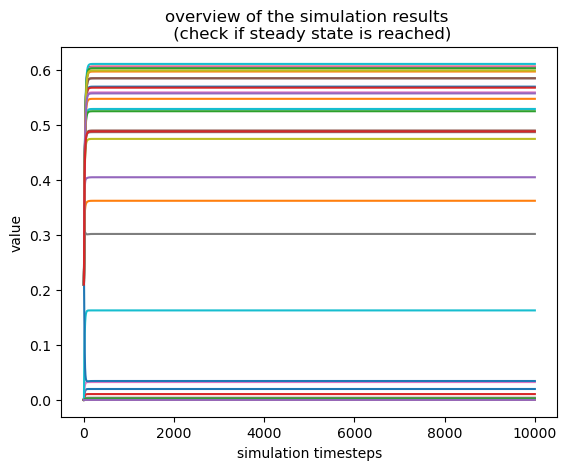

In [26]:
df_cc = pd.DataFrame()

# compartment model instance
cmodel = STR_BM_GNR

for i in [0.1,0.09,0.08,0.07,0.06,0.05]:
    
    for X in [10,15,20,25,30,35,40]:

        y0_1d = [
            0.0, #S 
            0.2095, #O
            0 #A
            ]

        # multiply initial values with the number of compartments
        y0 = y0_1d*len(cmodel.CompVolumes)
        # simulation time
        t_eval=np.linspace(0,1,10001)
        # Biomass concentration 
        X = X 
        # Liquid volume in the whole reactor
        VL = (cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH).sum()
        # Glucose feed rate
        Fs_feed = X*i*VL*1000

        sol_cc = cc_cmodel_sol(
            y0 = y0,
            t_eval = t_eval, 
            mmodel = complex_mmodel, 
            cmodel = cmodel, 
            X = X, 
            Fs_feed = Fs_feed
        )
        
        sol_df_cc = sol_cc.sol_df
        sol_df_cc["X"] = X
        sol_df_cc["Fs_feed"] = Fs_feed
        sol_df_cc["qS_feed"] = i
        sol_df_cc["rel_vol"] = sol_df_cc["liquid_vol [L]"]/sol_df_cc["liquid_vol [L]"].sum()
        
        qS_avg = sol_df_cc[["qS [g/g/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["qS_avg"] = qS_avg
        
        qS_of_avg = sol_df_cc[["qS_of [g/g/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["qS_of_avg"] = qS_of_avg
        
        mu_avg = sol_df_cc[["mu [1/h]","rel_vol"]].product(axis=1).sum()
        sol_df_cc["mu_avg"] = mu_avg
        
        sol_df_cc["y_of"] = qS_of_avg/qS_avg
        sol_df_cc["Ysx"] = mu_avg/qS_avg
        
        sol_df_cc["starvation"] = sol_df_cc["qS [g/g/h]"] < 0.04
        sol_df_cc["starv_ratio"] = sol_df_cc[["starvation","rel_vol"]].product(axis=1).sum()
        
        df_cc = pd.concat([df_cc,sol_df_cc])
        
df_cc_BM = df_cc

## Data Exports

In [27]:
df_cc_BM.to_excel("df_cc_BM.xlsx")
df_cc_LS.to_excel("df_cc_LS.xlsx")
df_sc_BM.to_excel("df_sc_BM.xlsx")
df_sc_LS.to_excel("df_sc_LS.xlsx")

## Plotting sens. analysis

### Ysx

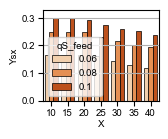

In [28]:
data = df_cc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="Ysx",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,0.33)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("Ysx_cc_LS.svg", dpi=900);

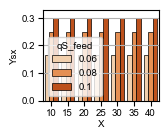

In [29]:
data = df_cc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="Ysx",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,0.33)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("Ysx_cc_BM.svg", dpi=900);

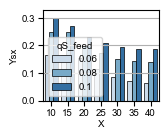

In [30]:
data = df_sc_LS_changed_kla
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="Ysx",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,0.33)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("Ysx_sc_changed_kla_LS.svg", dpi=900);

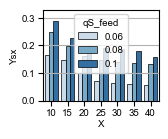

In [31]:
data = df_sc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="Ysx",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,0.33)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("Ysx_sc_LS.svg", dpi=900);

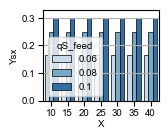

In [32]:
data = df_sc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="Ysx",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,0.33)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("Ysx_sc_BM.svg", dpi=900);

### y_of

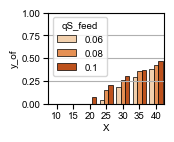

In [33]:
data = df_cc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="y_of",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("y_of_cc_LS.svg", dpi=900);

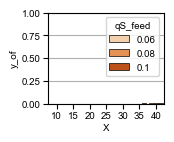

In [34]:
data = df_cc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="y_of",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("y_of_cc_BM.svg", dpi=900);

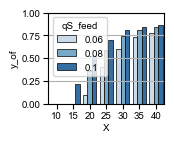

In [35]:
data = df_sc_LS_changed_kla
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="y_of",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("y_of_sc_changed_kla_LS.svg", dpi=900);

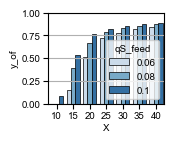

In [36]:
data = df_sc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="y_of",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("y_of_sc_LS.svg", dpi=900);

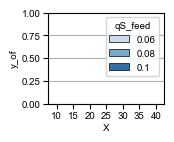

In [37]:
data = df_sc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="y_of",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("y_of_sc_BM.svg", dpi=900);

### starvation_ratio

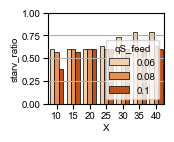

In [38]:
data = df_cc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="starv_ratio",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("starv_ratio_cc_LS.svg", dpi=900);

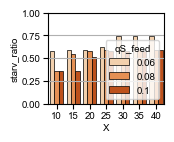

In [39]:
data = df_cc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="starv_ratio",
    hue="qS_feed",
    palette="Oranges",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("starv_ratio_cc_BM.svg", dpi=900);

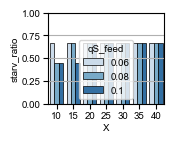

In [40]:
data = df_sc_LS_changed_kla
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="starv_ratio",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("starv_ratio_sc_changed_kla_LS.svg", dpi=900);

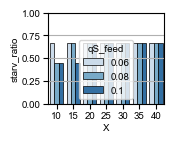

In [41]:
data = df_sc_LS
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="starv_ratio",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("starv_ratio_sc_LS.svg", dpi=900);

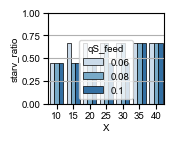

In [42]:
data = df_sc_BM
data = data[data["qS_feed"] != 0.05]
data = data[data["qS_feed"] != 0.07]
data = data[data["qS_feed"] != 0.09]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

sns.barplot(
    data=data,
    x="X",
    y="starv_ratio",
    hue="qS_feed",
    palette="Blues",
    edgecolor="k",
    ax=ax,
    linewidth=0.5
)

ax.set_ylim(0,1)

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
plt.grid(axis="y")

# plt.savefig("starv_ratio_sc_BM.svg", dpi=900);

## Cell Tracking

In [43]:
from cmodels.cc_cmodel import cc_cmodel
from cmodels.cc_cmodel_sol import cc_cmodel_sol
from mmodels.xu_bb.cc_xu_bb import cc_xu_bb
from cell_tracking.cell_tracking_fast import cell_tracking_fast

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
STR_BM_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_BM/9_RTD_BM.xlsx')
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [45]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

complex_mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

In [46]:
def couple_cmodel_solution(cmodel_sol,cell_tracks,variable_str):

    cell_tracks_array = cell_tracks.cell_tracks
    compartment_model_solution = np.asarray(cmodel_sol.sol_df[variable_str])
    cell_lifelines = np.empty(shape=(cell_tracks_array.shape))

    for cell, lifeline in enumerate(cell_tracks_array):
        for step, comp in enumerate(lifeline):
            
            cell_lifelines[cell,step] = compartment_model_solution[int(comp)-1]
#         print(cell)
            
    return cell_lifelines

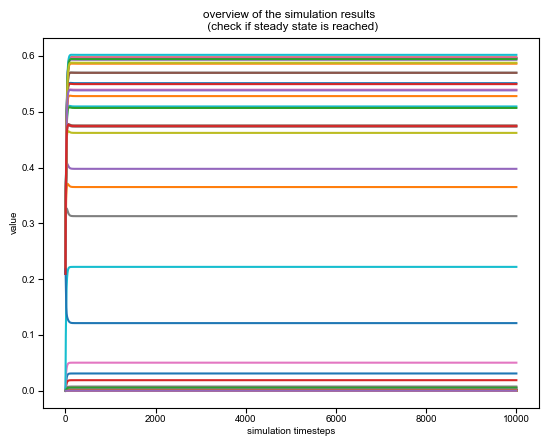

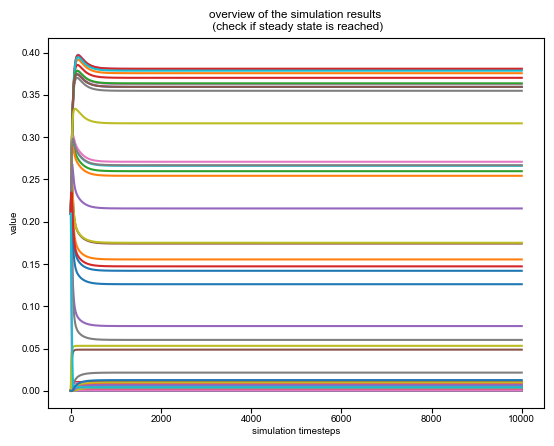

In [47]:
# compartment model instance
cmodel = STR_BM_GNR

i = 0.08
    
X = 30

y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(cmodel.CompVolumes)
# simulation time
t_eval=np.linspace(0,1,10001)
# Biomass concentration 
X = X 
# Liquid volume in the whole reactor
VL = (cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH).sum()
# Glucose feed rate
Fs_feed = X*i*VL*1000

sol_cc_BM_cell_tracking = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

# compartment model instance
cmodel = STR_LS_GNR

y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(cmodel.CompVolumes)
# simulation time
t_eval=np.linspace(0,1,10001)
# Biomass concentration 
X = X 
# Liquid volume in the whole reactor
VL = (cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH).sum()
# Glucose feed rate
Fs_feed = X*i*VL*1000

sol_cc_LS_cell_tracking = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

### Cell tracking and coupling to compartment model solution

In [49]:
def couple_cmodel_solution(cmodel_sol,cell_tracks,variable_str):

    cell_tracks_array = cell_tracks.cell_tracks
    compartment_model_solution = np.asarray(cmodel_sol.sol_df[variable_str])
    cell_lifelines = np.empty(shape=(cell_tracks_array.shape))

    for cell, lifeline in enumerate(cell_tracks_array):
        for step, comp in enumerate(lifeline):
            
            cell_lifelines[cell,step] = compartment_model_solution[int(comp)-1]
#         print(cell)
            
    return cell_lifelines

#### Saving timesteps

In [50]:
# cell tracking
VL_array = np.array(STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH)
CompFlows = np.array(STR_LS_GNR.CompFlows)*3600
t_eval = np.linspace(0,2,240001)

ct = cell_tracking_fast(
    VL=VL_array,
    CompFlows = CompFlows,
    t_eval = t_eval,
    n_parcels = 1000
)

np.save(file='lifelines/time_steps_cell_lifelines', arr=ct.t_eval)

#### Perform the following: (1) calcualte cell tracking (2) couple to compartment model solution, (3) save relevant lifelines as npy files

##### Low setting

In [51]:
sol = sol_cc_LS_cell_tracking
cmodel = STR_LS_GNR

for i in range(0,100):

    # cell tracking
    VL_array = np.array(cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH)
    CompFlows = np.array(cmodel.CompFlows)*3600
    t_eval = np.linspace(0,2,240001)

    ct1 = cell_tracking_fast(
        VL=VL_array,
        CompFlows = CompFlows,
        t_eval = t_eval,
        n_parcels = 30
    )

    ct1.calculate_cell_tracks()

    #solution coupling
    cell_lifelines = couple_cmodel_solution(sol,ct1,'qS [g/g/h]')
    np.save(file='lifelines/qS_cell_lifelines_LS'+str(i), arr=cell_lifelines)

    #solution coupling
    cell_lifelines = couple_cmodel_solution(sol,ct1,'qS_of [g/g/h]')
    np.save(file='lifelines/qS_of_cell_lifelines_LS'+str(i), arr=cell_lifelines)

    # cell_lifelines = couple_cmodel_solution(sol,ct1,'comp_id')
    # np.save(file='lifelines/comp_id_cell_lifelines_LS'+str(i), arr=cell_lifelines)

    # delete objects
    del cell_lifelines
    del ct1

100%|████████████████████████████████████████████████████████████████████████| 240001/240001 [00:43<00:00, 5518.62it/s]


##### Base setting

In [52]:
sol = sol_cc_BM_cell_tracking
cmodel = STR_BM_GNR

for i in range(0,100):

    # cell tracking
    VL_array = np.array(cmodel.CompVolumes.CompVol - cmodel.CompVolumes.CompVol*cmodel.GH.GH)
    CompFlows = np.array(cmodel.CompFlows)*3600
    t_eval = np.linspace(0,2,240001)

    ct1 = cell_tracking_fast(
        VL=VL_array,
        CompFlows = CompFlows,
        t_eval = t_eval,
        n_parcels = 30
    )

    ct1.calculate_cell_tracks()

    #solution coupling
    cell_lifelines = couple_cmodel_solution(sol,ct1,'qS [g/g/h]')
    np.save(file='lifelines/qS_cell_lifelines_BM'+str(i), arr=cell_lifelines)

    #solution coupling
    cell_lifelines = couple_cmodel_solution(sol,ct1,'qS_of [g/g/h]')
    np.save(file='lifelines/qS_of_cell_lifelines_BM'+str(i), arr=cell_lifelines)

    # cell_lifelines = couple_cmodel_solution(sol,ct1,'comp_id')
    # np.save(file='lifelines/comp_id_cell_lifelines_BM'+str(i), arr=cell_lifelines)

    # delete objects
    del cell_lifelines
    del ct1

100%|████████████████████████████████████████████████████████████████████████| 240001/240001 [00:34<00:00, 7007.12it/s]


### Plot the reactor

In [53]:
def plot_variabel_in_reactor_compartment(RTD_sol, fig, ax, variable_string, vmin, v_max, cmap, cmap_ax):
        
    solution = variable_string

    cmap = cmap
    # for colormap normalization
    vmin = vmin
    vmax = v_max

    ax.set_xlim(0,2)
    ax.set_ylim(0,11)
    ax.set_xlabel('radius (m)')
    ax.set_ylabel('height (m)')
    ax.set_title(solution)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap), cax=cmap_ax)

    for i in RTD_sol.cmodel['CompMap'].index:
        Xmin = RTD_sol.cmodel['CompMap'].iloc[i].X_min
        Xmax = RTD_sol.cmodel['CompMap'].iloc[i].X_max
        Ymin = RTD_sol.cmodel['CompMap'].iloc[i].Y_min
        Ymax = RTD_sol.cmodel['CompMap'].iloc[i].Y_max

        compartment_id = int(RTD_sol.cmodel['CompMap'].iloc[i].Zone-1)

        value = list(RTD_sol.sol_df[solution])[compartment_id]
        color_norm = max(0,value-norm.vmin)/(norm.vmax-norm.vmin)
        
        pp = mpl.pyplot.Rectangle(xy=(Xmin,Ymin), width=Xmax-Xmin, height=Ymax-Ymin,linewidth=0,edgecolor='#000000',facecolor=cmap(color_norm))
        ax.add_patch(pp)
            
        
    CompMap = RTD_sol.cmodel['CompMap']
            
    for zone in CompMap.Zone.unique():
        # find unique X_min-X_max pairs for a given zone
        unique_X = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['X_min','X_max'])

        for i in range(0,len(unique_X)):
            X_min = unique_X.iloc[i].X_min
            X_max = unique_X.iloc[i].X_max
            Y_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_min.min()
            Y_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_max.max()

            ax.plot([X_min,X_max],[Y_min,Y_min],color='black')
            ax.plot([X_min,X_max],[Y_max,Y_max],color='black')

        # find unique Y_min-Y_max pairs for a given zone
        unique_Y = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['Y_min','Y_max'])

        for i in range(0,len(unique_Y)):
            Y_min = unique_Y.iloc[i].Y_min
            Y_max = unique_Y.iloc[i].Y_max
            X_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_min.min()
            X_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_max.max()

            ax.plot([X_min,X_min],[Y_min,Y_max],color='black')
            ax.plot([X_max,X_max],[Y_min,Y_max],color='black')

In [54]:
def print_4_comp_regimes(sol_df):
    
    df = pd.DataFrame()
    
    comp_list = []
    met_reg_list = []
    Ysx_list = []
    y_of_list = []
    starv_ratio_list = []
    
    for i in range(0,len(sol_df)):
        
        if sol_df.iloc[i]["qS"] < 0.04:
            met_reg = "starvation"
        elif sol_df.iloc[i]["qS_of"] > 0.00001:
            met_reg = "oxygen limitation"
        else:
            met_reg = "substrate limitation"
        
        comp_list.append(sol_df.iloc[i]["comp_id"])
        met_reg_list.append(met_reg)
        Ysx_list.append(sol_df.iloc[i]["Ysx"])
        y_of_list.append(sol_df.iloc[i]["y_of"])
        starv_ratio_list.append(sol_df.iloc[i]["starv_ratio"])
    
    df["comp_id"] = comp_list
    df["met_reg"] = met_reg_list
    df["Ysx"] = Ysx_list
    df["y_of"] = y_of_list
    df["starv_ratio"] = starv_ratio_list
    
    return df

In [55]:
def plot_reactor(RTD_sol, ax):
    
    yellow_cb = '#FFC107'
    blue_cb = '#1E88E5'
    red_cb = '#D81B60'

    ax.set_xlim(0,2)
    ax.set_ylim(0,11)
    ax.set_xlabel('radius (m)')
    ax.set_ylabel('height (m)')

    for i in RTD_sol.cmodel['CompMap'].index:
        Xmin = RTD_sol.cmodel['CompMap'].iloc[i].X_min
        Xmax = RTD_sol.cmodel['CompMap'].iloc[i].X_max
        Ymin = RTD_sol.cmodel['CompMap'].iloc[i].Y_min
        Ymax = RTD_sol.cmodel['CompMap'].iloc[i].Y_max

        compartment_id = int(RTD_sol.cmodel['CompMap'].iloc[i].Zone-1)
        
        # Starvation
        if RTD_sol.sol_df["qS [g/g/h]"][compartment_id] < 0.04:
        # if RTD_sol.sol_df["qS [g/g/h]"][compartment_id]/qS_max < 0.05:
            pp = mpl.pyplot.Rectangle(xy=(Xmin,Ymin), width=Xmax-Xmin, height=Ymax-Ymin,linewidth=0,edgecolor='#000000',facecolor=blue_cb)
            ax.add_patch(pp)
        elif RTD_sol.sol_df["qS_of [g/g/h]"][compartment_id] > 0.00001:
            pp = mpl.pyplot.Rectangle(xy=(Xmin,Ymin), width=Xmax-Xmin, height=Ymax-Ymin,linewidth=0,edgecolor='#000000',facecolor=red_cb)
            ax.add_patch(pp)
        else:
            pp = mpl.pyplot.Rectangle(xy=(Xmin,Ymin), width=Xmax-Xmin, height=Ymax-Ymin,linewidth=0,edgecolor='#000000',facecolor=yellow_cb)
            ax.add_patch(pp)
        

    CompMap = RTD_sol.cmodel['CompMap']
            
    for zone in CompMap.Zone.unique():
        # find unique X_min-X_max pairs for a given zone
        unique_X = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['X_min','X_max'])

        for i in range(0,len(unique_X)):
            X_min = unique_X.iloc[i].X_min
            X_max = unique_X.iloc[i].X_max
            Y_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_min.min()
            Y_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_max.max()

            ax.plot([X_min,X_max],[Y_min,Y_min],color='black')
            ax.plot([X_min,X_max],[Y_max,Y_max],color='black')

        # find unique Y_min-Y_max pairs for a given zone
        unique_Y = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['Y_min','Y_max'])

        for i in range(0,len(unique_Y)):
            Y_min = unique_Y.iloc[i].Y_min
            Y_max = unique_Y.iloc[i].Y_max
            X_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_min.min()
            X_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_max.max()

            ax.plot([X_min,X_min],[Y_min,Y_max],color='black')
            ax.plot([X_max,X_max],[Y_min,Y_max],color='black')

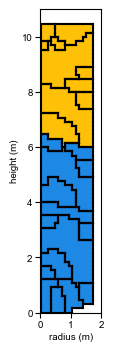

In [56]:
fig, ax = plt.subplots()

plot_reactor(sol_cc_BM_cell_tracking, ax)

h=100/25.4
w=20/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("BM_met_regimes.svg")

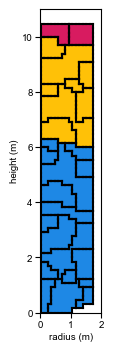

In [57]:
fig, ax = plt.subplots()

plot_reactor(sol_cc_LS_cell_tracking, ax)

h=100/25.4
w=20/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("LS_met_regimes.svg")

#### BM (qS, y_of, O)

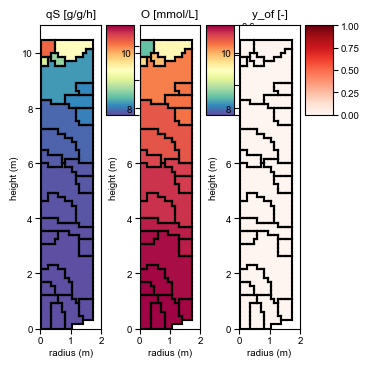

In [58]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=3, ncols=9)

ax_1 = fig.add_subplot(spec[:,:2])
cmap_ax_1 = fig.add_subplot(spec[0,2])

ax_2 = fig.add_subplot(spec[:,3:5])
cmap_ax_2 = fig.add_subplot(spec[0,5])

ax_3 = fig.add_subplot(spec[:,6:8])
cmap_ax_3 = fig.add_subplot(spec[0,8])

### qS
variable_string = "qS [g/g/h]"
vmin = 0
v_max = 1.3
cmap = mpl.cm.Spectral_r

plot_variabel_in_reactor_compartment(sol_cc_BM_cell_tracking, fig, ax_1, variable_string, vmin, v_max, cmap, cmap_ax_1)

### qS_of
variable_string = "O [mmol/L]"
vmin = 0
v_max = 0.6
cmap = mpl.cm.Spectral_r

plot_variabel_in_reactor_compartment(sol_cc_BM_cell_tracking, fig, ax_2, variable_string, vmin, v_max, cmap, cmap_ax_2)

### qS
sol_cc_BM_cell_tracking.sol_df["y_of [-]"] = sol_cc_BM_cell_tracking.sol_df["qS_of [g/g/h]"]/sol_cc_BM_cell_tracking.sol_df["qS [g/g/h]"]
variable_string = "y_of [-]"
vmin = 0
v_max = 1.0
cmap = mpl.cm.Reds

plot_variabel_in_reactor_compartment(sol_cc_BM_cell_tracking, fig, ax_3, variable_string, vmin, v_max, cmap, cmap_ax_3)

h=100/25.4
w=96/25.4
fig.set_size_inches(w=w,h=h)

# export figure as svg
# plt.savefig("Appendix_BM_map.svg", dpi=900);

#### LS (qS, y_of, O)

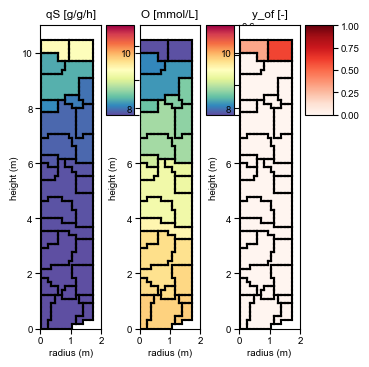

In [59]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=3, ncols=9)

ax_1 = fig.add_subplot(spec[:,:2])
cmap_ax_1 = fig.add_subplot(spec[0,2])

ax_2 = fig.add_subplot(spec[:,3:5])
cmap_ax_2 = fig.add_subplot(spec[0,5])

ax_3 = fig.add_subplot(spec[:,6:8])
cmap_ax_3 = fig.add_subplot(spec[0,8])

### qS
variable_string = "qS [g/g/h]"
vmin = 0
v_max = 1.3
cmap = mpl.cm.Spectral_r

plot_variabel_in_reactor_compartment(sol_cc_LS_cell_tracking, fig, ax_1, variable_string, vmin, v_max, cmap, cmap_ax_1)

### qS_of
variable_string = "O [mmol/L]"
vmin = 0
v_max = 0.6
cmap = mpl.cm.Spectral_r

plot_variabel_in_reactor_compartment(sol_cc_LS_cell_tracking, fig, ax_2, variable_string, vmin, v_max, cmap, cmap_ax_2)

### qS
sol_cc_LS_cell_tracking.sol_df["y_of [-]"] = sol_cc_LS_cell_tracking.sol_df["qS_of [g/g/h]"]/sol_cc_LS_cell_tracking.sol_df["qS [g/g/h]"]
variable_string = "y_of [-]"
vmin = 0
v_max = 1.0
cmap = mpl.cm.Reds

plot_variabel_in_reactor_compartment(sol_cc_LS_cell_tracking, fig, ax_3, variable_string, vmin, v_max, cmap, cmap_ax_3)

h=100/25.4
w=96/25.4
fig.set_size_inches(w=w,h=h)

# export figure as svg
# plt.savefig("Appendix_LS_map.svg", dpi=900);

### Show kla, O_star, an VL

#### Complex case

In [60]:
df = pd.concat([STR_LS_GNR.CompVolumes, STR_LS_GNR.GH, STR_LS_GNR.kla, STR_LS_GNR.O_star], axis=1)
df["comp_liq_vol"] = df["CompVol"] - (df["CompVol"]*df["GH"])
df["rel_vol"] = df["comp_liq_vol"]/df["comp_liq_vol"].sum()
kla = df[["kla","rel_vol"]].product(axis=1).sum()
O_star = df[["O_star","rel_vol"]].product(axis=1).sum()

print("Results from LS setting: O_star:",str(np.round(O_star,4)),"kla:",str(np.round(kla,0)),"VL:",str(np.round(df["comp_liq_vol"].sum(),1)))

Results from LS setting: O_star: 0.0116 kla: 270.0 VL: 81.7


In [61]:
df = pd.concat([STR_BM_GNR.CompVolumes, STR_BM_GNR.GH, STR_BM_GNR.kla, STR_BM_GNR.O_star], axis=1)
df["comp_liq_vol"] = df["CompVol"] - (df["CompVol"]*df["GH"])
df["rel_vol"] = df["comp_liq_vol"]/df["comp_liq_vol"].sum()
kla = df[["kla","rel_vol"]].product(axis=1).sum()
O_star = df[["O_star","rel_vol"]].product(axis=1).sum()

print("Results from BM setting: O_star:",str(np.round(O_star,4)),"kla:",str(np.round(kla,0)),"VL:",str(np.round(df["comp_liq_vol"].sum(),1)))

Results from BM setting: O_star: 0.0185 kla: 481.0 VL: 79.4


#### Simple case

In [62]:
df = pd.DataFrame()
df["rel_vol"] = STR_BM_cmod.calc_sc_cmodel()[1]/STR_BM_cmod.calc_sc_cmodel()[1].sum()
df["kla"] = STR_BM_cmod.calc_sc_cmodel()[2]
df[["kla","rel_vol"]].product(axis=1).sum()*3600

605.8855941835556

In [63]:
STR_BM_cmod.calc_sc_cmodel()[1].sum()

78.00408666040909

In [64]:
df = pd.DataFrame()
df["rel_vol"] = STR_LS_cmod.calc_sc_cmodel()[1]/STR_LS_cmod.calc_sc_cmodel()[1].sum()
df["kla"] = STR_LS_cmod.calc_sc_cmodel()[2]
df[["kla","rel_vol"]].product(axis=1).sum()*3600

171.43142220546062

In [65]:
STR_LS_cmod.calc_sc_cmodel()[1].sum()

83.9037636284723

In [66]:
print_4_comp_regimes(df_sc_BM[(df_sc_BM["qS_feed"] == 0.08) & (df_sc_BM["X"] == 30)])

comp_id               met_reg   Ysx          y_of  starv_ratio
0        1  substrate limitation  0.25 -1.160373e-16     0.665545
1        2            starvation  0.25 -1.160373e-16     0.665545
2        3            starvation  0.25 -1.160373e-16     0.665545
3        4            starvation  0.25 -1.160373e-16     0.665545

In [67]:
print_4_comp_regimes(df_sc_LS[(df_sc_LS["qS_feed"] == 0.08) & (df_sc_LS["X"] == 30)])

comp_id            met_reg       Ysx      y_of  starv_ratio
0        1  oxygen limitation  0.140291  0.830819     0.667237
1        2         starvation  0.140291  0.830819     0.667237
2        3         starvation  0.140291  0.830819     0.667237
3        4         starvation  0.140291  0.830819     0.667237

## Mixing Time

### Eulerian

#### Simple case

In [68]:
STR_BM_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=140, Fg=0.79, p_head=1)
STR_LS_cmod = sc_cmodel(excel_path='cmodels/cmodel_files/STR_4_cm/compmap_4cm.xlsx', N_rpm=80, Fg=0.4, p_head=0)

In [69]:
mmodel = sc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

##### Low settings

C:\Users\jonas\Desktop\cm_application\mmodels\xu_bb\sc_xu_bb.py:179: RuntimeWarning: invalid value encountered in scalar divide
  vars()['OUC'+str(n)] = (1-1/(1+np.power((O_crit/vars()['O'+str(n)]),hill_coefficient)))*vars()['OTR'+str(n)]/X + (1/(1+np.power((O_crit/vars()['O'+str(n)]),hill_coefficient)))*self.qO_max/(1+vars()['A'+str(n)]/self.Ki_o) # [mmol/gX/h] oxygen uptake capacity compartment 1


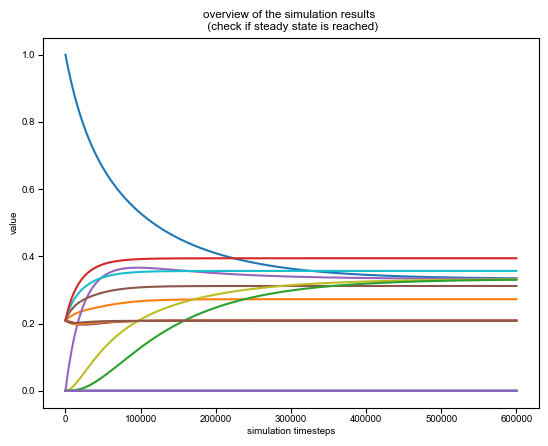

In [70]:
# compartment model instance
cmodel = STR_LS_cmod

# initial values for one compartment
y0_1d = [
    1, #S 
    0.2095, #O
    0, #A
    0.2095 #yO
    ]

# multiply initial values with the number of compartments
y0 = [
    1,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095
]
# simulation time
t_eval=np.linspace(0,1/6,600001)
# Biomass concentration 
X = 0
# Glucose feed rate g/h
Fs_feed = 0
# create a solution object
mix_sol_LS = sc_cmodel_sol(y0, t_eval, mmodel, cmodel, X, Fs_feed)

In [71]:
well_mixed = STR_LS_cmod.VL[0]/STR_LS_cmod.VL.sum()

In [72]:
res = False
i = 0

while not res:

    i_list = [
        mix_sol_LS.sol[i,0],
        mix_sol_LS.sol[i,4],
        mix_sol_LS.sol[i,8],
        mix_sol_LS.sol[i,12]
    ]

    res = all(((j < well_mixed*1.05) & (j > well_mixed*0.95)) for j in i_list)
    i = i+1
    
mixing_time = mix_sol_LS.t_eval[i]*3600
print("Mixing time:", np.round(mixing_time, 2),"s")

Mixing time: 379.61 s


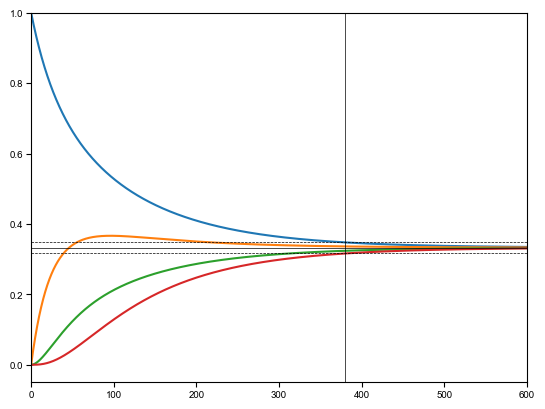

In [73]:
plt.plot(mix_sol_LS.t_eval*3600, mix_sol_LS.sol[:,0])
plt.plot(mix_sol_LS.t_eval*3600, mix_sol_LS.sol[:,4])
plt.plot(mix_sol_LS.t_eval*3600, mix_sol_LS.sol[:,8])
plt.plot(mix_sol_LS.t_eval*3600, mix_sol_LS.sol[:,12])

plt.plot([0,600], [well_mixed,well_mixed], color="k", linestyle="-", linewidth=0.5)
plt.plot([0,600], [well_mixed*1.05,well_mixed*1.05], color="k", linestyle="--", linewidth=0.5)
plt.plot([0,600], [well_mixed*0.95,well_mixed*0.95], color="k", linestyle="--", linewidth=0.5)

plt.xlim(0,600)
plt.ylim(-0.05,1)

plt.plot([mixing_time,mixing_time], [-0.05,1], color="k", linestyle="-", linewidth=0.5)

##### High settings

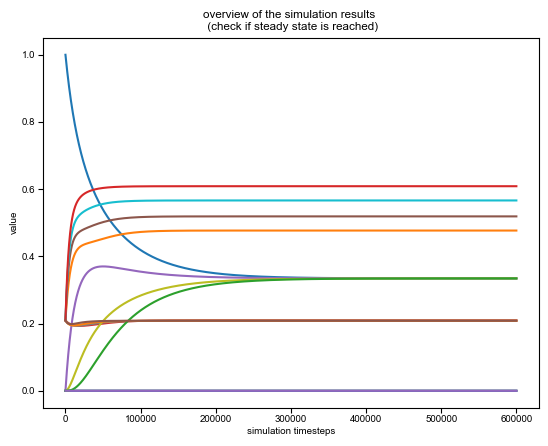

In [74]:
# compartment model instance
cmodel = STR_BM_cmod

# initial values for one compartment
y0_1d = [
    1, #S 
    0.2095, #O
    0, #A
    0.2095 #yO
    ]

# multiply initial values with the number of compartments
y0 = [
    1,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095,
    0,
    0.2095
]
# simulation time
t_eval=np.linspace(0,1/6,600001)
# Biomass concentration 
X = 0
# Glucose feed rate g/h
Fs_feed = 0
# create a solution object
mix_sol_BM = sc_cmodel_sol(y0, t_eval, mmodel, cmodel, X, Fs_feed)

In [75]:
well_mixed = STR_BM_cmod.VL[0]/STR_BM_cmod.VL.sum()

In [76]:
res = False
i = 0

while not res:

    i_list = [
        mix_sol_BM.sol[i,0],
        mix_sol_BM.sol[i,4],
        mix_sol_BM.sol[i,8],
        mix_sol_BM.sol[i,12]
    ]

    res = all(((j < well_mixed*1.05) & (j > well_mixed*0.95)) for j in i_list)
    i = i+1
    
mixing_time = mix_sol_BM.t_eval[i]*3600
print("Mixing time:", np.round(mixing_time, 2),"s")

Mixing time: 201.88 s


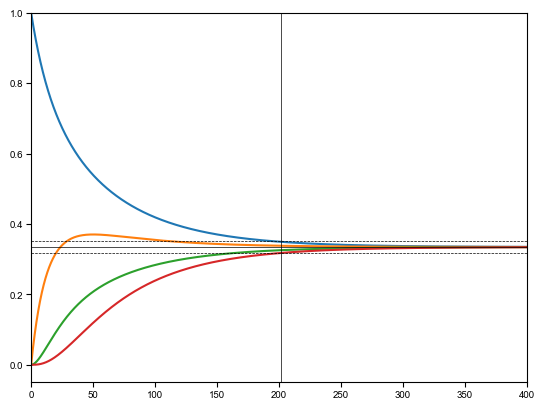

In [77]:
plt.plot(mix_sol_BM.t_eval*3600, mix_sol_BM.sol[:,0])
plt.plot(mix_sol_BM.t_eval*3600, mix_sol_BM.sol[:,4])
plt.plot(mix_sol_BM.t_eval*3600, mix_sol_BM.sol[:,8])
plt.plot(mix_sol_BM.t_eval*3600, mix_sol_BM.sol[:,12])

plt.plot([0,600], [well_mixed,well_mixed], color="k", linestyle="-", linewidth=0.5)
plt.plot([0,600], [well_mixed*1.05,well_mixed*1.05], color="k", linestyle="--", linewidth=0.5)
plt.plot([0,600], [well_mixed*0.95,well_mixed*0.95], color="k", linestyle="--", linewidth=0.5)

plt.xlim(0,400)
plt.ylim(-0.05,1)

plt.plot([mixing_time,mixing_time], [-0.1,1], color="k", linestyle="-", linewidth=0.5)

#### Complex case

In [78]:
def highlight_compartment(RTD_sol, ax, highlighted_comp):
        
    solution = "S [g/L]"

    cmap = mpl.cm.get_cmap('rainbow')
    # for colormap normalization
    vmin = 0
    vmax = np.round(RTD_sol.sol_df[solution].max()*1.05,2)

    ax.set_xlim(0,2)
    ax.set_ylim(0,11)
    ax.set_xlabel('radius (m)')
    ax.set_ylabel('height (m)')
    ax.set_title(solution)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    for i in RTD_sol.cmodel['CompMap'].index:
        Xmin = RTD_sol.cmodel['CompMap'].iloc[i].X_min
        Xmax = RTD_sol.cmodel['CompMap'].iloc[i].X_max
        Ymin = RTD_sol.cmodel['CompMap'].iloc[i].Y_min
        Ymax = RTD_sol.cmodel['CompMap'].iloc[i].Y_max

        compartment_id = int(RTD_sol.cmodel['CompMap'].iloc[i].Zone-1)

        value = list(RTD_sol.sol_df[solution])[compartment_id]
        color_norm = max(0,value-norm.vmin)/(norm.vmax-norm.vmin)
        
        if compartment_id == int(highlighted_comp-1):
        
            pp = mpl.pyplot.Rectangle(xy=(Xmin,Ymin), width=Xmax-Xmin, height=Ymax-Ymin,linewidth=0,edgecolor='#000000',facecolor=cmap(color_norm))
            ax.add_patch(pp)
            
        
    CompMap = RTD_sol.cmodel['CompMap']
            
    for zone in CompMap.Zone.unique():
        # find unique X_min-X_max pairs for a given zone
        unique_X = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['X_min','X_max'])

        for i in range(0,len(unique_X)):
            X_min = unique_X.iloc[i].X_min
            X_max = unique_X.iloc[i].X_max
            Y_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_min.min()
            Y_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['X_min'] == X_min) & (CompMap['X_max'] == X_max)].Y_max.max()

            ax.plot([X_min,X_max],[Y_min,Y_min],color='black')
            ax.plot([X_min,X_max],[Y_max,Y_max],color='black')

        # find unique Y_min-Y_max pairs for a given zone
        unique_Y = CompMap[CompMap['Zone'] == zone].drop_duplicates(subset=['Y_min','Y_max'])

        for i in range(0,len(unique_Y)):
            Y_min = unique_Y.iloc[i].Y_min
            Y_max = unique_Y.iloc[i].Y_max
            X_min = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_min.min()
            X_max = CompMap[(CompMap['Zone'] == zone) & (CompMap['Y_min'] == Y_min) & (CompMap['Y_max'] == Y_max)].X_max.max()

            ax.plot([X_min,X_min],[Y_min,Y_max],color='black')
            ax.plot([X_max,X_max],[Y_min,Y_max],color='black')

In [79]:
STR_BM_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_BM/9_RTD_BM.xlsx')
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [80]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

complex_mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

##### Low settings

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\1426935307.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('rainbow')


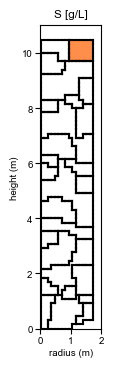

In [81]:
comp_n = 26

fig, ax = plt.subplots()

highlight_compartment(sol_cc_LS_cell_tracking, ax, comp_n)

h=100/25.4
w=20/25.4
fig.set_size_inches(w=w,h=h)

C:\Users\jonas\Desktop\cm_application\mmodels\xu_bb\cc_xu_bb.py:171: RuntimeWarning: invalid value encountered in scalar divide
  vars()['OUC'+str(n)] = (1-1/(1+np.power((O_crit/vars()['O'+str(n)]),hill_coefficient)))*vars()['OTR'+str(n)]/X + (1/(1+np.power((O_crit/vars()['O'+str(n)]),hill_coefficient)))*self.qO_max/(1+vars()['A'+str(n)]/self.Ki_o) # [mmol/gX/h] oxygen uptake capacity compartment 1


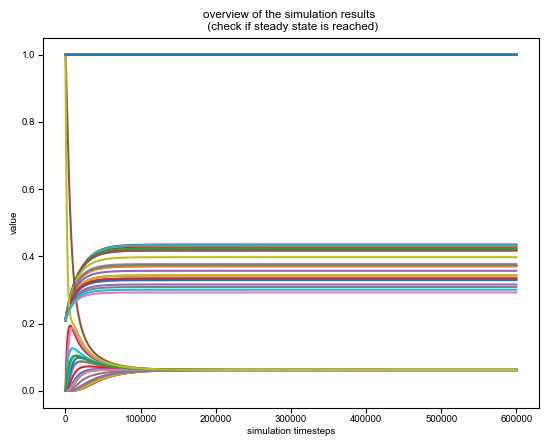

In [82]:
# compartment model instance
cmodel = STR_LS_GNR

y0_1d = [
    0.0, #S 
    0.2095, #O
    1 #A
]

# multiply initial values with the number of compartments
y0 = y0_1d*len(cmodel.CompVolumes)
y0[0+25*3] = 1
y0[0+26*3] = 1
# simulation time
t_eval=np.linspace(0,1/6,600001)
# Biomass concentration 
X = 0
# Glucose feed rate
Fs_feed = 0

sol_cc = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

In [83]:
well_mixed = sol_cc.sol_df["S [g/L]"].mean()

In [84]:
res = False
i = 0

while not res:

    i_list = [
        sol_cc.sol[i,0],
        sol_cc.sol[i,3],
        sol_cc.sol[i,6],
        sol_cc.sol[i,9],
        sol_cc.sol[i,12],
        sol_cc.sol[i,15],
        sol_cc.sol[i,18],
        sol_cc.sol[i,21],
        sol_cc.sol[i,24],
        sol_cc.sol[i,27],
        sol_cc.sol[i,30],
        sol_cc.sol[i,33],
        sol_cc.sol[i,36],
        sol_cc.sol[i,39],
        sol_cc.sol[i,42],
        sol_cc.sol[i,45],
        sol_cc.sol[i,48],
        sol_cc.sol[i,51],
        sol_cc.sol[i,54],
        sol_cc.sol[i,57],
        sol_cc.sol[i,60],
        sol_cc.sol[i,63],
        sol_cc.sol[i,66],
        sol_cc.sol[i,69],
        sol_cc.sol[i,72],
        sol_cc.sol[i,75],
        sol_cc.sol[i,78]  
    ]

    res = all(((j < well_mixed*1.05) & (j > well_mixed*0.95)) for j in i_list)
    i = i+1
    
mixing_time = sol_cc.t_eval[i]*3600
print("Mixing time:", np.round(mixing_time, 2),"s")

Mixing time: 115.58 s


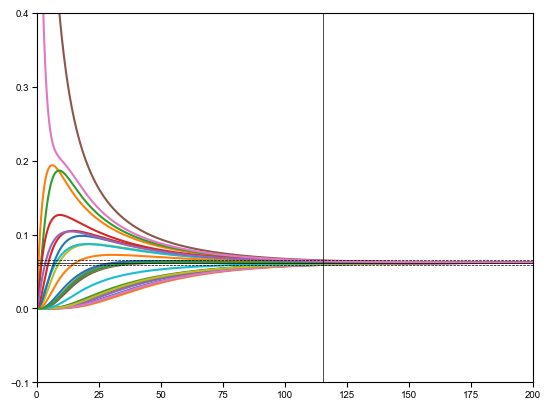

In [85]:
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,0])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,3])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,6])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,9])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,12])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,15])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,18])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,21])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,24])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,27])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,30])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,33])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,36])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,39])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,42])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,45])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,48])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,51])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,54])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,57])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,60])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,63])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,66])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,69])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,72])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,75])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,78])

plt.plot([0,600], [well_mixed,well_mixed], color="k", linestyle="-", linewidth=0.5)
plt.plot([0,600], [well_mixed*1.05,well_mixed*1.05], color="k", linestyle="--", linewidth=0.5)
plt.plot([0,600], [well_mixed*0.95,well_mixed*0.95], color="k", linestyle="--", linewidth=0.5)

plt.xlim(0,200)
plt.ylim(-0.1,0.4)

plt.plot([mixing_time,mixing_time], [-0.1,0.4], color="k", linestyle="-", linewidth=0.5)

##### High settings

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\1426935307.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('rainbow')


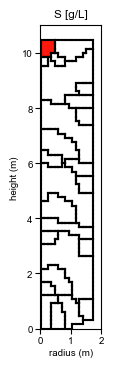

In [86]:
comp_n = 24

fig, ax = plt.subplots()

highlight_compartment(sol_cc_BM_cell_tracking, ax, comp_n)

h=100/25.4
w=20/25.4
fig.set_size_inches(w=w,h=h)

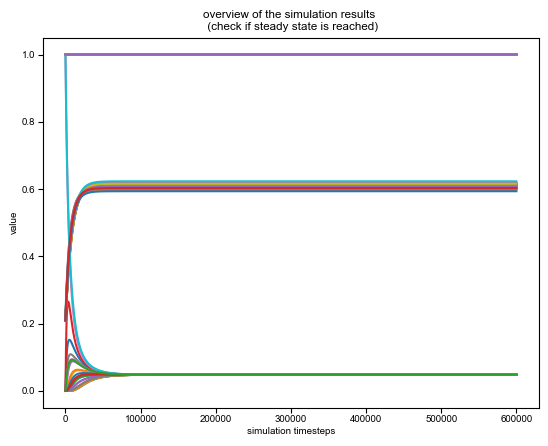

In [87]:
# compartment model instance
cmodel = STR_BM_GNR

y0_1d = [
    0.0, #S 
    0.2095, #O
    1 #A
]

# multiply initial values with the number of compartments
y0 = y0_1d*len(cmodel.CompVolumes)
y0[0+22*3] = 1
y0[0+23*3] = 1
# simulation time
t_eval=np.linspace(0,1/6,600001)
# Biomass concentration 
X = 0
# Glucose feed rate
Fs_feed = 0

sol_cc = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

In [88]:
well_mixed = sol_cc.sol_df["S [g/L]"].mean()

In [89]:
res = False
i = 0

while not res:

    i_list = [
        sol_cc.sol[i,0],
        sol_cc.sol[i,3],
        sol_cc.sol[i,6],
        sol_cc.sol[i,9],
        sol_cc.sol[i,12],
        sol_cc.sol[i,15],
        sol_cc.sol[i,18],
        sol_cc.sol[i,21],
        sol_cc.sol[i,24],
        sol_cc.sol[i,27],
        sol_cc.sol[i,30],
        sol_cc.sol[i,33],
        sol_cc.sol[i,36],
        sol_cc.sol[i,39],
        sol_cc.sol[i,42],
        sol_cc.sol[i,45],
        sol_cc.sol[i,48],
        sol_cc.sol[i,51],
        sol_cc.sol[i,54],
        sol_cc.sol[i,57],
        sol_cc.sol[i,60],
        sol_cc.sol[i,63],
        sol_cc.sol[i,66],
        sol_cc.sol[i,69]
    ]

    res = all(((j < well_mixed*1.05) & (j > well_mixed*0.95)) for j in i_list)
    i = i+1

mixing_time = sol_cc.t_eval[i]*3600
print("Mixing time:", np.round(mixing_time, 2),"s")

Mixing time: 72.4 s


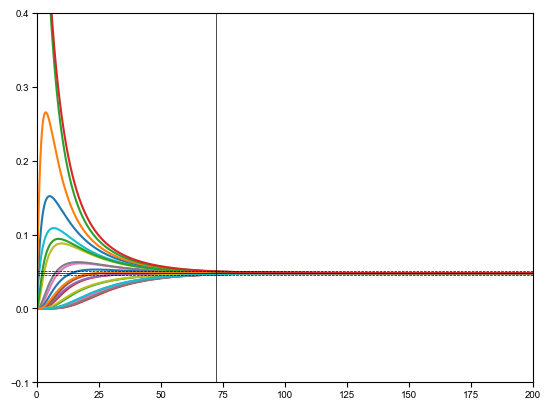

In [90]:
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,0])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,3])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,6])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,9])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,12])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,15])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,18])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,21])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,24])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,27])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,30])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,33])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,36])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,39])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,42])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,45])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,48])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,51])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,54])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,57])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,60])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,63])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,66])
plt.plot(sol_cc.t_eval*3600, sol_cc.sol[:,69])

plt.plot([0,600], [well_mixed,well_mixed], color="k", linestyle="-", linewidth=0.5)
plt.plot([0,600], [well_mixed*1.05,well_mixed*1.05], color="k", linestyle="--", linewidth=0.5)
plt.plot([0,600], [well_mixed*0.95,well_mixed*0.95], color="k", linestyle="--", linewidth=0.5)

plt.xlim(0,200)
plt.ylim(-0.1,0.4)

plt.plot([mixing_time,mixing_time], [-0.1,0.4], color="k", linestyle="-", linewidth=0.5)

## Cell tracking analysis

### Frequency distribution

In [91]:
def runs_of_ones_array(bits):
    """Function that extracts lengths of uninterupted sequences of 1 or True."""
    # make sure all runs of ones are well-bounded
    bounded = np.hstack(([0], bits, [0]))
    # get 1 at run starts and -1 at run ends
    difs = np.diff(bounded)
    run_starts, = np.where(difs > 0)
    run_ends, = np.where(difs < 0)
    return run_ends - run_starts

In [92]:
all_ox_limitation_times_BM = np.array([])
all_starvation_times_BM = np.array([])
all_limitation_times_BM = np.array([])

for i in range(0,100):

    qS_lifelines_BM = np.load("lifelines/qS_cell_lifelines_BM"+str(i)+".npy")
    qS_of_lifelines_BM = np.load("lifelines/qS_of_cell_lifelines_BM"+str(i)+".npy")

    for n in range(0, len(qS_lifelines_BM)):

        qS_lifeline_BM = qS_lifelines_BM[n]
        qS_of_lifeline_BM = qS_of_lifelines_BM[n]

        lifeline_ox_lim_bool_BM = qS_of_lifeline_BM > 0.00001
        lifeline_starv_bool_BM = qS_lifeline_BM < 0.04
        lifeline_lim_bool_BM = qS_lifeline_BM > 0.04

        ox_limitation_times_BM = runs_of_ones_array(lifeline_ox_lim_bool_BM) * 0.03
        starvation_times_BM = runs_of_ones_array(lifeline_starv_bool_BM) * 0.03
        limitation_times_BM = runs_of_ones_array(lifeline_lim_bool_BM) * 0.03

        all_ox_limitation_times_BM = np.append(all_ox_limitation_times_BM, ox_limitation_times_BM)
        all_starvation_times_BM = np.append(all_starvation_times_BM, starvation_times_BM)
        all_limitation_times_BM = np.append(all_limitation_times_BM, limitation_times_BM)

In [93]:
all_ox_limitation_times_LS = np.array([])
all_starvation_times_LS = np.array([])
all_limitation_times_LS = np.array([])

for i in range(0,100):

    qS_lifelines_LS = np.load("lifelines/qS_cell_lifelines_LS"+str(i)+".npy")
    qS_of_lifelines_LS = np.load("lifelines/qS_of_cell_lifelines_LS"+str(i)+".npy")

    for n in range(0, len(qS_lifelines_LS)):

        qS_lifeline_LS = qS_lifelines_LS[n]
        qS_of_lifeline_LS = qS_of_lifelines_LS[n]

        lifeline_ox_lim_bool_LS = qS_of_lifeline_LS > 0.00001
        lifeline_starv_bool_LS = qS_lifeline_LS < 0.04
        lifeline_lim_bool_LS = qS_lifeline_LS > 0.04

        ox_limitation_times_LS = runs_of_ones_array(lifeline_ox_lim_bool_LS) * 0.03
        starvation_times_LS = runs_of_ones_array(lifeline_starv_bool_LS) * 0.03
        limitation_times_LS = runs_of_ones_array(lifeline_lim_bool_LS) * 0.03

        all_ox_limitation_times_LS = np.append(all_ox_limitation_times_LS, ox_limitation_times_LS)
        all_starvation_times_LS = np.append(all_starvation_times_LS, starvation_times_LS)
        all_limitation_times_LS = np.append(all_limitation_times_LS, limitation_times_LS)

In [94]:
ox_limitation_time_BM, ox_limitation_counts_BM = np.unique(all_ox_limitation_times_BM, return_counts=True)
starvation_time_BM, starvation_counts_BM = np.unique(all_starvation_times_BM, return_counts=True)
limitation_time_BM, limitation_counts_BM = np.unique(all_limitation_times_BM, return_counts=True)

ox_limitation_time_LS, ox_limitation_counts_LS = np.unique(all_ox_limitation_times_LS, return_counts=True)
starvation_time_LS, starvation_counts_LS = np.unique(all_starvation_times_LS, return_counts=True)
limitation_time_LS, limitation_counts_LS = np.unique(all_limitation_times_LS, return_counts=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\1890652889.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,100000)


mean: 16.521412269619137 . 25%: 2.9699999999999998 . 50%: 8.04 . 75%: 21.509999999999998


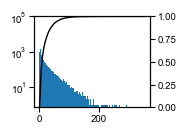

In [95]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])
ax1 = ax.twinx()

ax1.plot(limitation_time_LS,limitation_counts_LS.cumsum()/limitation_counts_LS.sum(),label='Starvation', color="k",linewidth=1)
ax.bar(limitation_time_LS,limitation_counts_LS)

ax.set_yscale("log")
# ax.set_xscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,100000)
ax1.set_ylim(0,1)
# ax.set_xlim(-50,500)
mean = all_limitation_times_LS.mean()
line_25 = limitation_time_LS[limitation_counts_LS.cumsum()/limitation_counts_LS.sum() < 0.25].max()
line_50 = limitation_time_LS[limitation_counts_LS.cumsum()/limitation_counts_LS.sum() < 0.5].max()
line_75 = limitation_time_LS[limitation_counts_LS.cumsum()/limitation_counts_LS.sum() < 0.75].max()

# plt.vlines(x=line_25,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_50,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_75,ymin=0,ymax=10000,linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")

print("mean:",mean,". 25%:", line_25, ". 50%:", line_50, ". 75%:", line_75)

# plt.savefig("res_time_lim_LS.svg", dpi=900);

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\323473124.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,100000)


mean: 25.113840710249324 . 25%: 2.07 . 50%: 7.739999999999999 . 75%: 28.41


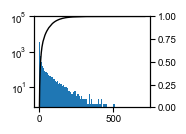

In [96]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])
ax1 = ax.twinx()

ax1.plot(starvation_time_LS,starvation_counts_LS.cumsum()/starvation_counts_LS.sum(),label='Starvation', color="k",linewidth=1)
ax.bar(starvation_time_LS,starvation_counts_LS)

ax.set_yscale("log")
# ax.set_xscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,100000)
ax1.set_ylim(0,1)
# ax.set_xlim(-50,500)
mean = all_starvation_times_LS.mean()
line_25 = starvation_time_LS[starvation_counts_LS.cumsum()/starvation_counts_LS.sum() < 0.25].max()
line_50 = starvation_time_LS[starvation_counts_LS.cumsum()/starvation_counts_LS.sum() < 0.5].max()
line_75 = starvation_time_LS[starvation_counts_LS.cumsum()/starvation_counts_LS.sum() < 0.75].max()

# plt.vlines(x=line_25,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_50,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_75,ymin=0,ymax=10000,linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")

print("mean:",mean,". 25%:", line_25, ". 50%:", line_50, ". 75%:", line_75)

# plt.savefig("res_time_starv_LS.svg", dpi=900);

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\2916825922.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,100000)


mean: 7.27026430729486 . 25%: 2.82 . 50%: 5.64 . 75%: 9.93


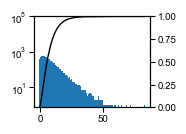

In [97]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])
ax1 = ax.twinx()

ax1.plot(ox_limitation_time_LS,ox_limitation_counts_LS.cumsum()/ox_limitation_counts_LS.sum(),label='Starvation', color="k",linewidth=1)
ax.bar(ox_limitation_time_LS,ox_limitation_counts_LS)

ax.set_yscale("log")
# ax.set_xscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,100000)
ax1.set_ylim(0,1)
# ax.set_xlim(-50,500)
mean = all_ox_limitation_times_LS.mean()
line_25 = ox_limitation_time_LS[ox_limitation_counts_LS.cumsum()/ox_limitation_counts_LS.sum() < 0.25].max()
line_50 = ox_limitation_time_LS[ox_limitation_counts_LS.cumsum()/ox_limitation_counts_LS.sum() < 0.5].max()
line_75 = ox_limitation_time_LS[ox_limitation_counts_LS.cumsum()/ox_limitation_counts_LS.sum() < 0.75].max()

# plt.vlines(x=line_25,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_50,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_75,ymin=0,ymax=10000,linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")

print("mean:",mean,". 25%:", line_25, ". 50%:", line_50, ". 75%:", line_75)

# plt.savefig("res_time_ox_lim_LS.svg", dpi=900);

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\1037883240.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,100000)


mean: 8.428307387120817 . 25%: 1.29 . 50%: 3.33 . 75%: 10.29


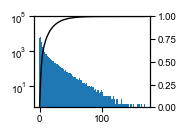

In [98]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])
ax1 = ax.twinx()

ax1.plot(limitation_time_BM,limitation_counts_BM.cumsum()/limitation_counts_BM.sum(),label='Starvation', color="k",linewidth=1)
ax.bar(limitation_time_BM,limitation_counts_BM)

ax.set_yscale("log")
# ax.set_xscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,100000)
ax1.set_ylim(0,1)
# ax.set_xlim(-50,500)
mean = all_limitation_times_BM.mean()
line_25 = limitation_time_BM[limitation_counts_BM.cumsum()/limitation_counts_BM.sum() < 0.25].max()
line_50 = limitation_time_BM[limitation_counts_BM.cumsum()/limitation_counts_BM.sum() < 0.5].max()
line_75 = limitation_time_BM[limitation_counts_BM.cumsum()/limitation_counts_BM.sum() < 0.75].max()

# plt.vlines(x=line_25,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_50,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_75,ymin=0,ymax=10000,linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")

print("mean:",mean,". 25%:", line_25, ". 50%:", line_50, ". 75%:", line_75)

# plt.savefig("res_time_lim_BM.svg", dpi=900);

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\3277096763.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,100000)


mean: 11.514682989735922 . 25%: 0.54 . 50%: 2.88 . 75%: 12.03


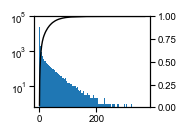

In [99]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])
ax1 = ax.twinx()

ax1.plot(starvation_time_BM,starvation_counts_BM.cumsum()/starvation_counts_BM.sum(),label='Starvation', color="k",linewidth=1)
ax.bar(starvation_time_BM,starvation_counts_BM)

ax.set_yscale("log")
# ax.set_xscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,100000)
ax1.set_ylim(0,1)
# ax.set_xlim(-50,500)
mean = all_starvation_times_BM.mean()
line_25 = starvation_time_BM[starvation_counts_BM.cumsum()/starvation_counts_BM.sum() < 0.25].max()
line_50 = starvation_time_BM[starvation_counts_BM.cumsum()/starvation_counts_BM.sum() < 0.5].max()
line_75 = starvation_time_BM[starvation_counts_BM.cumsum()/starvation_counts_BM.sum() < 0.75].max()

# plt.vlines(x=line_25,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_50,ymin=0,ymax=10000,linewidths=0.5,colors="k")
# plt.vlines(x=line_75,ymin=0,ymax=10000,linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")

print("mean:",mean,". 25%:", line_25, ". 50%:", line_50, ". 75%:", line_75)

# plt.savefig("res_time_starv_BM.svg", dpi=900);

C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\3271723515.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,10000)
C:\Users\jonas\AppData\Local\Temp\ipykernel_25736\3271723515.py:23: RuntimeWarning: Mean of empty slice.
  mean = all_ox_limitation_times_BM.mean()
C:\Users\jonas\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonas\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


nan

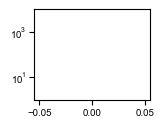

In [100]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()

spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[:,:])

ax.bar(ox_limitation_time_BM, ox_limitation_counts_BM)
ax.set_yscale("log")

# ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_ylim(0,10000)
# ax.set_xlim(-50,500)
mean = all_ox_limitation_times_BM.mean()
plt.vlines(x=mean,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],linewidths=0.5,colors="k")

h=30/25.4
w=38/25.4
fig.set_size_inches(w=w,h=h)
# plt.grid(axis="y")
mean

# plt.savefig("res_time_ox_lim_BM.svg", dpi=900);

### Probability distribution

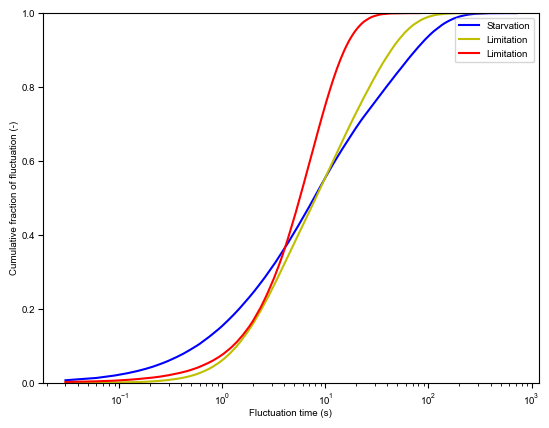

In [101]:
fig, ax = plt.subplots()

ax.plot(starvation_time_LS,starvation_counts_LS.cumsum()/starvation_counts_LS.sum(),label='Starvation', color="b")
ax.plot(limitation_time_LS,limitation_counts_LS.cumsum()/limitation_counts_LS.sum(),label='Limitation', color="y")
ax.plot(ox_limitation_time_LS,ox_limitation_counts_LS.cumsum()/ox_limitation_counts_LS.sum(),label='Limitation', color="r")
ax.legend()
# ax.set_title('Cumulative Distribution Function')
ax.set_xlabel('Fluctuation time (s)')
ax.set_ylabel('Cumulative fraction of fluctuation (-)')
ax.set_xscale('log')
# ax.set_xlim(0.1,200)
ax.set_ylim(0,1);